# Project: Telecom Churn Forecast (Final Project)

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

**Interconnect's services**

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable.

Some other services the company provides include:

* Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
* A dedicated technical support line (TechSupport)
* Cloud file storage and data backup (OnlineBackup)
* TV streaming (StreamingTV) and a movie directory (StreamingMovies)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

**Data description**

The data consists of files obtained from different sources:

* `contract.csv` — contract information
* `personal.csv` — the client's personal data
* `internet.csv` — information about Internet services
* `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

## Work plan

### Steps
1. Load and explore the data: take an initial look at the data to see what needs to be done
2. Preprocess the data: clean up the data; handle missing and duplicate values; group and/or filter data
3. Perform EDA: plot and visualize data to try to glean insights
4. Feature preparation: encode, scale, and split the data to be training-ready
5. Baseline and training models: create and train ML models using classification algorithms and gradient boosting; evaluate the models using the AUC-ROC classfication metric
6. Best model: test the best model using the test set, do a sanity check, and compare quality/results to previous models
7. Conclusion: summarize findings and provide recommendations

## Load and explore the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, make_scorer, confusion_matrix
from sklearn.dummy import DummyClassifier

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
try:
    df_contract = pd.read_csv('datasets/final_provider/contract.csv')
    df_internet = pd.read_csv('datasets/final_provider/internet.csv')
    df_personal = pd.read_csv('datasets/final_provider/personal.csv')
    df_phone = pd.read_csv('datasets/final_provider/phone.csv')
except:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [4]:
data = [df_contract, df_internet, df_personal, df_phone]

In [5]:
for datum in data:
    display(datum.head(10))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [6]:
for datum in data:
    print(datum.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 

## Preprocess the data

In [7]:
# Cast BeginDate to correct type
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])
df_contract['BeginDate'].dtype

dtype('<M8[ns]')

In [8]:
# Get BeginDate min and max values
print(f"BeginDate earliest date: {df_contract['BeginDate'].values.min()}")
print(f"BeginDate latest date: {df_contract['BeginDate'].values.max()}")

BeginDate earliest date: 2013-10-01T00:00:00.000000000
BeginDate latest date: 2020-02-01T00:00:00.000000000


In [9]:
# Cast EndDate with dates in string value to correct type
enddate_mask = df_contract['EndDate'] != 'No'

df_contract.loc[enddate_mask, 'EndDate'] = pd.to_datetime(df_contract.loc[enddate_mask, 'EndDate'])

In [10]:
# Get EndDate min and max values
datetime_mask = pd.notna(df_contract['EndDate']) & (df_contract['EndDate'] != 'No')
datetime_values = df_contract.loc[datetime_mask, 'EndDate']

print(datetime_values.min())
print(datetime_values.max())

2019-10-01 00:00:00
2020-01-01 00:00:00


In [11]:
# Get unique values for EndDate
print(df_contract['EndDate'].value_counts())
df_contract[df_contract['EndDate'] != 'No']['EndDate'].value_counts().sort_values(ascending=False)

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64


2019-11-01    485
2019-12-01    466
2020-01-01    460
2019-10-01    458
Name: EndDate, dtype: int64

In [12]:
# Get percentage of active customers
percentage_active = ((df_contract['EndDate'] == 'No').sum() / df_contract['EndDate'].count()) * 100
print(f'Percentage of active customers: {percentage_active:.2f}%')

Percentage of active customers: 73.46%


In [13]:
# Rename Type column due to vagueness
df_contract = df_contract.rename(columns={
    'Type': 'PaymentType'
})

In [14]:
# Find missing values in TotalCharges
df_contract[df_contract['TotalCharges'] == ' '].count()

customerID          11
BeginDate           11
EndDate             11
PaymentType         11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
dtype: int64

In [15]:
# Replace missing values in TotalCharges with 0 and cast to correct type
df_contract['TotalCharges'] = df_contract['TotalCharges'].replace(' ', 0)
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype(float)

In [16]:
# Get unique values and percentages for payment information
for col in ['PaymentType', 'PaymentMethod', 'PaperlessBilling']:
    counts = df_contract[col].value_counts()
    percentages = df_contract[col].value_counts(normalize=True) * 100
    result = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])
    
    result['Percentage'] = result['Percentage'].apply(lambda x: '{:.1f}%'.format(x))
    
    print(result)
    print()

                Count Percentage
Month-to-month   3875      55.0%
Two year         1695      24.1%
One year         1473      20.9%

                           Count Percentage
Electronic check            2365      33.6%
Mailed check                1612      22.9%
Bank transfer (automatic)   1544      21.9%
Credit card (automatic)     1522      21.6%

     Count Percentage
Yes   4171      59.2%
No    2872      40.8%



In [17]:
# Get unique values and percentages for internet services
for col in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    counts = df_internet[col].value_counts()
    percentages = df_internet[col].value_counts(normalize=True) * 100
    result = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])
    
    result['Percentage'] = result['Percentage'].apply(lambda x: '{:.1f}%'.format(x))
    
    print(result)
    print()

             Count Percentage
Fiber optic   3096      56.1%
DSL           2421      43.9%

     Count Percentage
No    3498      63.4%
Yes   2019      36.6%

     Count Percentage
No    3088      56.0%
Yes   2429      44.0%

     Count Percentage
No    3095      56.1%
Yes   2422      43.9%

     Count Percentage
No    3473      63.0%
Yes   2044      37.0%

     Count Percentage
No    2810      50.9%
Yes   2707      49.1%

     Count Percentage
No    2785      50.5%
Yes   2732      49.5%



In [18]:
df_personal = df_personal.rename(columns={
    'gender': 'Gender'
})

In [19]:
# Get unique values and percentages for personal information
for col in ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    counts = df_personal[col].value_counts()
    percentages = df_personal[col].value_counts(normalize=True) * 100
    result = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])
    
    result['Percentage'] = result['Percentage'].apply(lambda x: '{:.1f}%'.format(x))
    
    print(result)
    print()

        Count Percentage
Male     3555      50.5%
Female   3488      49.5%

   Count Percentage
0   5901      83.8%
1   1142      16.2%

     Count Percentage
No    3641      51.7%
Yes   3402      48.3%

     Count Percentage
No    4933      70.0%
Yes   2110      30.0%



In [20]:
# Get unique values and percentages for multiple lines
counts = df_phone['MultipleLines'].value_counts()
percentages = df_phone['MultipleLines'].value_counts(normalize=True) * 100

result = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])

result['Percentage'] = result['Percentage'].apply(lambda x: '{:.1f}%'.format(x))

print(result)

     Count Percentage
No    3390      53.3%
Yes   2971      46.7%


In [21]:
# Check for missing values
for datum in data:
    display(datum.isnull().sum())
    print()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

customerID       0
MultipleLines    0
dtype: int64

In [22]:
# Check for missing customerID values
for datum in data:
    display(datum['customerID'].isnull().sum())

0

0

0

0

In [23]:
# Check for duplicated values
for datum in data:
    display(datum.duplicated().sum())

0

0

0

0

In [24]:
# Check for duplicated customerID values
for datum in data:
    display(datum['customerID'].duplicated().sum())

0

0

0

0

The data is loaded and inspected. The time span of the data beings as early as October 2013 until the beginning of February 2020.

All of the churn occurs within four months, from October 2019 to the beginning of January 2020. The percentage of active customers (users who have *not* ended service) is in the majority at 73.46%.

* Based on the `df_contract` dataset, over half (55%) of the customers pay month-to-month of the three payment options. A majority (33.6%) pay with electronic check, and over half (59.2%) use paperless billing
* Based on the `df_internet` dataset, over half (56.1%) of customers use fiber optic internet over DSL, a majority (63.4%) don’t use the malicious website blocker, over half (56.0%) don’t use cloud storage/data backup, over half (56.1%) don’t use antivirus software, a majority (63.0%) don’t use the dedicated technical support line, and about half don’t use TV or moving streaming, respectively
* Based on the `df_personal` dataset, the gender of customers is almost split 50/50, a large majority (83.8%) are senior citizens, almost half (51.7%) don’t have a partner, and a majority (70.0%) don’t have dependents
* Based on the `df_phone` dataset, over half (53.3%) of the customers don’t pay for multiple phone lines

### Merge the data

In [25]:
# Merge datsets
df_merged = df_contract.merge(df_internet, on='customerID', how='left')
df_merged = df_merged.merge(df_personal, on='customerID', how='left')
df_merged = df_merged.merge(df_phone, on='customerID', how='left')

In [26]:
# Create Churned column
exited_col = (df_merged['EndDate'] != 'No').astype(int)
df_merged.insert(3, 'Churned', exited_col)

In [27]:
# Get count and percentages for active vs. exited customers
counts = df_merged['Churned'].value_counts()
percentages = df_merged['Churned'].value_counts(normalize=True) * 100

result = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])

result['Percentage'] = result['Percentage'].apply(lambda x: '{:.1f}%'.format(x))

print(result)

   Count Percentage
0   5174      73.5%
1   1869      26.5%


In [28]:
data_end_date = pd.to_datetime('2020-02-01')

In [29]:
# Crete function for calculating payment months
def calculate_months(row):
    if row['EndDate'] != 'No':
        end_date = pd.to_datetime(row['EndDate'])
    else:
        end_date = data_end_date
    
    months = (end_date.to_period('M') - row['BeginDate'].to_period('M')).n
    return months

In [30]:
# Create PaymentMonths column
months_col = df_merged.apply(calculate_months, axis=1)
df_merged.insert(3, 'PaymentMonths', months_col)

In [31]:
df_merged.head(10)

,customerID,BeginDate,EndDate,PaymentMonths,Churned,PaymentType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,1,0,Month-to-month,Yes,Electronic check,29.85,29.85,...,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,34,0,One year,No,Mailed check,56.95,1889.50,...,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2,1,Month-to-month,Yes,Mailed check,53.85,108.15,...,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,45,0,One year,No,Bank transfer (automatic),42.30,1840.75,...,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2,1,Month-to-month,Yes,Electronic check,70.70,151.65,...,No,No,No,No,No,Female,0,No,No,No
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,8,1,Month-to-month,Yes,Electronic check,99.65,820.50,...,No,Yes,No,Yes,Yes,Female,0,No,No,Yes
6,1452-KIOVK,2018-04-01,No,22,0,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,...,Yes,No,No,Yes,No,Male,0,No,Yes,Yes
7,6713-OKOMC,2019-04-01,No,10,0,Month-to-month,No,Mailed check,29.75,301.90,...,No,No,No,No,No,Female,0,No,No,NaN
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,28,1,Month-to-month,Yes,Electronic check,104.80,3046.05,...,No,Yes,Yes,Yes,Yes,Female,0,Yes,No,Yes
9,6388-TABGU,2014-12-01,No,62,0,One year,No,Bank transfer (automatic),56.15,3487.95,...,Yes,No,No,No,No,Male,0,No,Yes,No


In [32]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   PaymentMonths     7043 non-null   int64         
 4   Churned           7043 non-null   int64         
 5   PaymentType       7043 non-null   object        
 6   PaperlessBilling  7043 non-null   object        
 7   PaymentMethod     7043 non-null   object        
 8   MonthlyCharges    7043 non-null   float64       
 9   TotalCharges      7043 non-null   float64       
 10  InternetService   5517 non-null   object        
 11  OnlineSecurity    5517 non-null   object        
 12  OnlineBackup      5517 non-null   object        
 13  DeviceProtection  5517 non-null   object        
 14  TechSupport       5517 n

In [33]:
df_merged.describe()

,PaymentMonths,Churned,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.265370,64.761692,2279.734304,0.162147
std,24.559481,0.441561,30.090047,2266.794470,0.368612
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,9.000000,0.000000,35.500000,398.550000,0.000000
50%,29.000000,0.000000,70.350000,1394.550000,0.000000
75%,55.000000,1.000000,89.850000,3786.600000,0.000000
max,72.000000,1.000000,118.750000,8684.800000,1.000000


In [34]:
df_merged.duplicated().sum()

0

In [35]:
df_merged.isnull().sum()

customerID             0
BeginDate              0
EndDate                0
PaymentMonths          0
Churned                0
PaymentType            0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
dtype: int64

In [36]:
percentage_missing = df_merged.isnull().sum() / len(df_merged) * 100
print(f'Percentage of missing values:')
print(percentage_missing)

Percentage of missing values:
customerID           0.000000
BeginDate            0.000000
EndDate              0.000000
PaymentMonths        0.000000
Churned              0.000000
PaymentType          0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.000000
InternetService     21.666903
OnlineSecurity      21.666903
OnlineBackup        21.666903
DeviceProtection    21.666903
TechSupport         21.666903
StreamingTV         21.666903
StreamingMovies     21.666903
Gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
MultipleLines        9.683374
dtype: float64


The datasets are merged, and new columns are created: 'Churned' is created to capture the customer churn as the target for model training, 'PaymentMonths' is created to capture the number of months a given user has been paying for service.

Upon looking at the descriptive statistics for the few numerical features available, the data shows the following:

* The oldest customers have been active for 72 months
* Monthly charges range from \\$18.25 to \\$118.75. The mean monthly charge is \\$64.76
* The maximum total charges is \\$8,684.80. The mean total charge is \\$2,279.73

Null values are present in the merged dataset, which are deduced as representing the following:

* 21.7% of customers are landline users only
* 9.7% of customers are internet users only

The null values will be left in the merged dataset for the time being.

## EDA

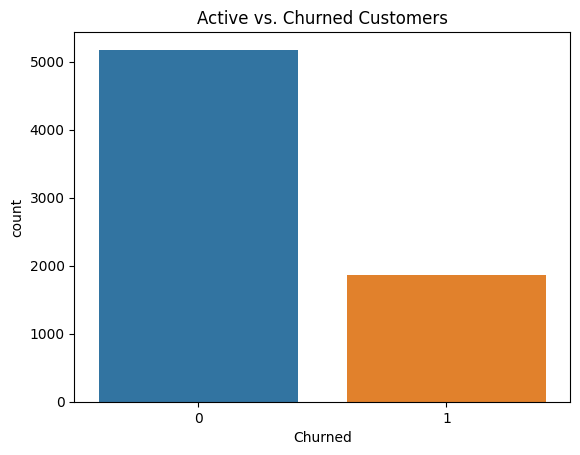

In [37]:
sns.countplot(data=df_merged, x='Churned')
plt.title('Active vs. Churned Customers')
plt.show()

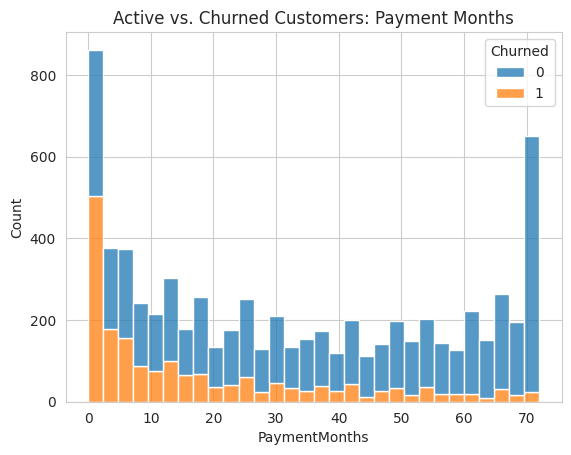

In [38]:
sns.set_style('whitegrid')
sns.histplot(df_merged, x='PaymentMonths', hue='Churned', multiple='stack', bins=30)
plt.title('Active vs. Churned Customers: Payment Months')
plt.show()

* Active customers make up a majority of the users
* There are two spikes for active customers in terms of length for paid service: loyal users who’ve been with the service since the beginning of the available data, and newer users who’ve only been with the service for a few months or less
* Churned customers show a positive skew for having paid for service for a few months or less (i.e. higher turnover early on with new users), but the spread of these customers also span the length of time of the data from the beginning (but at a much smaller share compared to active users who've been loyal for the same amount of time)

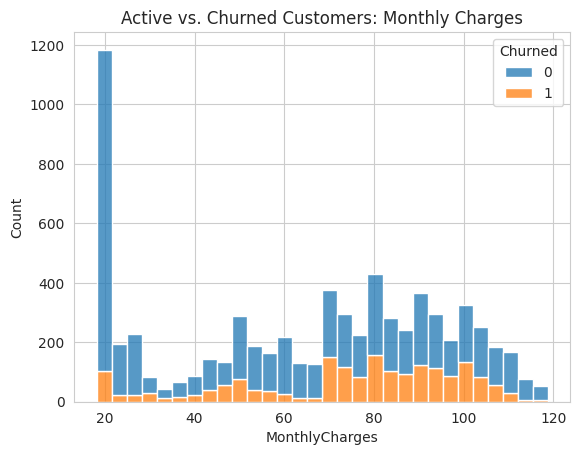

In [39]:
sns.set_style('whitegrid')
sns.histplot(df_merged, x='MonthlyCharges', hue='Churned', multiple='stack', bins=30)
plt.title('Active vs. Churned Customers: Monthly Charges')
plt.show()

* A majority of active customers pay low monthly charges
* Churned customers were more likely to pay either a low monthly charge, or slightly greater amounts around $70 and above
* The shape of the distributions for both active and exited customers overall show similar trends across

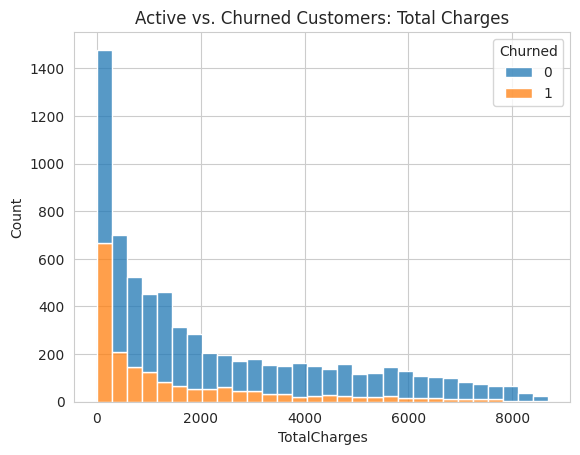

In [40]:
sns.set_style('whitegrid')
sns.histplot(df_merged, x='TotalCharges', hue='Churned', multiple='stack', bins=30)
plt.title('Active vs. Churned Customers: Total Charges')
plt.show()

Both active and exited customers show total charges that are positive skewed towards lower total payments

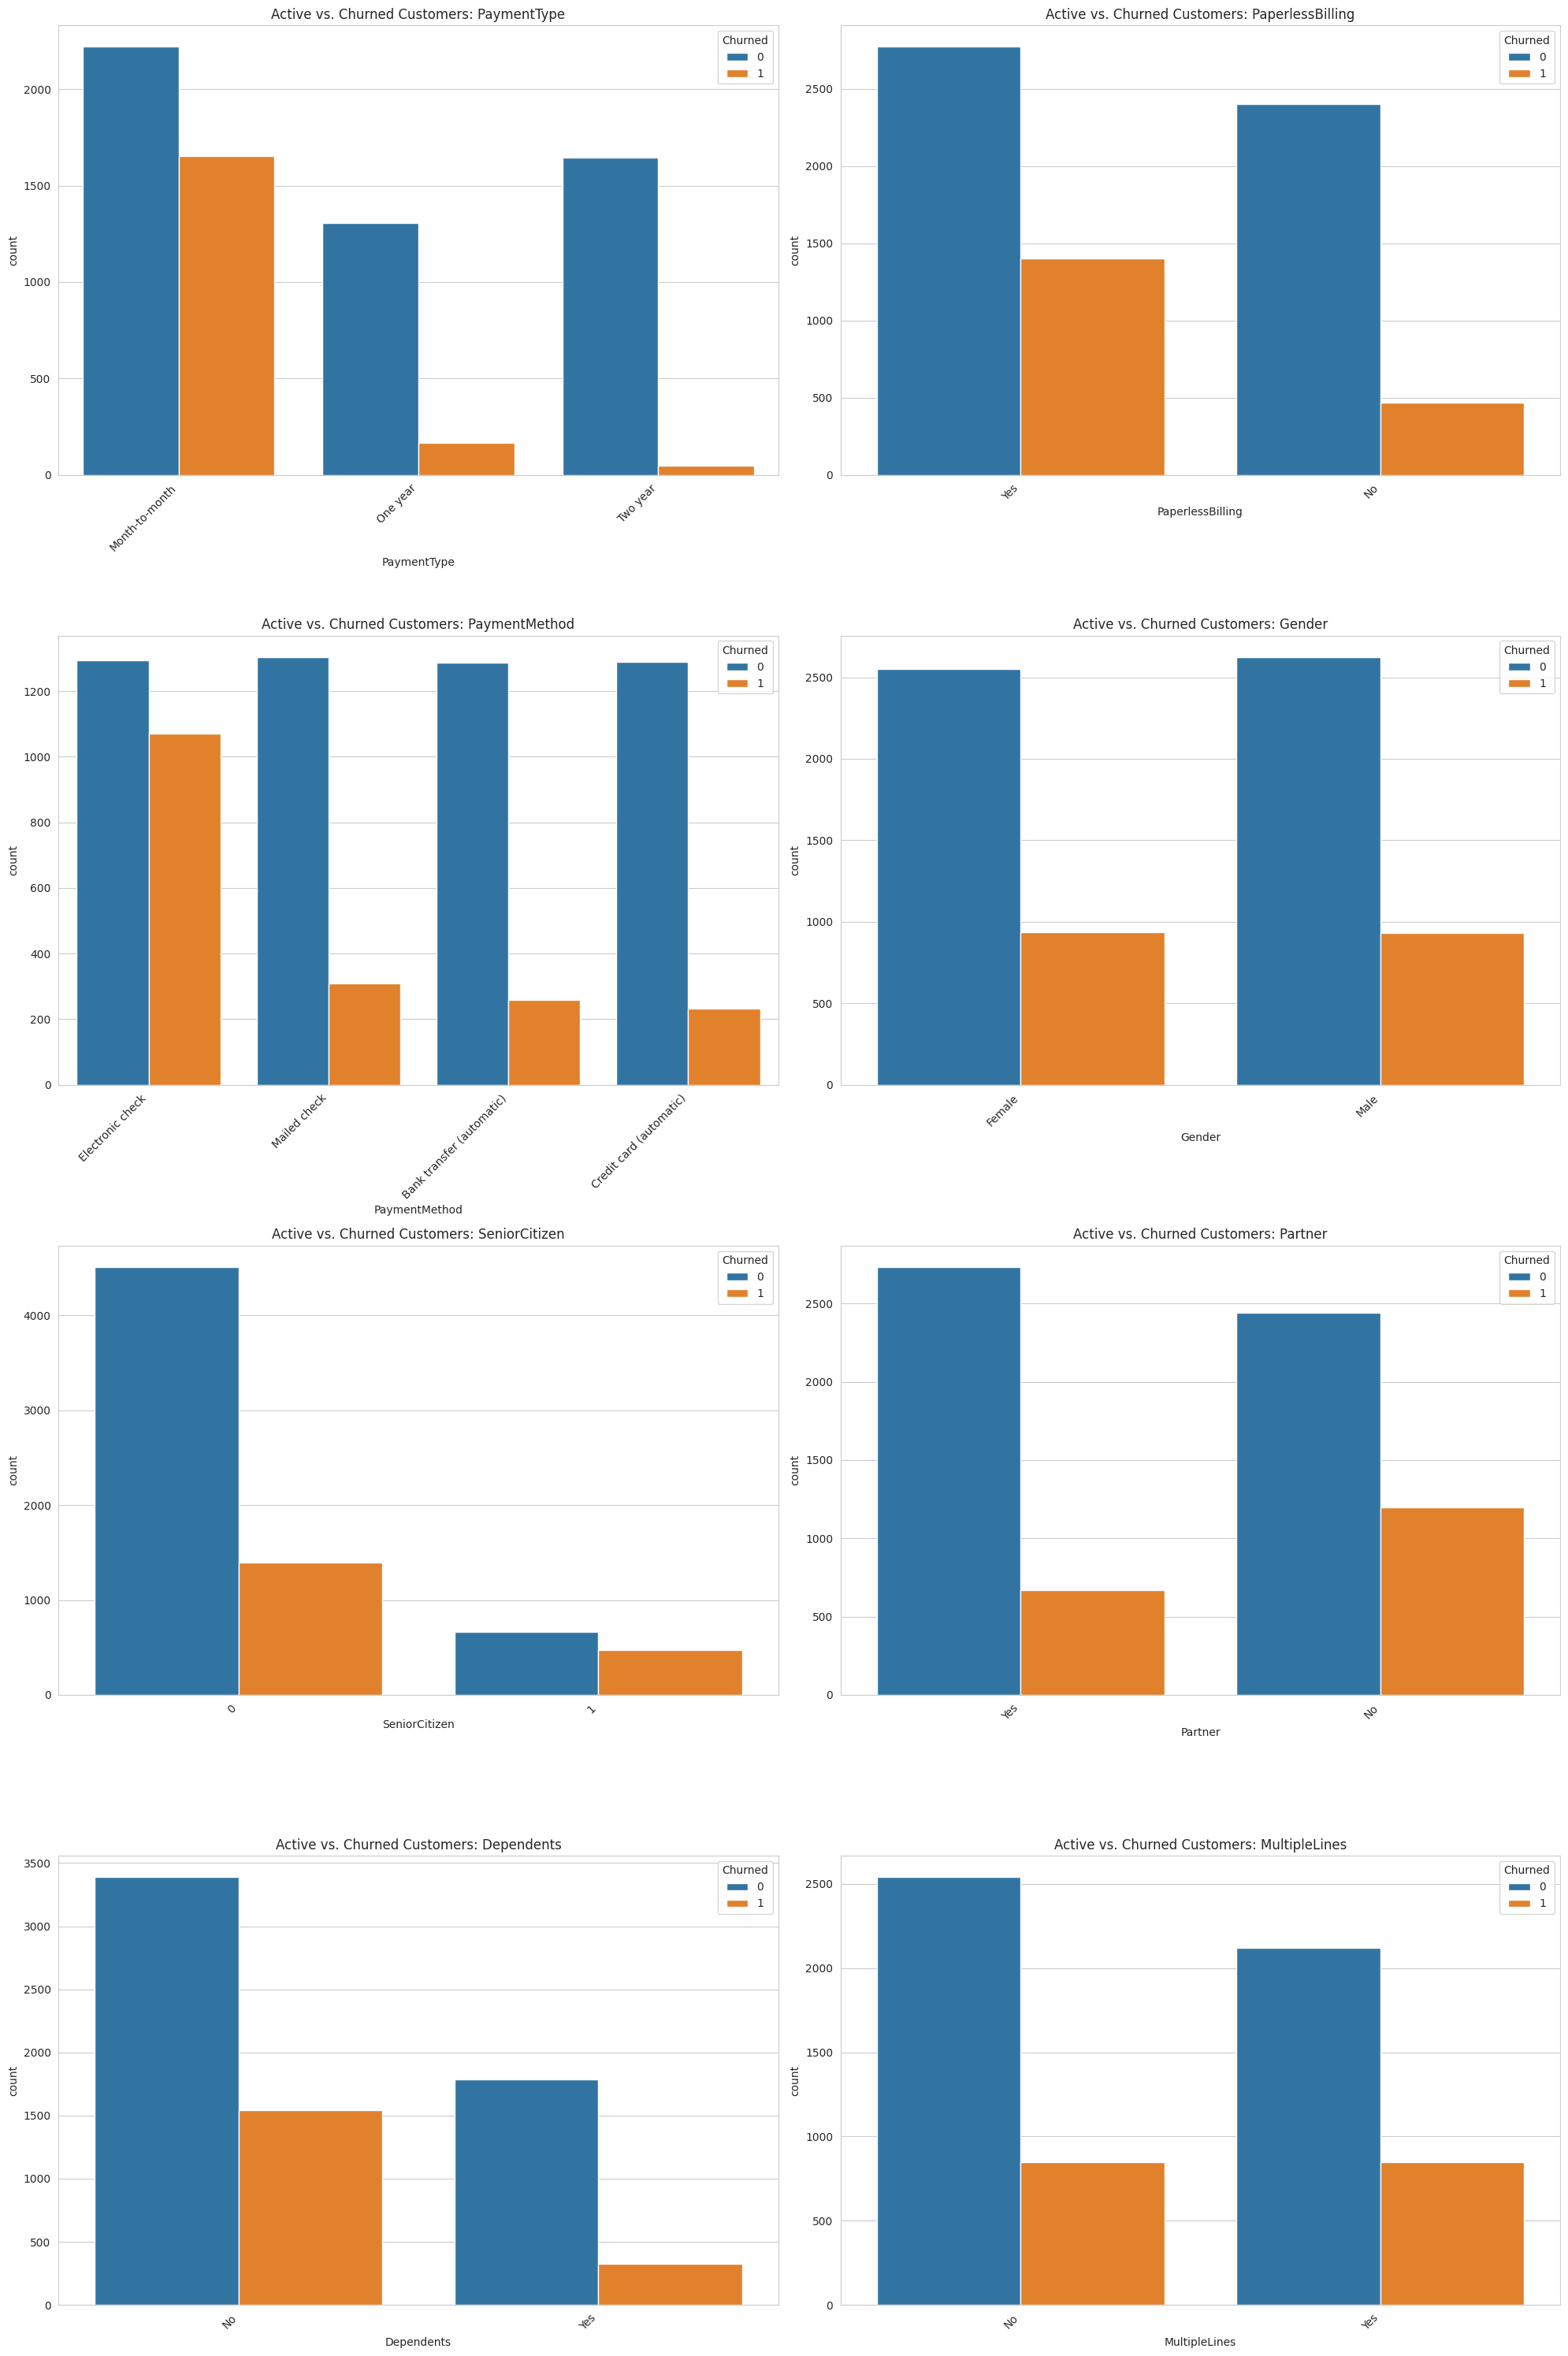

In [41]:
# Plot payment and personal information
columns = ['PaymentType', 'PaperlessBilling', 'PaymentMethod', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines']

fig, axes = plt.subplots(4, 2, figsize=(20, 30))

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(data=df_merged, x=col, hue='Churned', ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_title(f'Active vs. Churned Customers: {col}')
    axes[i].legend(title='Churned', loc='upper right')

plt.tight_layout()
plt.show()

* Both active and exited customers show total charges that are positive skewed towards lower total payments
* Paperless billing is favored by both segments, and to a greater degree among exited customers
* Payment methods of active customers are almost evenly divided across the four options. For exited customers, the difference is more stark: electronic check (like paperless billing, which is also electronic-based) is overwhelmingly favored over the rest of the other methods
* Gender looks to be close to an even split for both segments of customers
* Active customers are overwhelmingly classified as senior citizens. The ratio is less unbalanced for exited customers, who are still a majority senior citizens
* Active customers are more likely to live with a partner, while the opposite is true for exited customers
* Both segments tend to not have any dependents, although the difference is greater with exited customers
* Active customers are a lot less likely to have multiple lines, whereas exited customers are almost evenly split

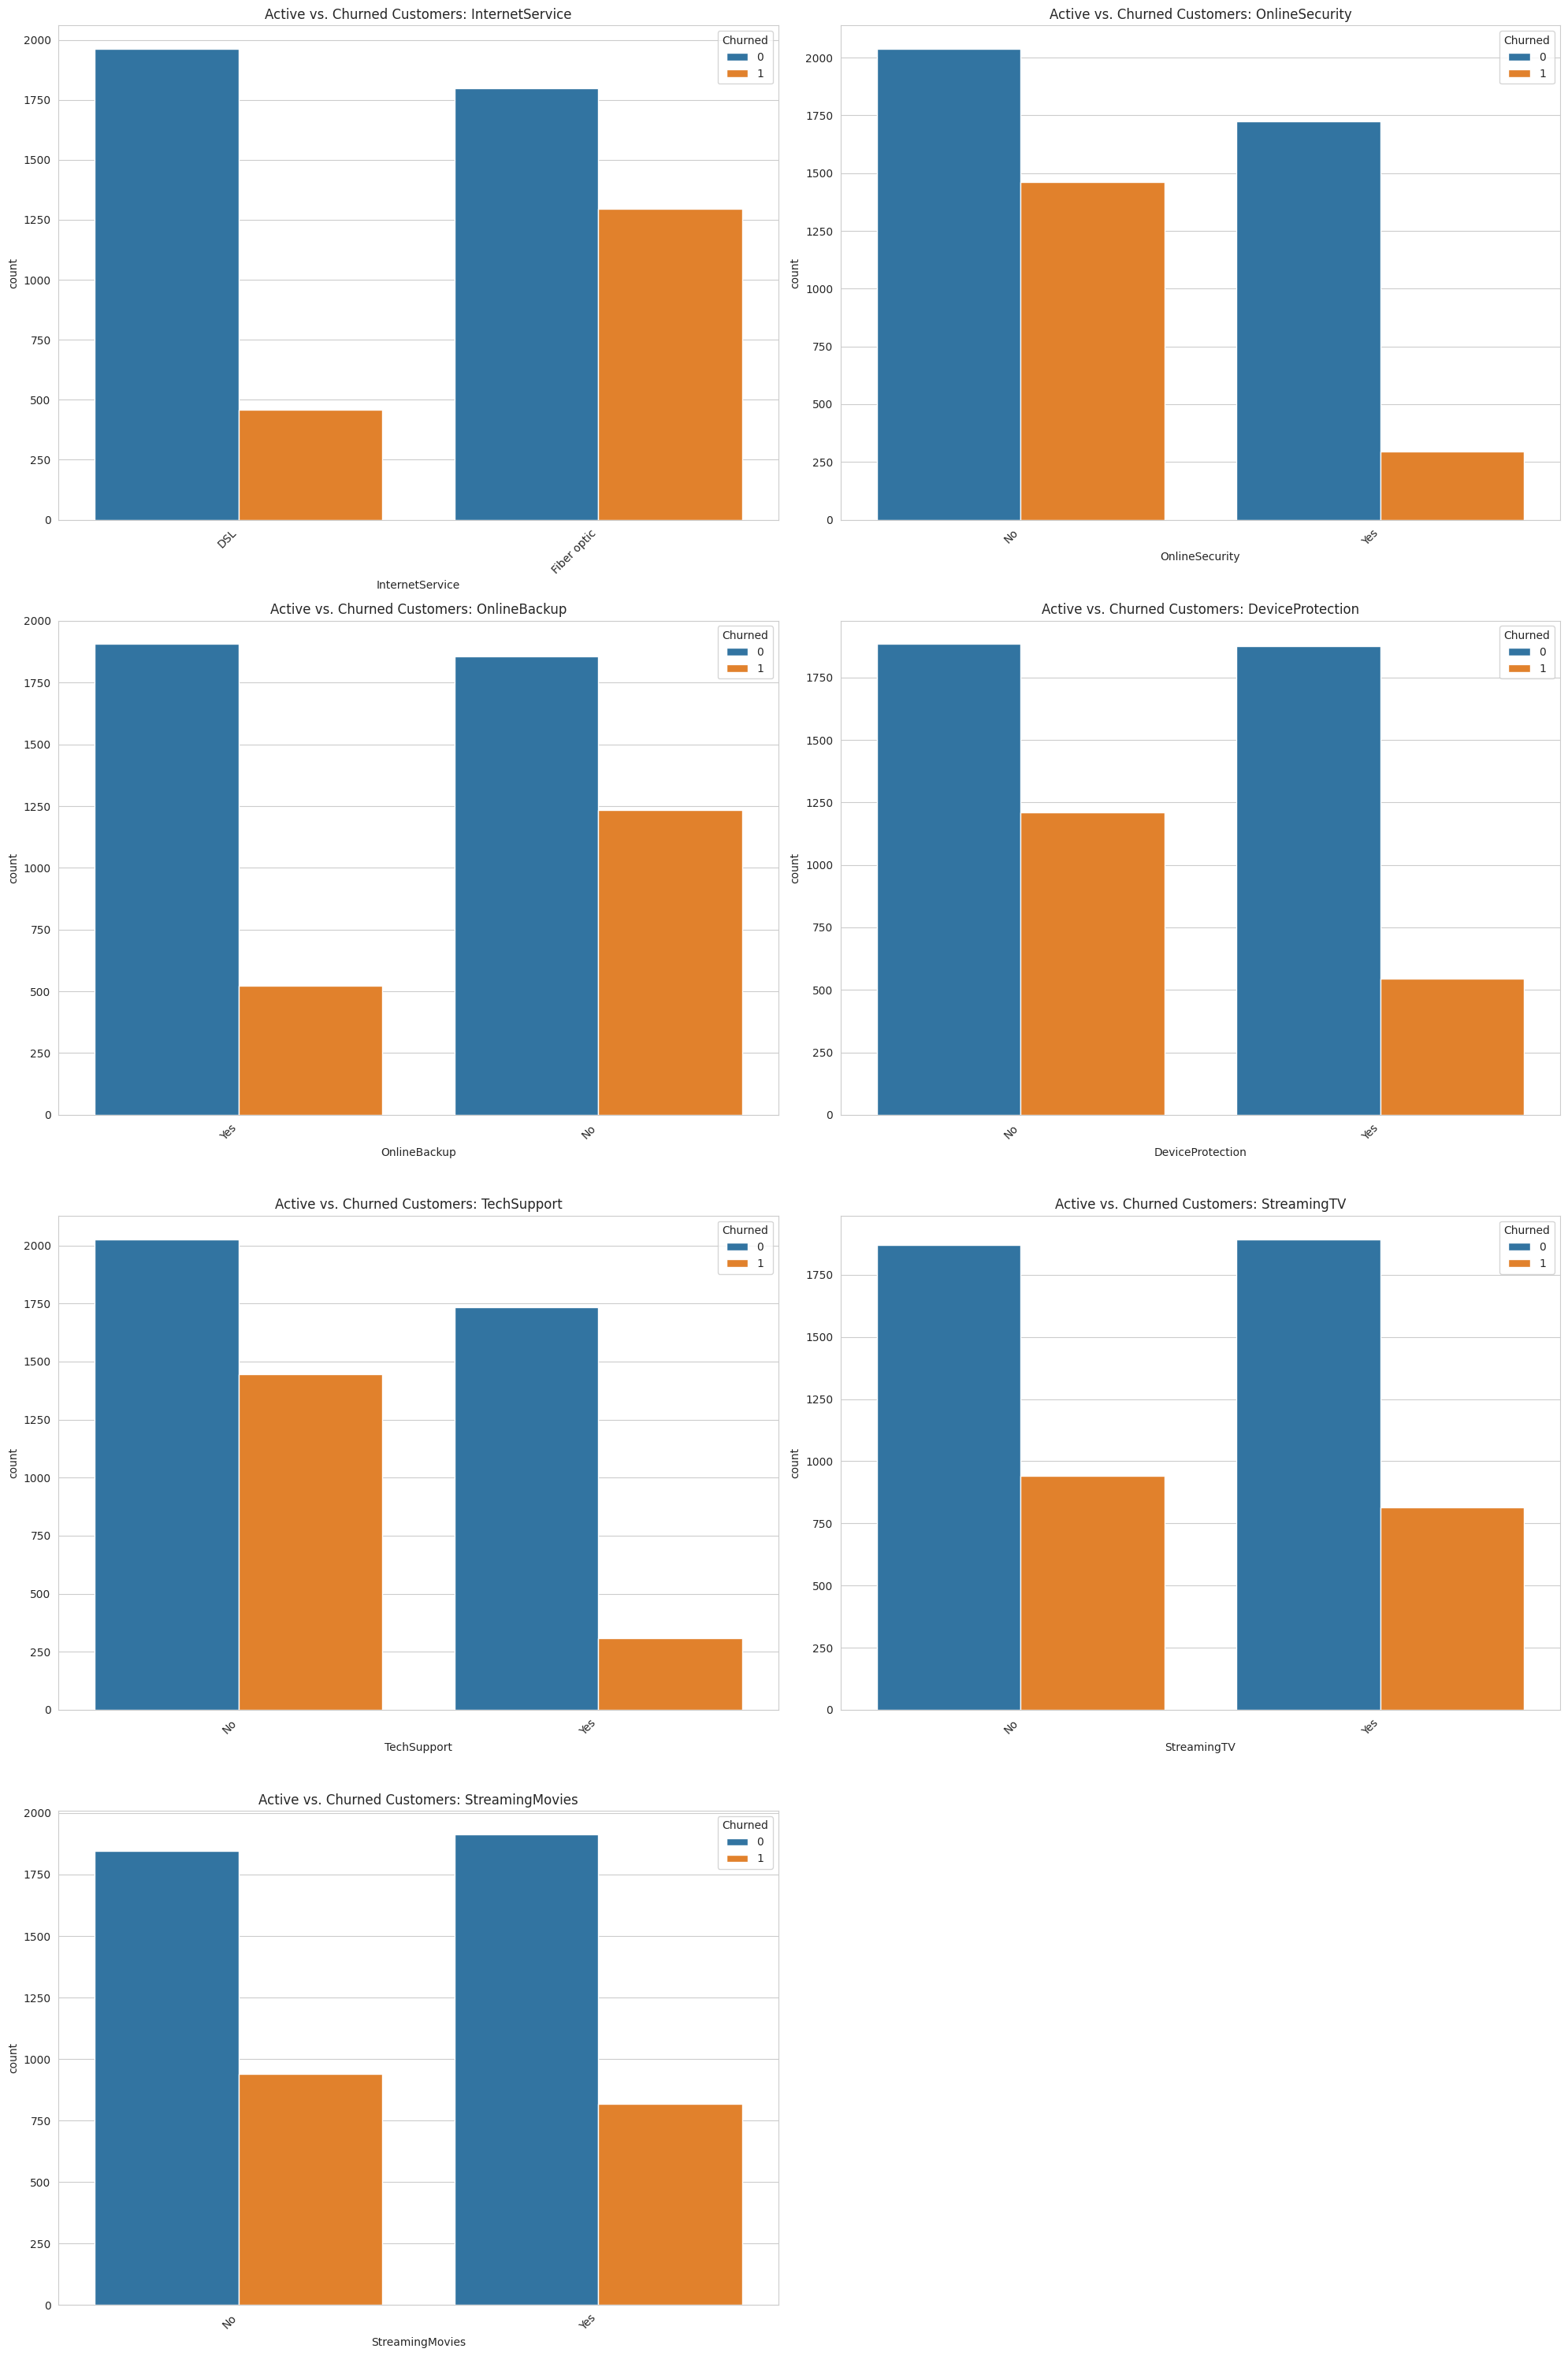

In [42]:
# Plot internet service options
columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(4, 2, figsize=(20, 30))

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(data=df_merged, x=col, hue='Churned', ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_title(f'Active vs. Churned Customers: {col}')
    axes[i].legend(title='Churned', loc='upper right')

fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

* Active customers are almost evenly split between the internet service options, with DSL in the majority. The opposite is true for churned customers who more overwhelmingly prefer fiber optic
* Both segments don’t use the malicious website blocker for security, with an even larger majority for churned customers
* Active customers are almost evenly split between having online backup or not. The divide is wider for churned customers, who are more inclined not to use the online backup service
* Active customers are almost evenly split between using antivirus software or not for protection. The difference is greater among churned customers, who are more likely not to use the protection
* Active customers are slightly more inclined to not use the dedicated tech support line, whereas churned customers are more overwhelmingly inclined to not use the support line
* Streaming TV and movies show similar trends: both segments are almost evenly split on whether they stream the content (TV, movies) or not

## Feature preparation

In [43]:
# Drop missing values
df_merged = df_merged.dropna().reset_index(drop=True)

In [44]:
# Drop features irrelevant to model training 
df_merged = df_merged.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

In [45]:
# Split the data
features = df_merged.drop(['Churned'], axis=1)
target = df_merged['Churned']

features_train, features_remaining, target_train, target_remaining = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_remaining, target_remaining, test_size=0.5, random_state=12345)

In [46]:
categorical_features = [
    'PaymentType',
    'PaperlessBilling',
    'PaymentMethod',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Gender',
    'Partner',
    'Dependents',
    'MultipleLines'
]

for feature in categorical_features:
    print(f'{feature}: {df_merged[feature].value_counts().count()}')

PaymentType: 3
PaperlessBilling: 2
PaymentMethod: 4
InternetService: 2
OnlineSecurity: 2
OnlineBackup: 2
DeviceProtection: 2
TechSupport: 2
StreamingTV: 2
StreamingMovies: 2
Gender: 2
Partner: 2
Dependents: 2
MultipleLines: 2


In [47]:
numeric_features = [
    'PaymentMonths',
    'MonthlyCharges',
    'TotalCharges'
]

### OHE encoding

In [48]:
df_merged_ohe = df_merged.copy()

df_merged_ohe = pd.get_dummies(df_merged_ohe, columns=categorical_features, drop_first=True, dtype='int')

display(df_merged_ohe.head(10))
df_merged_ohe.info()

,PaymentMonths,Churned,MonthlyCharges,TotalCharges,SeniorCitizen,PaymentType_One year,PaymentType_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes
0,34,0,56.95,1889.50,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,2,1,53.85,108.15,0,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
2,2,1,70.70,151.65,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,8,1,99.65,820.50,0,0,0,1,0,1,...,0,0,1,0,1,1,0,0,0,1
4,22,0,89.10,1949.40,0,0,0,1,1,0,...,0,1,0,0,1,0,1,0,1,1
5,28,1,104.80,3046.05,0,0,0,1,0,1,...,0,0,1,1,1,1,0,1,0,1
6,62,0,56.15,3487.95,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
7,13,0,49.95,587.45,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
8,58,0,100.35,5681.10,0,1,0,0,1,0,...,0,0,1,0,1,1,1,1,0,1
9,49,1,103.70,5036.30,0,0,0,1,0,0,...,0,1,1,0,1,1,1,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PaymentMonths                          4835 non-null   int64  
 1   Churned                                4835 non-null   int64  
 2   MonthlyCharges                         4835 non-null   float64
 3   TotalCharges                           4835 non-null   float64
 4   SeniorCitizen                          4835 non-null   int64  
 5   PaymentType_One year                   4835 non-null   int64  
 6   PaymentType_Two year                   4835 non-null   int64  
 7   PaperlessBilling_Yes                   4835 non-null   int64  
 8   PaymentMethod_Credit card (automatic)  4835 non-null   int64  
 9   PaymentMethod_Electronic check         4835 non-null   int64  
 10  PaymentMethod_Mailed check             4835 non-null   int64  
 11  Inte

In [49]:
# Rename columns
df_merged_ohe = df_merged_ohe.rename(columns={
    'PaymentType_One year': 'PaymentType_OneYear',
    'PaymentType_Two year': 'PaymentType_TwoYear',
    'PaymentMethod_Credit card (automatic)': 'PaymentMethod_CreditCardAutomatic',
    'PaymentMethod_Electronic check': 'PaymentMethod_ElectronicCheck',
    'PaymentMethod_Mailed check': 'PaymentMethod_MailedCheck',
    'InternetService_Fiber optic': 'InternetService_FiberOptic'
})

In [50]:
# Split the data
features_ohe = df_merged_ohe.drop('Churned', axis=1)
target_ohe = df_merged_ohe['Churned']

features_train_ohe, features_remaining_ohe, target_train_ohe, target_remaining_ohe = train_test_split(features_ohe, target_ohe, test_size=0.4, random_state=12345)
features_valid_ohe, features_test_ohe, target_valid_ohe, target_test_ohe = train_test_split(features_remaining_ohe, target_remaining_ohe, test_size=0.5, random_state=12345)

print(features_train_ohe.shape)
print(target_train_ohe.shape)

(2901, 21)
(2901,)


To prepare the features for training, missing values and irrelevant features are dropped from the merged data. This then gets split into training, validation, and test sets. As a test set does not exist, the source data is split in a 3:1:1 ratio.

### Ordinal encoding

In [51]:
df_merged_ordinal = df_merged.copy()

encoder = OrdinalEncoder()
df_merged_ordinal = pd.DataFrame(encoder.fit_transform(df_merged_ordinal), columns=df_merged_ordinal.columns)

display(df_merged_ordinal.head(10))
df_merged_ordinal.info()

,PaymentMonths,Churned,PaymentType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,34.0,0.0,1.0,0.0,3.0,200.0,1960.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,1.0,0.0,1.0,3.0,140.0,295.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.0,1.0,0.0,1.0,2.0,422.0,368.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,1.0,0.0,1.0,2.0,967.0,1190.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,22.0,0.0,0.0,1.0,1.0,768.0,1997.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
5,28.0,1.0,0.0,1.0,2.0,1064.0,2588.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
6,62.0,0.0,1.0,0.0,0.0,185.0,2803.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,13.0,0.0,0.0,1.0,3.0,89.0,980.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8,58.0,0.0,1.0,0.0,1.0,981.0,3786.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
9,49.0,1.0,0.0,1.0,0.0,1042.0,3519.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PaymentMonths     4835 non-null   float64
 1   Churned           4835 non-null   float64
 2   PaymentType       4835 non-null   float64
 3   PaperlessBilling  4835 non-null   float64
 4   PaymentMethod     4835 non-null   float64
 5   MonthlyCharges    4835 non-null   float64
 6   TotalCharges      4835 non-null   float64
 7   InternetService   4835 non-null   float64
 8   OnlineSecurity    4835 non-null   float64
 9   OnlineBackup      4835 non-null   float64
 10  DeviceProtection  4835 non-null   float64
 11  TechSupport       4835 non-null   float64
 12  StreamingTV       4835 non-null   float64
 13  StreamingMovies   4835 non-null   float64
 14  Gender            4835 non-null   float64
 15  SeniorCitizen     4835 non-null   float64
 16  Partner           4835 non-null   float64


In [52]:
# Split the data
features_ordinal = df_merged_ordinal.drop('Churned', axis=1)
target_ordinal = df_merged_ordinal['Churned']

features_train_ordinal, features_remaining_ordinal, target_train_ordinal, target_remaining_ordinal = train_test_split(features_ordinal, target_ordinal, test_size=0.4, random_state=12345)
features_valid_ordinal, features_test_ordinal, target_valid_ordinal, target_test_ordinal = train_test_split(features_remaining_ordinal, target_remaining_ordinal, test_size=0.5, random_state=12345)

print(features_train_ordinal.shape)
print(target_train_ordinal.shape)

(2901, 18)
(2901,)


One-hot encoding is performed to transformed the categorical features identified into numerical features. The features will be assigned equal importannce while still being able to be recognized as distinct and different.

This is followed by ordinal encoding of the data to be used for the tree-based algorithms (e.g. decision tree and random forest) to be modeled. This encoding keeps all information on the original variables in one feature by replacing the categories with arbitrary numeric labels.

### Feature scaling

In [53]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric_features])

# Transform the data
features_train_ohe[numeric_features] = scaler.transform(features_train_ohe[numeric_features])
features_valid_ohe[numeric_features] = scaler.transform(features_valid_ohe[numeric_features])
features_test_ohe[numeric_features] = scaler.transform(features_test_ohe[numeric_features])

display(features_train_ohe.head(10))

,PaymentMonths,MonthlyCharges,TotalCharges,SeniorCitizen,PaymentType_OneYear,PaymentType_TwoYear,PaperlessBilling_Yes,PaymentMethod_CreditCardAutomatic,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes
2366,-0.375608,1.029900,-0.220988,0,0,0,1,0,1,0,...,0,0,1,0,1,1,1,1,0,1
738,0.396724,0.934685,0.531720,0,0,0,1,0,0,0,...,0,0,1,0,1,1,0,1,1,1
1737,1.453599,0.140319,1.222659,0,0,1,1,0,0,1,...,1,1,1,1,1,1,1,1,0,0
2460,-1.066641,-0.602360,-1.015509,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2002,1.128407,0.926524,1.276955,0,0,0,1,0,1,0,...,0,1,0,0,1,1,0,1,1,1
193,1.412950,-1.505544,0.315531,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
741,0.274777,-0.074596,0.117185,0,1,0,1,0,0,1,...,0,0,1,1,1,1,0,0,0,1
460,0.640618,0.420523,0.563701,1,1,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0
565,-0.944694,0.891158,-0.773073,0,0,0,1,0,1,0,...,0,0,0,1,1,1,0,0,0,1
3251,0.681267,1.421643,1.037396,0,1,0,1,0,1,0,...,1,1,1,0,1,1,1,1,1,1


In [54]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(features_train_ordinal[numeric_features])

# Transform the data
features_train_ordinal[numeric_features] = scaler.transform(features_train_ordinal[numeric_features])
features_valid_ordinal[numeric_features] = scaler.transform(features_valid_ordinal[numeric_features])
features_test_ordinal[numeric_features] = scaler.transform(features_test_ordinal[numeric_features])

display(features_train_ordinal.head(10))

,PaymentMonths,PaymentType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Gender,SeniorCitizen,Partner,Dependents,MultipleLines
2366,-0.375608,0.0,1.0,2.0,1.060770,-0.002587,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
738,0.396724,0.0,1.0,0.0,0.954856,0.639256,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1737,1.453599,2.0,1.0,3.0,0.113594,1.186473,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2460,-1.066641,0.0,1.0,2.0,-0.652015,-1.040540,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2002,1.128407,0.0,1.0,2.0,0.945777,1.234153,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
193,1.412950,0.0,0.0,3.0,-1.493277,0.463941,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
741,0.274777,1.0,1.0,3.0,-0.110339,0.301830,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
460,0.640618,1.0,1.0,0.0,0.419232,0.665663,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
565,-0.944694,0.0,1.0,2.0,0.909464,-0.637095,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3251,0.681267,1.0,1.0,2.0,1.466270,1.033898,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


The encoded data then undergoes scaling to standardize the data to have equal important once they get used by the algorithms.

## Model training (imbalanced)

In [55]:
# Create the AUC-ROC scorer
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

### Baseline

In [56]:
# Create and train the model
model_dummy = DummyClassifier(strategy='stratified', random_state=12345)
model_dummy.fit(features_train, target_train)

# Find predictions
pred_proba_valid = model_dummy.predict_proba(features_valid)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

AUC-ROC value: 0.5122594018359491


### Logistic regression

In [57]:
# Create and train the model
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train_ohe, target_train_ohe)

# Find predictions
pred_proba_valid = model_lr.predict_proba(features_valid_ohe)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid_ohe, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

AUC-ROC value: 0.8253528773072747


#### Cross-validation

In [58]:
# Evaluate the model
model_lr = LogisticRegression(random_state=12345, solver='liblinear')

scores_lr = cross_val_score(model_lr, features_train_ohe, target_train_ohe, scoring=auc_scorer, cv=5)
final_score_lr = sum(scores_lr) / len(scores_lr)

print(f'Model scores: {scores_lr}')
print(f'Average model evaluation score: {final_score_lr:.3f} (+/- {scores_lr.std() * 2:.3f})')

Model scores: [0.79668865 0.83676113 0.81848853 0.79995951 0.79994602]
Average model evaluation score: 0.810 (+/- 0.031)


### Decision tree

In [59]:
# Hyperparamter tuning
param_grid_dt = {
    'max_depth': [1, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

model_dt = DecisionTreeClassifier(random_state=12345)
clf = GridSearchCV(model_dt, param_grid=param_grid_dt, scoring=auc_scorer, cv=5, verbose=2)
clf.fit(features_train_ordinal, target_train_ordinal)

print(f'Best parameters on the training set: {clf.best_params_}')
print(f'Best AUC-ROC score: {clf.best_score_}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, max_fea

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total ti

[CV] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total 

[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; tota

[CV] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10; total 

[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5;

In [60]:
# Train the model
model_dt = DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=12345)
model_dt.fit(features_train_ordinal, target_train_ordinal)

# Find predictions
pred_proba_valid = model_dt.predict_proba(features_valid_ordinal)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid_ordinal, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

AUC-ROC value: 0.7811025565097225


#### Cross-validation

In [61]:
# Evaluate the model
model_dt = DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=12345)

scores_dt = cross_val_score(model_dt, features_train_ordinal, target_train_ordinal, scoring=auc_scorer, cv=5)
final_score_dt = sum(scores_dt) / len(scores_dt)

print(f'Model scores: {scores_dt}')
print(f'Average model evaluation score: {final_score_dt:.3f} (+/- {scores_dt.std() * 2:.3f})')

Model scores: [0.75894468 0.80178812 0.79589744 0.7734413  0.7421525 ]
Average model evaluation score: 0.774 (+/- 0.045)


### Random forest

In [62]:
# Hyperparamter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

model_rf = RandomForestClassifier(random_state=12345)
clf = GridSearchCV(model_rf, param_grid=param_grid_rf, scoring=auc_scorer, cv=5, verbose=2)
clf.fit(features_train_ordinal, target_train_ordinal)

print(f'Best parameters on the training set: {clf.best_params_}')
print(f'Best AUC-ROC score: {clf.best_score_}')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total tim

[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=log2, 

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=log2

In [63]:
# Train the model
model_rf = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=12345)
model_rf.fit(features_train_ordinal, target_train_ordinal)

# Find predictions
pred_proba_valid = model_rf.predict_proba(features_valid_ordinal)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid_ordinal, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

AUC-ROC value: 0.8274010462935544


#### Cross-validation

In [64]:
# Evaluate the model
model_rf = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=12345)

scores_rf = cross_val_score(model_rf, features_train_ordinal, target_train_ordinal, scoring=auc_scorer, cv=5)
final_score_rf = sum(scores_rf) / len(scores_rf)

print(f'Model scores: {scores_rf}')
print(f'Average model evaluation score: {final_score_rf:.3f} (+/- {scores_rf.std() * 2:.3f})')

Model scores: [0.79830394 0.84060729 0.82593117 0.79839406 0.79181511]
Average model evaluation score: 0.811 (+/- 0.038)


For the first run of model training, the classes will remain imbalanced. Hyperparameters are tuned where appropriate in order to improve the models. Each model that is trained is followed by an evaluation of its quality and to verify results via cross-validation scoring. The outcomes of the models, using the AUC-ROC evaluation metric, are as follows:

* Baseline: 0.5122594018359491
* Logistic regression: 0.8253528773072747
* Decision tree: 0.7811025565097225
* Random forest: 0.8274010462935544 - *best score*

## Model training (balanced)

In [65]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [66]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

### Logistic regression

#### Upsampled

In [67]:
best_repeat = None
best_score = 0

for repeat in range(1, 11):
    features_upsampled, target_upsampled = upsample(features_train_ohe, target_train_ohe, repeat)

    # Train the model
    model_lr = LogisticRegression(random_state=12345)
    model_lr.fit(features_upsampled, target_upsampled)

    # Find predictions
    pred_proba_valid = model_lr.predict_proba(features_valid_ohe)[:, 1]

    # Calculate AUC-ROC
    score = roc_auc_score(target_valid_ohe, pred_proba_valid)
    
    if score > best_score:
        best_score = score
        best_repeat = repeat

print(f'Best repeat value: {best_repeat}')
print(f'Best validation AUC-ROC: {best_score}')

Best repeat value: 2
Best validation AUC-ROC: 0.8258316059618992


In [68]:
features_ohe_upsampled, target_ohe_upsampled = upsample(features_train_ohe, target_train_ohe, 2)

In [69]:
model_lr = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model_lr.fit(features_ohe_upsampled, target_ohe_upsampled)

# Find predictions
pred_proba_valid = model_lr.predict_proba(features_valid_ohe)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid_ohe, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

AUC-ROC value: 0.8258464120027638


#### Downsampled

In [70]:
# Parameter tuning
start = 0.1
end = 1.0
interval = 0.1
best_fraction = None
best_score = 0
current = start

while current <= end:
    features_downsampled, target_downsampled = downsample(features_train_ohe, target_train_ohe, current)

    # Train the model
    model_lr = LogisticRegression(random_state=12345)
    model_lr.fit(features_downsampled, target_downsampled)

    # Find predictions
    pred_proba_valid = model_lr.predict_proba(features_valid_ohe)[:, 1]

    # Calculate AUC-ROC
    score = roc_auc_score(target_valid_ohe, pred_proba_valid)
    
    if score > best_score:
        best_score = score
        best_fraction = current

    current += interval

print(f'Best fraction value: {best_fraction}')
print(f'Best validation AUC-ROC: {best_score}')

Best fraction value: 0.9999999999999999
Best validation AUC-ROC: 0.8254367782055078


In [71]:
features_ohe_downsampled, target_ohe_downsampled = downsample(features_train_ohe, target_train_ohe, best_fraction)

In [72]:
model_lr = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model_lr.fit(features_ohe_downsampled, target_ohe_downsampled)

# Find predictions
pred_proba_valid = model_lr.predict_proba(features_valid_ohe)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid_ohe, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

AUC-ROC value: 0.8255256144506959


### Decision tree

#### Upsampled

In [73]:
best_repeat = None
best_score = 0

for repeat in range(1, 11):
    features_upsampled, target_upsampled = upsample(features_train_ordinal, target_train_ordinal, repeat)

    # Train the model
    model_dt = DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=12345)
    model_dt.fit(features_upsampled, target_upsampled)

    # Find predictions
    pred_proba_valid = model_dt.predict_proba(features_valid_ordinal)[:, 1]

    # Calculate AUC-ROC
    score = roc_auc_score(target_valid_ordinal, pred_proba_valid)
    
    if score > best_score:
        best_score = score
        best_repeat = repeat

print(f'Best repeat value: {best_repeat}')
print(f'Best validation AUC-ROC: {best_score}')

Best repeat value: 6
Best validation AUC-ROC: 0.8050809396900602


In [74]:
features_ordinal_upsampled, target_ordinal_upsampled = upsample(features_train_ordinal, target_train_ordinal, best_repeat)

In [75]:
# Create and train the model
model_dt = DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=12345, class_weight='balanced')
model_dt.fit(features_ordinal_upsampled, target_ordinal_upsampled)

# Find predictions
pred_proba_valid = model_dt.predict_proba(features_valid_ordinal)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid_ordinal, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

AUC-ROC value: 0.7811025565097225


#### Downsampled

In [76]:
# Parameter tuning
start = 0.1
end = 1.0
interval = 0.1
best_fraction = None
best_score = 0
current = start

while current <= end:
    features_downsampled, target_downsampled = downsample(features_train_ordinal, target_train_ordinal, current)

    # Train the model
    model_dt = DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=12345)
    model_dt.fit(features_downsampled, target_downsampled)

    # Find predictions
    pred_proba_valid = model_dt.predict_proba(features_valid_ordinal)[:, 1]

    # Calculate AUC-ROC
    score = roc_auc_score(target_valid_ordinal, pred_proba_valid)
    
    if score > best_score:
        best_score = score
        best_fraction = current

    current += interval

print(f'Best fraction value: {best_fraction}')
print(f'Best validation AUC-ROC: {best_score}')

Best fraction value: 0.5
Best validation AUC-ROC: 0.7880663310630737


In [77]:
features_ordinal_downsampled, target_ordinal_downsampled = downsample(features_train_ordinal, target_train_ordinal, best_fraction)

In [78]:
# Create and train the model
model_dt = DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=12345, class_weight='balanced')
model_dt.fit(features_ordinal_downsampled, target_ordinal_downsampled)

# Find predictions
pred_proba_valid = model_dt.predict_proba(features_valid_ordinal)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid_ordinal, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

AUC-ROC value: 0.7883229691047281


### Random forest

#### Upsampled

In [79]:
best_repeat = None
best_score = 0

for repeat in range(1, 11):
    features_upsampled, target_upsampled = upsample(features_train_ordinal, target_train_ordinal, repeat)

    # Train the model
    model_rf = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=12345)
    model_rf.fit(features_upsampled, target_upsampled)

    # Find predictions
    pred_proba_valid = model_rf.predict_proba(features_valid_ordinal)[:, 1]

    # Calculate AUC-ROC
    score = roc_auc_score(target_valid_ordinal, pred_proba_valid)
    
    if score > best_score:
        best_score = score
        best_repeat = repeat

print(f'Best repeat value: {best_repeat}')
print(f'Best validation AUC-ROC: {best_score}')

Best repeat value: 2
Best validation AUC-ROC: 0.8275392360082914


In [80]:
features_ordinal_upsampled, target_ordinal_upsampled = upsample(features_train_ordinal, target_train_ordinal, best_repeat)

In [81]:
# Create and train the model
model_rf = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=12345, class_weight='balanced')
model_rf.fit(features_ordinal_upsampled, target_ordinal_upsampled)

# Find predictions
pred_proba_valid = model_rf.predict_proba(features_valid_ordinal)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid_ordinal, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

AUC-ROC value: 0.8278156154377653


#### Downsampled

In [82]:
# Parameter tuning
start = 0.1
end = 1.0
interval = 0.1
best_fraction = None
best_score = 0
current = start

while current <= end:
    features_downsampled, target_downsampled = downsample(features_train_ordinal, target_train_ordinal, current)

    # Train the model
    model_rf = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=12345)
    model_rf.fit(features_downsampled, target_downsampled)

    # Find predictions
    pred_proba_valid = model_rf.predict_proba(features_valid_ordinal)[:, 1]

    # Calculate AUC-ROC
    score = roc_auc_score(target_valid_ordinal, pred_proba_valid)
    
    if score > best_score:
        best_score = score
        best_fraction = current

    current += interval

print(f'Best fraction value: {best_fraction}')
print(f'Best validation AUC-ROC: {best_score}')

Best fraction value: 0.8999999999999999
Best validation AUC-ROC: 0.82726038890534


In [83]:
features_ordinal_downsampled, target_ordinal_downsampled = downsample(features_train_ordinal, target_train_ordinal, best_fraction)

In [84]:
# Create and train the model
model_rf = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=12345, class_weight='balanced')
model_rf.fit(features_ordinal_downsampled, target_ordinal_downsampled)

# Find predictions
pred_proba_valid = model_rf.predict_proba(features_valid_ordinal)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid_ordinal, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

AUC-ROC value: 0.8271370052314678


For the next run of model training, the classes are balanced to try to improve evaluation metric quality. This is done using class weight adjustment (which makes rarer classes weigh more) paired with upsampling (which makes observations of a rare class less rare in the data), and then downsampling (which makes observations of a frequent class less frequent in the data). The outcomes of these models, using the AUC-ROC evaluation metric, are as follows:

**Logistic regression**

* Upsampled: 0.8258464120027638 (slightly improved score vs. imbalanced score)
* Downsampled: 0.8255256144506959 (slightly improved score vs. imbalanced score, but worse than the upsample score)

**Decision tree**

* Upsampled: 0.7811025565097225 (same as imbalanced score)
* Downsampled: 0.7883229691047281 (slightly improved score vs. imbalanced score, upsampled score)

**Random forest**

* Upsampled: 0.8278156154377653 (slightly improved score vs. imbalanced score) - *new best score*
* Downsampled: 0.8271370052314678 (slightly worsened score vs. imbalanced score, upsampled score)

## Model training (gradient boosting)

### XGBoost

In [96]:
# Hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

model_xgb = xgb.XGBClassifier()
clf = GridSearchCV(model_xgb, param_grid=param_grid_xgb, scoring=auc_scorer, cv=5, verbose=2)
clf.fit(features_train_ordinal, target_train_ordinal)

print(f'Best parameters on the training set: {clf.best_params_}')
print(f'Best AUC-ROC score: {clf.best_score_}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[17:35:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.3s
[17:35:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[17:35:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..learning_

[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   2.2s
[17:36:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   3.3s
[17:36:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   3.7s
[17:36:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[

[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.9s
[17:37:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   1.7s
[17:37:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   1.8s
[17:37:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[

[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   2.2s
[17:39:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   2.1s
[17:39:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=   3.1s
[17:39:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[

In [97]:
# Train and evaluate the model
model_xgb = xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100)
model_xgb.fit(
    features_train_ordinal,
    target_train_ordinal,
    verbose=20
)

# Find predictions
pred_proba_valid = model_xgb.predict_proba(features_valid_ordinal)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid_ordinal, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

[17:44:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC-ROC value: 0.8162274207876814


#### Cross-validation

In [98]:
# Evaluate the model
model_xgb = xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100)

scores_xgb = cross_val_score(model_xgb, features_train_ordinal, target_train_ordinal, scoring=auc_scorer, cv=5)
final_score_xgb = sum(scores_xgb) / len(scores_xgb)

print(f'Model scores: {scores_xgb}')
print(f'Average model evaluation score: {final_score_xgb:.3f} (+/- {scores_xgb.std() * 2:.3f})')

[17:45:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### LightGBM

In [99]:
# Hyperparameter tuning
param_grid_lgb = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

model_lgb = lgb.LGBMClassifier()
clf = GridSearchCV(model_lgb, param_grid=param_grid_lgb, scoring=auc_scorer, cv=5, verbose=2)
clf.fit(features_train_ordinal, target_train_ordinal, categorical_feature=categorical_features)

print(f'Best parameters on the training set: {clf.best_params_}')
print(f'Best AUC-ROC score: {clf.best_score_}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=20; total time=   0.4s
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=20; total time=   0.5s
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=20; total time=   0.4s
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=20; total time=   0.3s
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=20; total time=   0.3s
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=31; total time=   0.4s
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=31; total time=   0.5s
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=31; total time=   0.4s
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=31; total time=   0.4s
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=31; total time=   0.5s
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=50; total time=   0.5s
[CV] END learning_rate=0.01, n_estimators=100, 

[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=50; total time=   0.5s
[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=50; total time=   0.5s
[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=50; total time=   0.6s
[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=50; total time=   0.6s
[CV] END .learning_rate=0.1, n_estimators=200, num_leaves=20; total time=   0.5s
[CV] END .learning_rate=0.1, n_estimators=200, num_leaves=20; total time=   0.6s
[CV] END .learning_rate=0.1, n_estimators=200, num_leaves=20; total time=   0.5s
[CV] END .learning_rate=0.1, n_estimators=200, num_leaves=20; total time=   0.6s
[CV] END .learning_rate=0.1, n_estimators=200, num_leaves=20; total time=   0.6s
[CV] END .learning_rate=0.1, n_estimators=200, num_leaves=31; total time=   0.9s
[CV] END .learning_rate=0.1, n_estimators=200, num_leaves=31; total time=   0.8s
[CV] END .learning_rate=0.1, n_estimators=200, num_leaves=31; total time=   0.7s
[CV] END .learning_rate=0.1,

In [100]:
# Train and evaluate the model
model_lgb = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=200, num_leaves=20)
model_lgb.fit(
    features_train_ordinal,
    target_train_ordinal,
    categorical_feature=categorical_features
)

# Find predictions
pred_proba_valid = model_lgb.predict_proba(features_valid_ordinal)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid_ordinal, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

AUC-ROC value: 0.8263029315960913


#### Cross-validation

In [101]:
# Evaluate the model
model_lgb = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=200, num_leaves=20)

scores_lgb = cross_val_score(model_lgb, features_train_ordinal, target_train_ordinal, scoring=auc_scorer, cv=5)
final_score_lgb = sum(scores_lgb) / len(scores_lgb)

print(f'Model scores: {scores_lgb}')
print(f'Average model evaluation score: {final_score_lgb:.3f} (+/- {scores_lgb.std() * 2:.3f})')

Model scores: [0.80214026 0.83876518 0.81182186 0.7984278  0.79077598]
Average model evaluation score: 0.808 (+/- 0.033)


### CatBoost

In [102]:
# Hyperparameter tuning
param_grid_cb = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [4, 6, 8]
}

features_train[categorical_features] = features_train[categorical_features].astype(str)

model_cb = CatBoostClassifier(loss_function='Logloss', random_state=12345)
clf = GridSearchCV(model_cb, param_grid=param_grid_cb, scoring=auc_scorer, cv=5, verbose=0)
clf.fit(features_train, target_train, cat_features=categorical_features)

print(f'Best parameters on the training set: {clf.best_params_}')
print(f'Best AUC-ROC score: {clf.best_score_}')

0:	learn: 0.6900016	total: 1.72ms	remaining: 170ms
1:	learn: 0.6871131	total: 3.45ms	remaining: 169ms
2:	learn: 0.6846148	total: 5.07ms	remaining: 164ms
3:	learn: 0.6816561	total: 6.52ms	remaining: 156ms
4:	learn: 0.6787984	total: 7.94ms	remaining: 151ms
5:	learn: 0.6762137	total: 9.41ms	remaining: 147ms
6:	learn: 0.6735837	total: 10.8ms	remaining: 144ms
7:	learn: 0.6709126	total: 12.4ms	remaining: 143ms
8:	learn: 0.6683159	total: 13.9ms	remaining: 140ms
9:	learn: 0.6657102	total: 15.3ms	remaining: 138ms
10:	learn: 0.6632631	total: 16.8ms	remaining: 136ms
11:	learn: 0.6607936	total: 18.2ms	remaining: 133ms
12:	learn: 0.6584799	total: 19.6ms	remaining: 131ms
13:	learn: 0.6559753	total: 21ms	remaining: 129ms
14:	learn: 0.6537171	total: 22.5ms	remaining: 127ms
15:	learn: 0.6513199	total: 23.9ms	remaining: 125ms
16:	learn: 0.6490502	total: 25.4ms	remaining: 124ms
17:	learn: 0.6467497	total: 26.8ms	remaining: 122ms
18:	learn: 0.6444979	total: 28.3ms	remaining: 121ms
19:	learn: 0.6425204	tot

0:	learn: 0.6905025	total: 1.75ms	remaining: 174ms
1:	learn: 0.6875618	total: 3.56ms	remaining: 175ms
2:	learn: 0.6849716	total: 5.19ms	remaining: 168ms
3:	learn: 0.6823171	total: 6.62ms	remaining: 159ms
4:	learn: 0.6800469	total: 8.05ms	remaining: 153ms
5:	learn: 0.6777696	total: 9.55ms	remaining: 150ms
6:	learn: 0.6751513	total: 11ms	remaining: 146ms
7:	learn: 0.6726143	total: 12.5ms	remaining: 143ms
8:	learn: 0.6703615	total: 14ms	remaining: 141ms
9:	learn: 0.6678896	total: 15.5ms	remaining: 139ms
10:	learn: 0.6656126	total: 17ms	remaining: 137ms
11:	learn: 0.6631280	total: 18.4ms	remaining: 135ms
12:	learn: 0.6610690	total: 19.9ms	remaining: 133ms
13:	learn: 0.6587285	total: 21.6ms	remaining: 133ms
14:	learn: 0.6564219	total: 23.2ms	remaining: 131ms
15:	learn: 0.6541352	total: 24.7ms	remaining: 130ms
16:	learn: 0.6522460	total: 26.1ms	remaining: 128ms
17:	learn: 0.6502335	total: 27.6ms	remaining: 126ms
18:	learn: 0.6481351	total: 29.1ms	remaining: 124ms
19:	learn: 0.6460353	total: 

0:	learn: 0.6903963	total: 1.85ms	remaining: 184ms
1:	learn: 0.6872809	total: 3.77ms	remaining: 185ms
2:	learn: 0.6845538	total: 5.3ms	remaining: 171ms
3:	learn: 0.6817746	total: 6.79ms	remaining: 163ms
4:	learn: 0.6790603	total: 8.46ms	remaining: 161ms
5:	learn: 0.6767120	total: 9.9ms	remaining: 155ms
6:	learn: 0.6739289	total: 11.4ms	remaining: 151ms
7:	learn: 0.6712770	total: 12.8ms	remaining: 147ms
8:	learn: 0.6689030	total: 14.3ms	remaining: 144ms
9:	learn: 0.6663700	total: 15.8ms	remaining: 142ms
10:	learn: 0.6640218	total: 17.2ms	remaining: 139ms
11:	learn: 0.6617004	total: 18.7ms	remaining: 137ms
12:	learn: 0.6595399	total: 20.1ms	remaining: 134ms
13:	learn: 0.6570285	total: 21.5ms	remaining: 132ms
14:	learn: 0.6546309	total: 22.9ms	remaining: 130ms
15:	learn: 0.6522063	total: 24.3ms	remaining: 128ms
16:	learn: 0.6502060	total: 25.8ms	remaining: 126ms
17:	learn: 0.6478286	total: 27.2ms	remaining: 124ms
18:	learn: 0.6456865	total: 28.6ms	remaining: 122ms
19:	learn: 0.6435365	tot

0:	learn: 0.6686955	total: 1.72ms	remaining: 170ms
1:	learn: 0.6443372	total: 3.52ms	remaining: 172ms
2:	learn: 0.6263853	total: 5.14ms	remaining: 166ms
3:	learn: 0.6109250	total: 6.7ms	remaining: 161ms
4:	learn: 0.5995080	total: 8.19ms	remaining: 156ms
5:	learn: 0.5887806	total: 9.62ms	remaining: 151ms
6:	learn: 0.5773319	total: 11.2ms	remaining: 148ms
7:	learn: 0.5687541	total: 12.6ms	remaining: 145ms
8:	learn: 0.5614880	total: 14ms	remaining: 142ms
9:	learn: 0.5545881	total: 15.1ms	remaining: 136ms
10:	learn: 0.5477095	total: 16.5ms	remaining: 134ms
11:	learn: 0.5424257	total: 18ms	remaining: 132ms
12:	learn: 0.5365468	total: 19.6ms	remaining: 131ms
13:	learn: 0.5317103	total: 21.1ms	remaining: 130ms
14:	learn: 0.5275000	total: 22.2ms	remaining: 126ms
15:	learn: 0.5234505	total: 23.7ms	remaining: 124ms
16:	learn: 0.5190157	total: 25.2ms	remaining: 123ms
17:	learn: 0.5156617	total: 26.8ms	remaining: 122ms
18:	learn: 0.5131392	total: 28.3ms	remaining: 120ms
19:	learn: 0.5108443	total:

0:	learn: 0.6668114	total: 1.76ms	remaining: 175ms
1:	learn: 0.6413869	total: 3.53ms	remaining: 173ms
2:	learn: 0.6238133	total: 5.05ms	remaining: 163ms
3:	learn: 0.6068390	total: 6.46ms	remaining: 155ms
4:	learn: 0.5947947	total: 7.96ms	remaining: 151ms
5:	learn: 0.5832966	total: 9.41ms	remaining: 148ms
6:	learn: 0.5712590	total: 10.9ms	remaining: 144ms
7:	learn: 0.5614355	total: 12.3ms	remaining: 142ms
8:	learn: 0.5533827	total: 13.8ms	remaining: 139ms
9:	learn: 0.5460260	total: 14.8ms	remaining: 133ms
10:	learn: 0.5389372	total: 16.3ms	remaining: 132ms
11:	learn: 0.5331300	total: 17.7ms	remaining: 130ms
12:	learn: 0.5266893	total: 19.2ms	remaining: 129ms
13:	learn: 0.5218014	total: 20.7ms	remaining: 127ms
14:	learn: 0.5174217	total: 21.8ms	remaining: 123ms
15:	learn: 0.5131690	total: 23.3ms	remaining: 122ms
16:	learn: 0.5087470	total: 24.8ms	remaining: 121ms
17:	learn: 0.5054045	total: 26.4ms	remaining: 120ms
18:	learn: 0.5027516	total: 27.8ms	remaining: 119ms
19:	learn: 0.5004792	t

0:	learn: 0.6118733	total: 1.83ms	remaining: 181ms
1:	learn: 0.5683701	total: 3.65ms	remaining: 179ms
2:	learn: 0.5438368	total: 5.31ms	remaining: 172ms
3:	learn: 0.5243778	total: 6.9ms	remaining: 166ms
4:	learn: 0.5099032	total: 8.43ms	remaining: 160ms
5:	learn: 0.5015146	total: 9.94ms	remaining: 156ms
6:	learn: 0.4938217	total: 11.4ms	remaining: 151ms
7:	learn: 0.4896302	total: 12.9ms	remaining: 149ms
8:	learn: 0.4864832	total: 14.5ms	remaining: 146ms
9:	learn: 0.4830287	total: 16ms	remaining: 144ms
10:	learn: 0.4798304	total: 17.6ms	remaining: 143ms
11:	learn: 0.4767843	total: 19.1ms	remaining: 140ms
12:	learn: 0.4756704	total: 20.6ms	remaining: 138ms
13:	learn: 0.4740396	total: 22.1ms	remaining: 136ms
14:	learn: 0.4730326	total: 23.6ms	remaining: 133ms
15:	learn: 0.4710762	total: 25ms	remaining: 131ms
16:	learn: 0.4703847	total: 26.5ms	remaining: 129ms
17:	learn: 0.4682486	total: 28ms	remaining: 127ms
18:	learn: 0.4677622	total: 29.4ms	remaining: 126ms
19:	learn: 0.4671258	total: 3

0:	learn: 0.6247010	total: 1.74ms	remaining: 172ms
1:	learn: 0.5785243	total: 3.53ms	remaining: 173ms
2:	learn: 0.5568315	total: 5.2ms	remaining: 168ms
3:	learn: 0.5394879	total: 6.89ms	remaining: 165ms
4:	learn: 0.5288997	total: 8.6ms	remaining: 163ms
5:	learn: 0.5168569	total: 10.4ms	remaining: 164ms
6:	learn: 0.5085033	total: 11.9ms	remaining: 159ms
7:	learn: 0.5025102	total: 13.6ms	remaining: 156ms
8:	learn: 0.4978181	total: 15.4ms	remaining: 156ms
9:	learn: 0.4940456	total: 17.2ms	remaining: 155ms
10:	learn: 0.4906264	total: 18.7ms	remaining: 151ms
11:	learn: 0.4875469	total: 20.2ms	remaining: 148ms
12:	learn: 0.4852872	total: 21.7ms	remaining: 145ms
13:	learn: 0.4826740	total: 23.2ms	remaining: 143ms
14:	learn: 0.4806639	total: 24.7ms	remaining: 140ms
15:	learn: 0.4785018	total: 26.3ms	remaining: 138ms
16:	learn: 0.4773718	total: 27.7ms	remaining: 135ms
17:	learn: 0.4770215	total: 29.2ms	remaining: 133ms
18:	learn: 0.4755808	total: 30.7ms	remaining: 131ms
19:	learn: 0.4754334	tot

0:	learn: 0.6221558	total: 1.75ms	remaining: 173ms
1:	learn: 0.5725381	total: 3.58ms	remaining: 175ms
2:	learn: 0.5475958	total: 5.21ms	remaining: 169ms
3:	learn: 0.5314443	total: 6.66ms	remaining: 160ms
4:	learn: 0.5152915	total: 8.21ms	remaining: 156ms
5:	learn: 0.5060181	total: 9.7ms	remaining: 152ms
6:	learn: 0.4995091	total: 11.2ms	remaining: 148ms
7:	learn: 0.4936336	total: 12.7ms	remaining: 147ms
8:	learn: 0.4884488	total: 14.2ms	remaining: 144ms
9:	learn: 0.4848668	total: 15.7ms	remaining: 141ms
10:	learn: 0.4824718	total: 16.6ms	remaining: 134ms
11:	learn: 0.4797039	total: 18.1ms	remaining: 133ms
12:	learn: 0.4775073	total: 19.5ms	remaining: 131ms
13:	learn: 0.4751284	total: 21ms	remaining: 129ms
14:	learn: 0.4743628	total: 22.2ms	remaining: 126ms
15:	learn: 0.4725690	total: 23.6ms	remaining: 124ms
16:	learn: 0.4701861	total: 25.1ms	remaining: 123ms
17:	learn: 0.4696916	total: 26.6ms	remaining: 121ms
18:	learn: 0.4675727	total: 28ms	remaining: 120ms
19:	learn: 0.4672817	total:

82:	learn: 0.5278298	total: 405ms	remaining: 571ms
83:	learn: 0.5273924	total: 408ms	remaining: 564ms
84:	learn: 0.5267067	total: 411ms	remaining: 556ms
85:	learn: 0.5261792	total: 414ms	remaining: 548ms
86:	learn: 0.5253372	total: 417ms	remaining: 541ms
87:	learn: 0.5246983	total: 420ms	remaining: 535ms
88:	learn: 0.5241207	total: 423ms	remaining: 527ms
89:	learn: 0.5235849	total: 426ms	remaining: 520ms
90:	learn: 0.5229543	total: 429ms	remaining: 514ms
91:	learn: 0.5224438	total: 432ms	remaining: 507ms
92:	learn: 0.5218292	total: 435ms	remaining: 500ms
93:	learn: 0.5210748	total: 438ms	remaining: 494ms
94:	learn: 0.5204858	total: 441ms	remaining: 488ms
95:	learn: 0.5198860	total: 444ms	remaining: 481ms
96:	learn: 0.5191339	total: 447ms	remaining: 475ms
97:	learn: 0.5185234	total: 503ms	remaining: 523ms
98:	learn: 0.5178622	total: 506ms	remaining: 516ms
99:	learn: 0.5172420	total: 509ms	remaining: 509ms
100:	learn: 0.5165962	total: 512ms	remaining: 502ms
101:	learn: 0.5161716	total: 5

67:	learn: 0.5515986	total: 204ms	remaining: 395ms
68:	learn: 0.5507180	total: 207ms	remaining: 393ms
69:	learn: 0.5497821	total: 210ms	remaining: 390ms
70:	learn: 0.5488663	total: 213ms	remaining: 387ms
71:	learn: 0.5479376	total: 216ms	remaining: 384ms
72:	learn: 0.5472606	total: 218ms	remaining: 380ms
73:	learn: 0.5462233	total: 222ms	remaining: 377ms
74:	learn: 0.5452047	total: 225ms	remaining: 374ms
75:	learn: 0.5444554	total: 227ms	remaining: 371ms
76:	learn: 0.5434800	total: 230ms	remaining: 368ms
77:	learn: 0.5427411	total: 234ms	remaining: 365ms
78:	learn: 0.5420641	total: 237ms	remaining: 363ms
79:	learn: 0.5414103	total: 244ms	remaining: 366ms
80:	learn: 0.5405001	total: 247ms	remaining: 363ms
81:	learn: 0.5397773	total: 250ms	remaining: 360ms
82:	learn: 0.5390624	total: 253ms	remaining: 356ms
83:	learn: 0.5383021	total: 256ms	remaining: 354ms
84:	learn: 0.5375932	total: 259ms	remaining: 351ms
85:	learn: 0.5369617	total: 262ms	remaining: 347ms
86:	learn: 0.5361163	total: 265

28:	learn: 0.6061016	total: 88ms	remaining: 519ms
29:	learn: 0.6037678	total: 91.1ms	remaining: 516ms
30:	learn: 0.6016549	total: 94.2ms	remaining: 514ms
31:	learn: 0.5995644	total: 97.3ms	remaining: 511ms
32:	learn: 0.5976217	total: 101ms	remaining: 509ms
33:	learn: 0.5956850	total: 104ms	remaining: 507ms
34:	learn: 0.5939761	total: 107ms	remaining: 504ms
35:	learn: 0.5919187	total: 110ms	remaining: 500ms
36:	learn: 0.5902444	total: 113ms	remaining: 496ms
37:	learn: 0.5880280	total: 116ms	remaining: 493ms
38:	learn: 0.5860715	total: 119ms	remaining: 490ms
39:	learn: 0.5842423	total: 122ms	remaining: 487ms
40:	learn: 0.5828499	total: 125ms	remaining: 484ms
41:	learn: 0.5811565	total: 128ms	remaining: 481ms
42:	learn: 0.5795691	total: 131ms	remaining: 478ms
43:	learn: 0.5778039	total: 134ms	remaining: 476ms
44:	learn: 0.5760979	total: 138ms	remaining: 476ms
45:	learn: 0.5743565	total: 141ms	remaining: 474ms
46:	learn: 0.5727926	total: 145ms	remaining: 471ms
47:	learn: 0.5714765	total: 1

0:	learn: 0.6894195	total: 3.68ms	remaining: 733ms
1:	learn: 0.6850324	total: 7.21ms	remaining: 714ms
2:	learn: 0.6810533	total: 10.6ms	remaining: 698ms
3:	learn: 0.6775818	total: 13.9ms	remaining: 683ms
4:	learn: 0.6736971	total: 17ms	remaining: 664ms
5:	learn: 0.6702986	total: 20.7ms	remaining: 668ms
6:	learn: 0.6665340	total: 23.8ms	remaining: 656ms
7:	learn: 0.6636689	total: 25.8ms	remaining: 619ms
8:	learn: 0.6597439	total: 28.7ms	remaining: 608ms
9:	learn: 0.6561732	total: 31.8ms	remaining: 605ms
10:	learn: 0.6526548	total: 35ms	remaining: 602ms
11:	learn: 0.6489422	total: 38.1ms	remaining: 598ms
12:	learn: 0.6456495	total: 42ms	remaining: 604ms
13:	learn: 0.6420714	total: 45.8ms	remaining: 609ms
14:	learn: 0.6386254	total: 48.8ms	remaining: 602ms
15:	learn: 0.6353701	total: 52.1ms	remaining: 599ms
16:	learn: 0.6321147	total: 55.2ms	remaining: 595ms
17:	learn: 0.6288469	total: 58.4ms	remaining: 590ms
18:	learn: 0.6266472	total: 60.7ms	remaining: 578ms
19:	learn: 0.6238233	total: 

198:	learn: 0.4859747	total: 603ms	remaining: 3.03ms
199:	learn: 0.4858566	total: 606ms	remaining: 0us
0:	learn: 0.6894967	total: 3.61ms	remaining: 719ms
1:	learn: 0.6852548	total: 6.78ms	remaining: 671ms
2:	learn: 0.6810368	total: 10ms	remaining: 658ms
3:	learn: 0.6769045	total: 13.2ms	remaining: 648ms
4:	learn: 0.6730897	total: 16.6ms	remaining: 648ms
5:	learn: 0.6691631	total: 20.1ms	remaining: 651ms
6:	learn: 0.6654675	total: 23.5ms	remaining: 648ms
7:	learn: 0.6615855	total: 26.8ms	remaining: 644ms
8:	learn: 0.6585236	total: 29.3ms	remaining: 621ms
9:	learn: 0.6552608	total: 32.6ms	remaining: 619ms
10:	learn: 0.6522848	total: 35.2ms	remaining: 604ms
11:	learn: 0.6489445	total: 38.5ms	remaining: 603ms
12:	learn: 0.6457414	total: 41.4ms	remaining: 596ms
13:	learn: 0.6421221	total: 44.5ms	remaining: 591ms
14:	learn: 0.6387784	total: 47.4ms	remaining: 585ms
15:	learn: 0.6355677	total: 50.5ms	remaining: 581ms
16:	learn: 0.6325112	total: 53.4ms	remaining: 575ms
17:	learn: 0.6294470	tota

0:	learn: 0.6512600	total: 3.39ms	remaining: 675ms
1:	learn: 0.6202657	total: 6.89ms	remaining: 682ms
2:	learn: 0.5930869	total: 10.2ms	remaining: 672ms
3:	learn: 0.5743290	total: 13.5ms	remaining: 659ms
4:	learn: 0.5592888	total: 16.7ms	remaining: 653ms
5:	learn: 0.5460458	total: 20ms	remaining: 646ms
6:	learn: 0.5352518	total: 23.2ms	remaining: 639ms
7:	learn: 0.5280381	total: 26.3ms	remaining: 631ms
8:	learn: 0.5215386	total: 29.4ms	remaining: 624ms
9:	learn: 0.5144571	total: 32.6ms	remaining: 619ms
10:	learn: 0.5088967	total: 35.6ms	remaining: 612ms
11:	learn: 0.5049216	total: 38.5ms	remaining: 603ms
12:	learn: 0.5012054	total: 41.6ms	remaining: 599ms
13:	learn: 0.4974836	total: 44.8ms	remaining: 596ms
14:	learn: 0.4942868	total: 47.9ms	remaining: 591ms
15:	learn: 0.4906786	total: 50.8ms	remaining: 584ms
16:	learn: 0.4878034	total: 53.8ms	remaining: 579ms
17:	learn: 0.4863557	total: 56.8ms	remaining: 574ms
18:	learn: 0.4843958	total: 59.7ms	remaining: 569ms
19:	learn: 0.4823599	tot

190:	learn: 0.4104958	total: 598ms	remaining: 28.2ms
191:	learn: 0.4104106	total: 601ms	remaining: 25ms
192:	learn: 0.4100567	total: 604ms	remaining: 21.9ms
193:	learn: 0.4099174	total: 607ms	remaining: 18.8ms
194:	learn: 0.4098683	total: 610ms	remaining: 15.6ms
195:	learn: 0.4092281	total: 614ms	remaining: 12.5ms
196:	learn: 0.4088694	total: 617ms	remaining: 9.39ms
197:	learn: 0.4084755	total: 620ms	remaining: 6.26ms
198:	learn: 0.4080895	total: 623ms	remaining: 3.13ms
199:	learn: 0.4072460	total: 626ms	remaining: 0us
0:	learn: 0.6583770	total: 3.68ms	remaining: 733ms
1:	learn: 0.6263030	total: 6.86ms	remaining: 679ms
2:	learn: 0.6019436	total: 10.1ms	remaining: 660ms
3:	learn: 0.5809771	total: 13.4ms	remaining: 654ms
4:	learn: 0.5662068	total: 16.5ms	remaining: 643ms
5:	learn: 0.5549107	total: 19.7ms	remaining: 637ms
6:	learn: 0.5438343	total: 22.8ms	remaining: 628ms
7:	learn: 0.5349400	total: 25.8ms	remaining: 620ms
8:	learn: 0.5292676	total: 29.2ms	remaining: 621ms
9:	learn: 0.5233

0:	learn: 0.6575613	total: 3.56ms	remaining: 708ms
1:	learn: 0.6241981	total: 7.1ms	remaining: 703ms
2:	learn: 0.5989265	total: 10.8ms	remaining: 707ms
3:	learn: 0.5790490	total: 14ms	remaining: 687ms
4:	learn: 0.5639568	total: 17.3ms	remaining: 675ms
5:	learn: 0.5543861	total: 19.2ms	remaining: 621ms
6:	learn: 0.5431589	total: 22.3ms	remaining: 615ms
7:	learn: 0.5351098	total: 25ms	remaining: 600ms
8:	learn: 0.5284304	total: 28.4ms	remaining: 604ms
9:	learn: 0.5216653	total: 31.6ms	remaining: 600ms
10:	learn: 0.5165139	total: 35ms	remaining: 601ms
11:	learn: 0.5147893	total: 37.2ms	remaining: 583ms
12:	learn: 0.5102021	total: 40.4ms	remaining: 581ms
13:	learn: 0.5072509	total: 43.7ms	remaining: 581ms
14:	learn: 0.5049755	total: 46.9ms	remaining: 579ms
15:	learn: 0.5026838	total: 49.9ms	remaining: 574ms
16:	learn: 0.4999951	total: 52.9ms	remaining: 570ms
17:	learn: 0.4974088	total: 56.4ms	remaining: 570ms
18:	learn: 0.4958317	total: 59.3ms	remaining: 565ms
19:	learn: 0.4940727	total: 6

191:	learn: 0.4180040	total: 602ms	remaining: 25.1ms
192:	learn: 0.4177070	total: 606ms	remaining: 22ms
193:	learn: 0.4170733	total: 609ms	remaining: 18.8ms
194:	learn: 0.4169241	total: 612ms	remaining: 15.7ms
195:	learn: 0.4165302	total: 615ms	remaining: 12.6ms
196:	learn: 0.4161004	total: 619ms	remaining: 9.42ms
197:	learn: 0.4159753	total: 622ms	remaining: 6.28ms
198:	learn: 0.4152868	total: 625ms	remaining: 3.14ms
199:	learn: 0.4146730	total: 628ms	remaining: 0us
0:	learn: 0.6581109	total: 3.55ms	remaining: 707ms
1:	learn: 0.6239876	total: 6.76ms	remaining: 669ms
2:	learn: 0.6009177	total: 10.1ms	remaining: 661ms
3:	learn: 0.5781705	total: 13.4ms	remaining: 655ms
4:	learn: 0.5602116	total: 16.5ms	remaining: 642ms
5:	learn: 0.5485051	total: 19.6ms	remaining: 632ms
6:	learn: 0.5357486	total: 22.6ms	remaining: 623ms
7:	learn: 0.5283835	total: 25.5ms	remaining: 613ms
8:	learn: 0.5203182	total: 28.7ms	remaining: 608ms
9:	learn: 0.5139200	total: 31.5ms	remaining: 599ms
10:	learn: 0.50960

0:	learn: 0.6588227	total: 3.58ms	remaining: 713ms
1:	learn: 0.6257060	total: 7.09ms	remaining: 702ms
2:	learn: 0.6012879	total: 10.4ms	remaining: 684ms
3:	learn: 0.5769637	total: 13.7ms	remaining: 670ms
4:	learn: 0.5589990	total: 16.8ms	remaining: 657ms
5:	learn: 0.5447088	total: 20ms	remaining: 646ms
6:	learn: 0.5344449	total: 23ms	remaining: 635ms
7:	learn: 0.5249946	total: 26.2ms	remaining: 628ms
8:	learn: 0.5177631	total: 29.4ms	remaining: 623ms
9:	learn: 0.5107013	total: 32.4ms	remaining: 616ms
10:	learn: 0.5063990	total: 35.5ms	remaining: 610ms
11:	learn: 0.5027321	total: 38.6ms	remaining: 605ms
12:	learn: 0.4990500	total: 41.7ms	remaining: 600ms
13:	learn: 0.4955752	total: 45.2ms	remaining: 600ms
14:	learn: 0.4918798	total: 48.5ms	remaining: 598ms
15:	learn: 0.4895155	total: 51.6ms	remaining: 593ms
16:	learn: 0.4872269	total: 54.3ms	remaining: 585ms
17:	learn: 0.4851019	total: 57.4ms	remaining: 580ms
18:	learn: 0.4836974	total: 60.1ms	remaining: 573ms
19:	learn: 0.4817857	total

191:	learn: 0.3993332	total: 603ms	remaining: 25.1ms
192:	learn: 0.3991976	total: 606ms	remaining: 22ms
193:	learn: 0.3987455	total: 610ms	remaining: 18.9ms
194:	learn: 0.3984626	total: 613ms	remaining: 15.7ms
195:	learn: 0.3978355	total: 616ms	remaining: 12.6ms
196:	learn: 0.3974287	total: 620ms	remaining: 9.43ms
197:	learn: 0.3972387	total: 623ms	remaining: 6.29ms
198:	learn: 0.3967884	total: 626ms	remaining: 3.15ms
199:	learn: 0.3966350	total: 629ms	remaining: 0us
0:	learn: 0.5865617	total: 3.48ms	remaining: 693ms
1:	learn: 0.5423899	total: 6.84ms	remaining: 677ms
2:	learn: 0.5154245	total: 10.1ms	remaining: 666ms
3:	learn: 0.5001437	total: 13.4ms	remaining: 656ms
4:	learn: 0.4903801	total: 16.5ms	remaining: 645ms
5:	learn: 0.4832580	total: 19.7ms	remaining: 638ms
6:	learn: 0.4791406	total: 22.6ms	remaining: 624ms
7:	learn: 0.4764439	total: 25.3ms	remaining: 606ms
8:	learn: 0.4764210	total: 27ms	remaining: 574ms
9:	learn: 0.4743886	total: 30.1ms	remaining: 571ms
10:	learn: 0.4713946

0:	learn: 0.6035075	total: 3.96ms	remaining: 788ms
1:	learn: 0.5514158	total: 7.5ms	remaining: 742ms
2:	learn: 0.5247153	total: 10.9ms	remaining: 714ms
3:	learn: 0.5100443	total: 13.8ms	remaining: 676ms
4:	learn: 0.5000170	total: 17ms	remaining: 664ms
5:	learn: 0.4934264	total: 20.4ms	remaining: 658ms
6:	learn: 0.4914754	total: 23.5ms	remaining: 648ms
7:	learn: 0.4884555	total: 26.8ms	remaining: 643ms
8:	learn: 0.4865882	total: 30.3ms	remaining: 642ms
9:	learn: 0.4844986	total: 33.5ms	remaining: 636ms
10:	learn: 0.4811921	total: 36.8ms	remaining: 632ms
11:	learn: 0.4800523	total: 39.6ms	remaining: 620ms
12:	learn: 0.4793600	total: 42.7ms	remaining: 614ms
13:	learn: 0.4767412	total: 45.9ms	remaining: 610ms
14:	learn: 0.4753629	total: 48.8ms	remaining: 601ms
15:	learn: 0.4747386	total: 51.6ms	remaining: 594ms
16:	learn: 0.4726045	total: 55.2ms	remaining: 594ms
17:	learn: 0.4722137	total: 58.7ms	remaining: 594ms
18:	learn: 0.4717741	total: 62.2ms	remaining: 593ms
19:	learn: 0.4713781	tota

179:	learn: 0.3290378	total: 595ms	remaining: 66.1ms
180:	learn: 0.3286987	total: 599ms	remaining: 62.9ms
181:	learn: 0.3275796	total: 602ms	remaining: 59.6ms
182:	learn: 0.3274475	total: 606ms	remaining: 56.2ms
183:	learn: 0.3272024	total: 609ms	remaining: 52.9ms
184:	learn: 0.3264256	total: 612ms	remaining: 49.6ms
185:	learn: 0.3259505	total: 615ms	remaining: 46.3ms
186:	learn: 0.3251568	total: 619ms	remaining: 43ms
187:	learn: 0.3250721	total: 622ms	remaining: 39.7ms
188:	learn: 0.3248719	total: 625ms	remaining: 36.4ms
189:	learn: 0.3245519	total: 628ms	remaining: 33ms
190:	learn: 0.3238292	total: 631ms	remaining: 29.7ms
191:	learn: 0.3234920	total: 638ms	remaining: 26.6ms
192:	learn: 0.3232590	total: 642ms	remaining: 23.3ms
193:	learn: 0.3223679	total: 646ms	remaining: 20ms
194:	learn: 0.3221747	total: 650ms	remaining: 16.7ms
195:	learn: 0.3219273	total: 653ms	remaining: 13.3ms
196:	learn: 0.3211133	total: 656ms	remaining: 9.99ms
197:	learn: 0.3204889	total: 659ms	remaining: 6.66ms

186:	learn: 0.3227916	total: 612ms	remaining: 42.5ms
187:	learn: 0.3219277	total: 616ms	remaining: 39.3ms
188:	learn: 0.3210159	total: 619ms	remaining: 36ms
189:	learn: 0.3203345	total: 622ms	remaining: 32.8ms
190:	learn: 0.3200268	total: 625ms	remaining: 29.5ms
191:	learn: 0.3193849	total: 629ms	remaining: 26.2ms
192:	learn: 0.3184175	total: 632ms	remaining: 22.9ms
193:	learn: 0.3179951	total: 636ms	remaining: 19.7ms
194:	learn: 0.3172204	total: 643ms	remaining: 16.5ms
195:	learn: 0.3166847	total: 646ms	remaining: 13.2ms
196:	learn: 0.3157463	total: 650ms	remaining: 9.9ms
197:	learn: 0.3151648	total: 653ms	remaining: 6.59ms
198:	learn: 0.3143952	total: 656ms	remaining: 3.3ms
199:	learn: 0.3136013	total: 659ms	remaining: 0us
0:	learn: 0.6026186	total: 3.56ms	remaining: 709ms
1:	learn: 0.5427272	total: 6.96ms	remaining: 689ms
2:	learn: 0.5183699	total: 10.1ms	remaining: 664ms
3:	learn: 0.5034973	total: 13.4ms	remaining: 657ms
4:	learn: 0.4935444	total: 16.5ms	remaining: 642ms
5:	learn: 

193:	learn: 0.2934333	total: 635ms	remaining: 19.6ms
194:	learn: 0.2922712	total: 639ms	remaining: 16.4ms
195:	learn: 0.2918767	total: 643ms	remaining: 13.1ms
196:	learn: 0.2901754	total: 646ms	remaining: 9.84ms
197:	learn: 0.2900054	total: 654ms	remaining: 6.61ms
198:	learn: 0.2898482	total: 657ms	remaining: 3.3ms
199:	learn: 0.2885155	total: 661ms	remaining: 0us
0:	learn: 0.6043724	total: 3.73ms	remaining: 743ms
1:	learn: 0.5428371	total: 7.16ms	remaining: 709ms
2:	learn: 0.5129341	total: 10.2ms	remaining: 670ms
3:	learn: 0.5013030	total: 13.4ms	remaining: 655ms
4:	learn: 0.4928299	total: 16.6ms	remaining: 647ms
5:	learn: 0.4863097	total: 19.8ms	remaining: 639ms
6:	learn: 0.4818203	total: 22.7ms	remaining: 625ms
7:	learn: 0.4809718	total: 25.3ms	remaining: 608ms
8:	learn: 0.4799488	total: 27.1ms	remaining: 575ms
9:	learn: 0.4752634	total: 30.4ms	remaining: 577ms
10:	learn: 0.4731647	total: 33.2ms	remaining: 571ms
11:	learn: 0.4715058	total: 36.3ms	remaining: 569ms
12:	learn: 0.468712

0:	learn: 0.6886623	total: 3.46ms	remaining: 1.03s
1:	learn: 0.6843192	total: 7.07ms	remaining: 1.05s
2:	learn: 0.6804103	total: 10.3ms	remaining: 1.02s
3:	learn: 0.6764451	total: 13.5ms	remaining: 998ms
4:	learn: 0.6727162	total: 16.5ms	remaining: 975ms
5:	learn: 0.6694898	total: 19.6ms	remaining: 959ms
6:	learn: 0.6656704	total: 22.6ms	remaining: 948ms
7:	learn: 0.6622905	total: 25.6ms	remaining: 933ms
8:	learn: 0.6588423	total: 28.6ms	remaining: 926ms
9:	learn: 0.6551746	total: 32.1ms	remaining: 930ms
10:	learn: 0.6516439	total: 35.2ms	remaining: 924ms
11:	learn: 0.6484173	total: 38.2ms	remaining: 916ms
12:	learn: 0.6452869	total: 41.2ms	remaining: 910ms
13:	learn: 0.6420928	total: 44.3ms	remaining: 904ms
14:	learn: 0.6387117	total: 47.3ms	remaining: 899ms
15:	learn: 0.6356680	total: 50.4ms	remaining: 894ms
16:	learn: 0.6323344	total: 53.4ms	remaining: 889ms
17:	learn: 0.6292181	total: 56.1ms	remaining: 880ms
18:	learn: 0.6261784	total: 59.2ms	remaining: 876ms
19:	learn: 0.6235495	t

189:	learn: 0.4873700	total: 600ms	remaining: 347ms
190:	learn: 0.4872325	total: 603ms	remaining: 344ms
191:	learn: 0.4871334	total: 606ms	remaining: 341ms
192:	learn: 0.4869352	total: 609ms	remaining: 338ms
193:	learn: 0.4867675	total: 612ms	remaining: 335ms
194:	learn: 0.4865844	total: 615ms	remaining: 331ms
195:	learn: 0.4864150	total: 619ms	remaining: 328ms
196:	learn: 0.4861887	total: 622ms	remaining: 325ms
197:	learn: 0.4860325	total: 625ms	remaining: 322ms
198:	learn: 0.4858971	total: 628ms	remaining: 319ms
199:	learn: 0.4857541	total: 632ms	remaining: 316ms
200:	learn: 0.4855169	total: 635ms	remaining: 313ms
201:	learn: 0.4853802	total: 638ms	remaining: 310ms
202:	learn: 0.4852249	total: 641ms	remaining: 306ms
203:	learn: 0.4851148	total: 644ms	remaining: 303ms
204:	learn: 0.4849626	total: 648ms	remaining: 300ms
205:	learn: 0.4848103	total: 651ms	remaining: 297ms
206:	learn: 0.4846792	total: 654ms	remaining: 294ms
207:	learn: 0.4845455	total: 657ms	remaining: 290ms
208:	learn: 

65:	learn: 0.5532692	total: 204ms	remaining: 722ms
66:	learn: 0.5524137	total: 207ms	remaining: 720ms
67:	learn: 0.5515986	total: 210ms	remaining: 716ms
68:	learn: 0.5507180	total: 213ms	remaining: 712ms
69:	learn: 0.5497821	total: 216ms	remaining: 709ms
70:	learn: 0.5488663	total: 223ms	remaining: 719ms
71:	learn: 0.5479376	total: 226ms	remaining: 717ms
72:	learn: 0.5472606	total: 229ms	remaining: 711ms
73:	learn: 0.5462233	total: 232ms	remaining: 708ms
74:	learn: 0.5452047	total: 235ms	remaining: 705ms
75:	learn: 0.5444554	total: 238ms	remaining: 700ms
76:	learn: 0.5434800	total: 241ms	remaining: 697ms
77:	learn: 0.5427411	total: 244ms	remaining: 694ms
78:	learn: 0.5420641	total: 247ms	remaining: 691ms
79:	learn: 0.5414103	total: 250ms	remaining: 688ms
80:	learn: 0.5405001	total: 253ms	remaining: 684ms
81:	learn: 0.5397773	total: 256ms	remaining: 681ms
82:	learn: 0.5390624	total: 259ms	remaining: 678ms
83:	learn: 0.5383021	total: 262ms	remaining: 675ms
84:	learn: 0.5375932	total: 265

262:	learn: 0.4875630	total: 801ms	remaining: 113ms
263:	learn: 0.4874165	total: 804ms	remaining: 110ms
264:	learn: 0.4873540	total: 807ms	remaining: 107ms
265:	learn: 0.4872143	total: 814ms	remaining: 104ms
266:	learn: 0.4872130	total: 815ms	remaining: 101ms
267:	learn: 0.4871498	total: 818ms	remaining: 97.7ms
268:	learn: 0.4871001	total: 821ms	remaining: 94.6ms
269:	learn: 0.4870018	total: 824ms	remaining: 91.6ms
270:	learn: 0.4869460	total: 827ms	remaining: 88.5ms
271:	learn: 0.4868506	total: 830ms	remaining: 85.5ms
272:	learn: 0.4867002	total: 833ms	remaining: 82.4ms
273:	learn: 0.4866098	total: 836ms	remaining: 79.4ms
274:	learn: 0.4864757	total: 839ms	remaining: 76.3ms
275:	learn: 0.4863555	total: 842ms	remaining: 73.2ms
276:	learn: 0.4862945	total: 845ms	remaining: 70.2ms
277:	learn: 0.4862476	total: 848ms	remaining: 67.1ms
278:	learn: 0.4861804	total: 851ms	remaining: 64.1ms
279:	learn: 0.4860501	total: 854ms	remaining: 61ms
280:	learn: 0.4858938	total: 857ms	remaining: 58ms
28

131:	learn: 0.5109263	total: 404ms	remaining: 514ms
132:	learn: 0.5104860	total: 407ms	remaining: 511ms
133:	learn: 0.5101083	total: 410ms	remaining: 508ms
134:	learn: 0.5097002	total: 413ms	remaining: 505ms
135:	learn: 0.5094470	total: 416ms	remaining: 502ms
136:	learn: 0.5090325	total: 419ms	remaining: 499ms
137:	learn: 0.5086214	total: 422ms	remaining: 496ms
138:	learn: 0.5083831	total: 425ms	remaining: 492ms
139:	learn: 0.5080469	total: 428ms	remaining: 489ms
140:	learn: 0.5077469	total: 431ms	remaining: 486ms
141:	learn: 0.5073758	total: 434ms	remaining: 483ms
142:	learn: 0.5069497	total: 438ms	remaining: 480ms
143:	learn: 0.5066121	total: 441ms	remaining: 477ms
144:	learn: 0.5062712	total: 443ms	remaining: 474ms
145:	learn: 0.5059683	total: 446ms	remaining: 471ms
146:	learn: 0.5057104	total: 449ms	remaining: 468ms
147:	learn: 0.5054399	total: 452ms	remaining: 464ms
148:	learn: 0.5050990	total: 455ms	remaining: 461ms
149:	learn: 0.5048395	total: 458ms	remaining: 458ms
150:	learn: 

0:	learn: 0.6894195	total: 3.57ms	remaining: 1.07s
1:	learn: 0.6850324	total: 7.07ms	remaining: 1.05s
2:	learn: 0.6810533	total: 10.4ms	remaining: 1.03s
3:	learn: 0.6775818	total: 13.7ms	remaining: 1.01s
4:	learn: 0.6736971	total: 16.8ms	remaining: 992ms
5:	learn: 0.6702986	total: 19.9ms	remaining: 973ms
6:	learn: 0.6665340	total: 22.9ms	remaining: 959ms
7:	learn: 0.6636689	total: 24.8ms	remaining: 906ms
8:	learn: 0.6597439	total: 27.7ms	remaining: 896ms
9:	learn: 0.6561732	total: 30.8ms	remaining: 893ms
10:	learn: 0.6526548	total: 34ms	remaining: 892ms
11:	learn: 0.6489422	total: 37ms	remaining: 888ms
12:	learn: 0.6456495	total: 40.2ms	remaining: 887ms
13:	learn: 0.6420714	total: 43.3ms	remaining: 885ms
14:	learn: 0.6386254	total: 46.6ms	remaining: 885ms
15:	learn: 0.6353701	total: 49.8ms	remaining: 884ms
16:	learn: 0.6321147	total: 53ms	remaining: 882ms
17:	learn: 0.6288469	total: 56.2ms	remaining: 880ms
18:	learn: 0.6266472	total: 58.7ms	remaining: 868ms
19:	learn: 0.6238233	total: 

196:	learn: 0.4863052	total: 595ms	remaining: 311ms
197:	learn: 0.4861041	total: 598ms	remaining: 308ms
198:	learn: 0.4859747	total: 601ms	remaining: 305ms
199:	learn: 0.4858566	total: 604ms	remaining: 302ms
200:	learn: 0.4856443	total: 607ms	remaining: 299ms
201:	learn: 0.4854640	total: 611ms	remaining: 296ms
202:	learn: 0.4852936	total: 614ms	remaining: 293ms
203:	learn: 0.4851547	total: 617ms	remaining: 290ms
204:	learn: 0.4850140	total: 620ms	remaining: 287ms
205:	learn: 0.4849059	total: 623ms	remaining: 284ms
206:	learn: 0.4847641	total: 630ms	remaining: 283ms
207:	learn: 0.4845988	total: 633ms	remaining: 280ms
208:	learn: 0.4843431	total: 636ms	remaining: 277ms
209:	learn: 0.4840966	total: 639ms	remaining: 274ms
210:	learn: 0.4838706	total: 642ms	remaining: 271ms
211:	learn: 0.4837447	total: 646ms	remaining: 268ms
212:	learn: 0.4835880	total: 649ms	remaining: 265ms
213:	learn: 0.4834922	total: 652ms	remaining: 262ms
214:	learn: 0.4833328	total: 655ms	remaining: 259ms
215:	learn: 

65:	learn: 0.5425242	total: 202ms	remaining: 716ms
66:	learn: 0.5413583	total: 206ms	remaining: 716ms
67:	learn: 0.5401949	total: 209ms	remaining: 713ms
68:	learn: 0.5392272	total: 212ms	remaining: 709ms
69:	learn: 0.5381815	total: 215ms	remaining: 705ms
70:	learn: 0.5372980	total: 218ms	remaining: 702ms
71:	learn: 0.5362577	total: 221ms	remaining: 700ms
72:	learn: 0.5351554	total: 224ms	remaining: 698ms
73:	learn: 0.5342155	total: 228ms	remaining: 695ms
74:	learn: 0.5333748	total: 231ms	remaining: 693ms
75:	learn: 0.5325747	total: 234ms	remaining: 690ms
76:	learn: 0.5316175	total: 237ms	remaining: 688ms
77:	learn: 0.5308222	total: 241ms	remaining: 685ms
78:	learn: 0.5299087	total: 244ms	remaining: 682ms
79:	learn: 0.5289281	total: 247ms	remaining: 679ms
80:	learn: 0.5280536	total: 250ms	remaining: 677ms
81:	learn: 0.5272601	total: 254ms	remaining: 674ms
82:	learn: 0.5264728	total: 257ms	remaining: 672ms
83:	learn: 0.5256344	total: 260ms	remaining: 669ms
84:	learn: 0.5249886	total: 263

256:	learn: 0.4758464	total: 796ms	remaining: 133ms
257:	learn: 0.4757213	total: 800ms	remaining: 130ms
258:	learn: 0.4756546	total: 803ms	remaining: 127ms
259:	learn: 0.4755715	total: 806ms	remaining: 124ms
260:	learn: 0.4754632	total: 809ms	remaining: 121ms
261:	learn: 0.4753833	total: 812ms	remaining: 118ms
262:	learn: 0.4752935	total: 815ms	remaining: 115ms
263:	learn: 0.4752782	total: 817ms	remaining: 111ms
264:	learn: 0.4751637	total: 819ms	remaining: 108ms
265:	learn: 0.4749803	total: 822ms	remaining: 105ms
266:	learn: 0.4748682	total: 825ms	remaining: 102ms
267:	learn: 0.4747609	total: 828ms	remaining: 98.9ms
268:	learn: 0.4746195	total: 831ms	remaining: 95.8ms
269:	learn: 0.4744526	total: 834ms	remaining: 92.7ms
270:	learn: 0.4743785	total: 837ms	remaining: 89.6ms
271:	learn: 0.4742388	total: 840ms	remaining: 86.5ms
272:	learn: 0.4741511	total: 843ms	remaining: 83.4ms
273:	learn: 0.4739809	total: 846ms	remaining: 80.3ms
274:	learn: 0.4739194	total: 849ms	remaining: 77.2ms
275:

129:	learn: 0.4311987	total: 403ms	remaining: 526ms
130:	learn: 0.4311953	total: 406ms	remaining: 523ms
131:	learn: 0.4311920	total: 408ms	remaining: 520ms
132:	learn: 0.4310668	total: 411ms	remaining: 517ms
133:	learn: 0.4303372	total: 414ms	remaining: 513ms
134:	learn: 0.4303169	total: 421ms	remaining: 515ms
135:	learn: 0.4301668	total: 424ms	remaining: 512ms
136:	learn: 0.4299217	total: 427ms	remaining: 508ms
137:	learn: 0.4297670	total: 430ms	remaining: 505ms
138:	learn: 0.4291614	total: 433ms	remaining: 502ms
139:	learn: 0.4291556	total: 436ms	remaining: 498ms
140:	learn: 0.4289947	total: 439ms	remaining: 495ms
141:	learn: 0.4285138	total: 442ms	remaining: 492ms
142:	learn: 0.4280143	total: 445ms	remaining: 489ms
143:	learn: 0.4273935	total: 449ms	remaining: 486ms
144:	learn: 0.4272029	total: 452ms	remaining: 483ms
145:	learn: 0.4264683	total: 455ms	remaining: 480ms
146:	learn: 0.4255188	total: 458ms	remaining: 477ms
147:	learn: 0.4249105	total: 462ms	remaining: 474ms
148:	learn: 

0:	learn: 0.6583770	total: 3.61ms	remaining: 1.08s
1:	learn: 0.6263030	total: 7.02ms	remaining: 1.04s
2:	learn: 0.6019436	total: 10.3ms	remaining: 1.02s
3:	learn: 0.5809771	total: 13.6ms	remaining: 1s
4:	learn: 0.5662068	total: 16.7ms	remaining: 987ms
5:	learn: 0.5549107	total: 19.9ms	remaining: 976ms
6:	learn: 0.5438343	total: 23ms	remaining: 963ms
7:	learn: 0.5349400	total: 26.1ms	remaining: 953ms
8:	learn: 0.5292676	total: 29.6ms	remaining: 956ms
9:	learn: 0.5233079	total: 32.7ms	remaining: 947ms
10:	learn: 0.5192738	total: 35.8ms	remaining: 941ms
11:	learn: 0.5146588	total: 38.9ms	remaining: 935ms
12:	learn: 0.5111679	total: 42.1ms	remaining: 930ms
13:	learn: 0.5071587	total: 45.1ms	remaining: 922ms
14:	learn: 0.5047827	total: 48.2ms	remaining: 916ms
15:	learn: 0.5019981	total: 51.1ms	remaining: 906ms
16:	learn: 0.4992039	total: 54ms	remaining: 899ms
17:	learn: 0.4976192	total: 57ms	remaining: 894ms
18:	learn: 0.4953780	total: 60ms	remaining: 887ms
19:	learn: 0.4933427	total: 63.2m

187:	learn: 0.4196255	total: 596ms	remaining: 355ms
188:	learn: 0.4193073	total: 600ms	remaining: 352ms
189:	learn: 0.4188830	total: 603ms	remaining: 349ms
190:	learn: 0.4188410	total: 606ms	remaining: 346ms
191:	learn: 0.4183132	total: 610ms	remaining: 343ms
192:	learn: 0.4182847	total: 613ms	remaining: 340ms
193:	learn: 0.4177464	total: 616ms	remaining: 337ms
194:	learn: 0.4174781	total: 619ms	remaining: 333ms
195:	learn: 0.4170294	total: 622ms	remaining: 330ms
196:	learn: 0.4165082	total: 625ms	remaining: 327ms
197:	learn: 0.4158407	total: 628ms	remaining: 324ms
198:	learn: 0.4156897	total: 633ms	remaining: 321ms
199:	learn: 0.4155739	total: 639ms	remaining: 319ms
200:	learn: 0.4151695	total: 644ms	remaining: 317ms
201:	learn: 0.4151169	total: 649ms	remaining: 315ms
202:	learn: 0.4145910	total: 652ms	remaining: 312ms
203:	learn: 0.4141961	total: 656ms	remaining: 309ms
204:	learn: 0.4139295	total: 659ms	remaining: 305ms
205:	learn: 0.4136596	total: 662ms	remaining: 302ms
206:	learn: 

64:	learn: 0.4643964	total: 202ms	remaining: 732ms
65:	learn: 0.4641702	total: 206ms	remaining: 730ms
66:	learn: 0.4634618	total: 209ms	remaining: 727ms
67:	learn: 0.4632904	total: 212ms	remaining: 725ms
68:	learn: 0.4624399	total: 216ms	remaining: 723ms
69:	learn: 0.4621693	total: 219ms	remaining: 720ms
70:	learn: 0.4613589	total: 222ms	remaining: 717ms
71:	learn: 0.4610755	total: 225ms	remaining: 714ms
72:	learn: 0.4607602	total: 233ms	remaining: 724ms
73:	learn: 0.4601937	total: 236ms	remaining: 721ms
74:	learn: 0.4598965	total: 240ms	remaining: 719ms
75:	learn: 0.4591696	total: 243ms	remaining: 718ms
76:	learn: 0.4585453	total: 247ms	remaining: 716ms
77:	learn: 0.4580645	total: 250ms	remaining: 712ms
78:	learn: 0.4578540	total: 254ms	remaining: 710ms
79:	learn: 0.4575557	total: 257ms	remaining: 707ms
80:	learn: 0.4566768	total: 260ms	remaining: 704ms
81:	learn: 0.4564101	total: 264ms	remaining: 701ms
82:	learn: 0.4561930	total: 267ms	remaining: 697ms
83:	learn: 0.4560818	total: 269

250:	learn: 0.3957618	total: 800ms	remaining: 156ms
251:	learn: 0.3954619	total: 803ms	remaining: 153ms
252:	learn: 0.3949868	total: 806ms	remaining: 150ms
253:	learn: 0.3948915	total: 809ms	remaining: 147ms
254:	learn: 0.3946159	total: 812ms	remaining: 143ms
255:	learn: 0.3945755	total: 816ms	remaining: 140ms
256:	learn: 0.3941192	total: 819ms	remaining: 137ms
257:	learn: 0.3940587	total: 822ms	remaining: 134ms
258:	learn: 0.3938088	total: 825ms	remaining: 131ms
259:	learn: 0.3936949	total: 828ms	remaining: 127ms
260:	learn: 0.3932126	total: 831ms	remaining: 124ms
261:	learn: 0.3931473	total: 834ms	remaining: 121ms
262:	learn: 0.3928381	total: 837ms	remaining: 118ms
263:	learn: 0.3925430	total: 840ms	remaining: 115ms
264:	learn: 0.3924181	total: 844ms	remaining: 111ms
265:	learn: 0.3919941	total: 847ms	remaining: 108ms
266:	learn: 0.3915558	total: 850ms	remaining: 105ms
267:	learn: 0.3910928	total: 853ms	remaining: 102ms
268:	learn: 0.3908567	total: 856ms	remaining: 98.7ms
269:	learn:

124:	learn: 0.4257112	total: 398ms	remaining: 557ms
125:	learn: 0.4250431	total: 401ms	remaining: 554ms
126:	learn: 0.4247783	total: 405ms	remaining: 551ms
127:	learn: 0.4240340	total: 408ms	remaining: 548ms
128:	learn: 0.4237696	total: 411ms	remaining: 545ms
129:	learn: 0.4229503	total: 415ms	remaining: 542ms
130:	learn: 0.4228677	total: 417ms	remaining: 538ms
131:	learn: 0.4226556	total: 420ms	remaining: 535ms
132:	learn: 0.4218767	total: 423ms	remaining: 532ms
133:	learn: 0.4218234	total: 427ms	remaining: 528ms
134:	learn: 0.4213997	total: 430ms	remaining: 525ms
135:	learn: 0.4210414	total: 437ms	remaining: 527ms
136:	learn: 0.4206266	total: 440ms	remaining: 523ms
137:	learn: 0.4204800	total: 443ms	remaining: 520ms
138:	learn: 0.4202638	total: 446ms	remaining: 517ms
139:	learn: 0.4202434	total: 449ms	remaining: 513ms
140:	learn: 0.4195465	total: 453ms	remaining: 510ms
141:	learn: 0.4190259	total: 455ms	remaining: 507ms
142:	learn: 0.4183667	total: 459ms	remaining: 503ms
143:	learn: 

0:	learn: 0.6588227	total: 3.6ms	remaining: 1.07s
1:	learn: 0.6257060	total: 7.09ms	remaining: 1.06s
2:	learn: 0.6012879	total: 10.4ms	remaining: 1.03s
3:	learn: 0.5769637	total: 13.7ms	remaining: 1.01s
4:	learn: 0.5589990	total: 16.9ms	remaining: 996ms
5:	learn: 0.5447088	total: 20ms	remaining: 978ms
6:	learn: 0.5344449	total: 23ms	remaining: 962ms
7:	learn: 0.5249946	total: 26.1ms	remaining: 951ms
8:	learn: 0.5177631	total: 29.4ms	remaining: 949ms
9:	learn: 0.5107013	total: 32.4ms	remaining: 940ms
10:	learn: 0.5063990	total: 35.5ms	remaining: 932ms
11:	learn: 0.5027321	total: 38.6ms	remaining: 925ms
12:	learn: 0.4990500	total: 41.7ms	remaining: 920ms
13:	learn: 0.4955752	total: 44.9ms	remaining: 917ms
14:	learn: 0.4918798	total: 48.5ms	remaining: 921ms
15:	learn: 0.4895155	total: 51.6ms	remaining: 917ms
16:	learn: 0.4872269	total: 54.4ms	remaining: 905ms
17:	learn: 0.4851019	total: 57.5ms	remaining: 901ms
18:	learn: 0.4836974	total: 60.5ms	remaining: 894ms
19:	learn: 0.4817857	total:

190:	learn: 0.3995317	total: 603ms	remaining: 344ms
191:	learn: 0.3993332	total: 606ms	remaining: 341ms
192:	learn: 0.3991976	total: 609ms	remaining: 338ms
193:	learn: 0.3987455	total: 613ms	remaining: 335ms
194:	learn: 0.3984626	total: 617ms	remaining: 332ms
195:	learn: 0.3978355	total: 620ms	remaining: 329ms
196:	learn: 0.3974287	total: 623ms	remaining: 326ms
197:	learn: 0.3972387	total: 631ms	remaining: 325ms
198:	learn: 0.3967884	total: 634ms	remaining: 322ms
199:	learn: 0.3966350	total: 637ms	remaining: 318ms
200:	learn: 0.3965375	total: 640ms	remaining: 315ms
201:	learn: 0.3963958	total: 643ms	remaining: 312ms
202:	learn: 0.3957498	total: 647ms	remaining: 309ms
203:	learn: 0.3956147	total: 650ms	remaining: 306ms
204:	learn: 0.3954769	total: 653ms	remaining: 303ms
205:	learn: 0.3954145	total: 657ms	remaining: 300ms
206:	learn: 0.3948848	total: 661ms	remaining: 297ms
207:	learn: 0.3945822	total: 665ms	remaining: 294ms
208:	learn: 0.3941752	total: 669ms	remaining: 291ms
209:	learn: 

57:	learn: 0.4167194	total: 199ms	remaining: 830ms
58:	learn: 0.4151757	total: 204ms	remaining: 832ms
59:	learn: 0.4137524	total: 207ms	remaining: 829ms
60:	learn: 0.4124631	total: 210ms	remaining: 824ms
61:	learn: 0.4117844	total: 214ms	remaining: 821ms
62:	learn: 0.4117745	total: 217ms	remaining: 817ms
63:	learn: 0.4097176	total: 225ms	remaining: 829ms
64:	learn: 0.4090224	total: 228ms	remaining: 825ms
65:	learn: 0.4070613	total: 232ms	remaining: 822ms
66:	learn: 0.4066779	total: 235ms	remaining: 817ms
67:	learn: 0.4055929	total: 239ms	remaining: 814ms
68:	learn: 0.4053887	total: 242ms	remaining: 810ms
69:	learn: 0.4046669	total: 245ms	remaining: 806ms
70:	learn: 0.4040134	total: 249ms	remaining: 802ms
71:	learn: 0.4030791	total: 252ms	remaining: 797ms
72:	learn: 0.4011813	total: 255ms	remaining: 794ms
73:	learn: 0.4004095	total: 259ms	remaining: 790ms
74:	learn: 0.3985132	total: 262ms	remaining: 786ms
75:	learn: 0.3958404	total: 266ms	remaining: 783ms
76:	learn: 0.3951780	total: 269

260:	learn: 0.2806773	total: 990ms	remaining: 148ms
261:	learn: 0.2801916	total: 999ms	remaining: 145ms
262:	learn: 0.2785675	total: 1.01s	remaining: 142ms
263:	learn: 0.2775103	total: 1.01s	remaining: 138ms
264:	learn: 0.2766701	total: 1.01s	remaining: 134ms
265:	learn: 0.2765477	total: 1.02s	remaining: 130ms
266:	learn: 0.2758088	total: 1.02s	remaining: 126ms
267:	learn: 0.2757471	total: 1.02s	remaining: 122ms
268:	learn: 0.2755969	total: 1.03s	remaining: 119ms
269:	learn: 0.2750126	total: 1.03s	remaining: 115ms
270:	learn: 0.2740902	total: 1.03s	remaining: 111ms
271:	learn: 0.2739767	total: 1.04s	remaining: 107ms
272:	learn: 0.2737987	total: 1.04s	remaining: 103ms
273:	learn: 0.2728924	total: 1.05s	remaining: 99.3ms
274:	learn: 0.2724954	total: 1.05s	remaining: 95.5ms
275:	learn: 0.2724321	total: 1.05s	remaining: 91.6ms
276:	learn: 0.2715180	total: 1.06s	remaining: 87.8ms
277:	learn: 0.2704447	total: 1.06s	remaining: 83.9ms
278:	learn: 0.2698899	total: 1.06s	remaining: 80.1ms
279:	l

123:	learn: 0.3693135	total: 399ms	remaining: 566ms
124:	learn: 0.3690032	total: 403ms	remaining: 564ms
125:	learn: 0.3684476	total: 406ms	remaining: 561ms
126:	learn: 0.3669675	total: 409ms	remaining: 558ms
127:	learn: 0.3654002	total: 413ms	remaining: 554ms
128:	learn: 0.3648628	total: 416ms	remaining: 551ms
129:	learn: 0.3640133	total: 423ms	remaining: 553ms
130:	learn: 0.3635656	total: 426ms	remaining: 550ms
131:	learn: 0.3623607	total: 430ms	remaining: 548ms
132:	learn: 0.3610363	total: 434ms	remaining: 545ms
133:	learn: 0.3606279	total: 437ms	remaining: 542ms
134:	learn: 0.3595394	total: 442ms	remaining: 540ms
135:	learn: 0.3590529	total: 446ms	remaining: 538ms
136:	learn: 0.3585205	total: 450ms	remaining: 535ms
137:	learn: 0.3579927	total: 454ms	remaining: 533ms
138:	learn: 0.3569935	total: 457ms	remaining: 530ms
139:	learn: 0.3564310	total: 461ms	remaining: 527ms
140:	learn: 0.3555954	total: 466ms	remaining: 525ms
141:	learn: 0.3554252	total: 469ms	remaining: 522ms
142:	learn: 

299:	learn: 0.2595847	total: 994ms	remaining: 0us
0:	learn: 0.6013225	total: 3.57ms	remaining: 1.07s
1:	learn: 0.5440709	total: 6.99ms	remaining: 1.04s
2:	learn: 0.5228000	total: 10.1ms	remaining: 1s
3:	learn: 0.5119403	total: 13.4ms	remaining: 993ms
4:	learn: 0.4996063	total: 16.3ms	remaining: 962ms
5:	learn: 0.4951688	total: 19.5ms	remaining: 957ms
6:	learn: 0.4883753	total: 22.7ms	remaining: 951ms
7:	learn: 0.4848894	total: 25.4ms	remaining: 928ms
8:	learn: 0.4815888	total: 28.8ms	remaining: 930ms
9:	learn: 0.4795819	total: 31.9ms	remaining: 925ms
10:	learn: 0.4775213	total: 35.3ms	remaining: 928ms
11:	learn: 0.4766339	total: 38.2ms	remaining: 918ms
12:	learn: 0.4749351	total: 41.1ms	remaining: 907ms
13:	learn: 0.4730498	total: 44ms	remaining: 900ms
14:	learn: 0.4717829	total: 47ms	remaining: 893ms
15:	learn: 0.4695308	total: 49.9ms	remaining: 885ms
16:	learn: 0.4673895	total: 52.9ms	remaining: 881ms
17:	learn: 0.4666637	total: 55.8ms	remaining: 874ms
18:	learn: 0.4648484	total: 58.

211:	learn: 0.3060155	total: 689ms	remaining: 286ms
212:	learn: 0.3049904	total: 692ms	remaining: 283ms
213:	learn: 0.3041516	total: 696ms	remaining: 280ms
214:	learn: 0.3037690	total: 699ms	remaining: 276ms
215:	learn: 0.3030397	total: 702ms	remaining: 273ms
216:	learn: 0.3021943	total: 706ms	remaining: 270ms
217:	learn: 0.3010365	total: 709ms	remaining: 267ms
218:	learn: 0.2999955	total: 712ms	remaining: 264ms
219:	learn: 0.2994656	total: 716ms	remaining: 260ms
220:	learn: 0.2983785	total: 719ms	remaining: 257ms
221:	learn: 0.2977137	total: 722ms	remaining: 254ms
222:	learn: 0.2972330	total: 725ms	remaining: 250ms
223:	learn: 0.2970118	total: 728ms	remaining: 247ms
224:	learn: 0.2966471	total: 731ms	remaining: 244ms
225:	learn: 0.2959552	total: 735ms	remaining: 241ms
226:	learn: 0.2957871	total: 738ms	remaining: 237ms
227:	learn: 0.2949450	total: 741ms	remaining: 234ms
228:	learn: 0.2949210	total: 744ms	remaining: 231ms
229:	learn: 0.2945825	total: 747ms	remaining: 227ms
230:	learn: 

126:	learn: 0.3436442	total: 403ms	remaining: 549ms
127:	learn: 0.3424668	total: 407ms	remaining: 547ms
128:	learn: 0.3420076	total: 410ms	remaining: 544ms
129:	learn: 0.3417195	total: 413ms	remaining: 540ms
130:	learn: 0.3411372	total: 417ms	remaining: 537ms
131:	learn: 0.3392367	total: 420ms	remaining: 534ms
132:	learn: 0.3378308	total: 423ms	remaining: 531ms
133:	learn: 0.3371321	total: 426ms	remaining: 528ms
134:	learn: 0.3367513	total: 429ms	remaining: 524ms
135:	learn: 0.3356874	total: 432ms	remaining: 521ms
136:	learn: 0.3353414	total: 436ms	remaining: 518ms
137:	learn: 0.3348705	total: 439ms	remaining: 515ms
138:	learn: 0.3342122	total: 442ms	remaining: 512ms
139:	learn: 0.3333364	total: 445ms	remaining: 509ms
140:	learn: 0.3319500	total: 449ms	remaining: 506ms
141:	learn: 0.3317225	total: 452ms	remaining: 503ms
142:	learn: 0.3306830	total: 455ms	remaining: 500ms
143:	learn: 0.3300070	total: 458ms	remaining: 496ms
144:	learn: 0.3296186	total: 461ms	remaining: 493ms
145:	learn: 

0:	learn: 0.6043724	total: 3.56ms	remaining: 1.06s
1:	learn: 0.5428371	total: 7.22ms	remaining: 1.08s
2:	learn: 0.5129341	total: 10.3ms	remaining: 1.02s
3:	learn: 0.5013030	total: 13.5ms	remaining: 999ms
4:	learn: 0.4928299	total: 16.6ms	remaining: 981ms
5:	learn: 0.4863097	total: 19.8ms	remaining: 970ms
6:	learn: 0.4818203	total: 22.7ms	remaining: 951ms
7:	learn: 0.4809718	total: 25.4ms	remaining: 926ms
8:	learn: 0.4799488	total: 27.1ms	remaining: 877ms
9:	learn: 0.4752634	total: 30.4ms	remaining: 881ms
10:	learn: 0.4731647	total: 33.3ms	remaining: 874ms
11:	learn: 0.4715058	total: 36.3ms	remaining: 871ms
12:	learn: 0.4687129	total: 39.6ms	remaining: 873ms
13:	learn: 0.4661044	total: 43.1ms	remaining: 880ms
14:	learn: 0.4650127	total: 46.1ms	remaining: 875ms
15:	learn: 0.4646653	total: 48.3ms	remaining: 857ms
16:	learn: 0.4640530	total: 51ms	remaining: 849ms
17:	learn: 0.4636425	total: 53.9ms	remaining: 844ms
18:	learn: 0.4631290	total: 56.1ms	remaining: 829ms
19:	learn: 0.4622853	tot

185:	learn: 0.3041790	total: 600ms	remaining: 368ms
186:	learn: 0.3035535	total: 604ms	remaining: 365ms
187:	learn: 0.3024113	total: 608ms	remaining: 362ms
188:	learn: 0.3023930	total: 610ms	remaining: 358ms
189:	learn: 0.3023695	total: 613ms	remaining: 355ms
190:	learn: 0.3013313	total: 616ms	remaining: 352ms
191:	learn: 0.3002601	total: 620ms	remaining: 349ms
192:	learn: 0.3000264	total: 623ms	remaining: 345ms
193:	learn: 0.2996648	total: 626ms	remaining: 342ms
194:	learn: 0.2993855	total: 629ms	remaining: 339ms
195:	learn: 0.2990834	total: 633ms	remaining: 336ms
196:	learn: 0.2983896	total: 636ms	remaining: 332ms
197:	learn: 0.2983594	total: 639ms	remaining: 329ms
198:	learn: 0.2980174	total: 642ms	remaining: 326ms
199:	learn: 0.2972179	total: 645ms	remaining: 322ms
200:	learn: 0.2965474	total: 652ms	remaining: 321ms
201:	learn: 0.2959618	total: 655ms	remaining: 318ms
202:	learn: 0.2952781	total: 659ms	remaining: 315ms
203:	learn: 0.2947590	total: 662ms	remaining: 312ms
204:	learn: 

69:	learn: 0.5673836	total: 200ms	remaining: 85.9ms
70:	learn: 0.5663258	total: 203ms	remaining: 83.1ms
71:	learn: 0.5652990	total: 206ms	remaining: 80.2ms
72:	learn: 0.5643798	total: 209ms	remaining: 77.2ms
73:	learn: 0.5633167	total: 212ms	remaining: 74.3ms
74:	learn: 0.5623067	total: 214ms	remaining: 71.4ms
75:	learn: 0.5613645	total: 217ms	remaining: 68.5ms
76:	learn: 0.5605489	total: 220ms	remaining: 65.6ms
77:	learn: 0.5595285	total: 223ms	remaining: 62.8ms
78:	learn: 0.5587104	total: 225ms	remaining: 59.9ms
79:	learn: 0.5578533	total: 228ms	remaining: 57ms
80:	learn: 0.5570340	total: 231ms	remaining: 54.1ms
81:	learn: 0.5562241	total: 238ms	remaining: 52.3ms
82:	learn: 0.5554031	total: 242ms	remaining: 49.5ms
83:	learn: 0.5544376	total: 245ms	remaining: 46.7ms
84:	learn: 0.5536404	total: 249ms	remaining: 43.9ms
85:	learn: 0.5527613	total: 253ms	remaining: 41.1ms
86:	learn: 0.5518706	total: 256ms	remaining: 38.3ms
87:	learn: 0.5510919	total: 259ms	remaining: 35.4ms
88:	learn: 0.5

84:	learn: 0.5588236	total: 225ms	remaining: 39.6ms
85:	learn: 0.5579817	total: 228ms	remaining: 37.1ms
86:	learn: 0.5571300	total: 230ms	remaining: 34.3ms
87:	learn: 0.5563776	total: 232ms	remaining: 31.7ms
88:	learn: 0.5555067	total: 235ms	remaining: 29.1ms
89:	learn: 0.5546492	total: 238ms	remaining: 26.5ms
90:	learn: 0.5537605	total: 241ms	remaining: 23.8ms
91:	learn: 0.5528968	total: 244ms	remaining: 21.2ms
92:	learn: 0.5521499	total: 246ms	remaining: 18.5ms
93:	learn: 0.5513422	total: 249ms	remaining: 15.9ms
94:	learn: 0.5505005	total: 252ms	remaining: 13.3ms
95:	learn: 0.5497080	total: 255ms	remaining: 10.6ms
96:	learn: 0.5490269	total: 258ms	remaining: 7.98ms
97:	learn: 0.5483131	total: 261ms	remaining: 5.33ms
98:	learn: 0.5475650	total: 264ms	remaining: 2.67ms
99:	learn: 0.5468780	total: 267ms	remaining: 0us
0:	learn: 0.6902244	total: 3.16ms	remaining: 313ms
1:	learn: 0.6872885	total: 6ms	remaining: 294ms
2:	learn: 0.6846225	total: 8.96ms	remaining: 290ms
3:	learn: 0.6820434	t

91:	learn: 0.5455452	total: 242ms	remaining: 21ms
92:	learn: 0.5448509	total: 245ms	remaining: 18.4ms
93:	learn: 0.5441240	total: 248ms	remaining: 15.8ms
94:	learn: 0.5433107	total: 251ms	remaining: 13.2ms
95:	learn: 0.5425842	total: 253ms	remaining: 10.6ms
96:	learn: 0.5418178	total: 256ms	remaining: 7.92ms
97:	learn: 0.5409168	total: 259ms	remaining: 5.29ms
98:	learn: 0.5401022	total: 262ms	remaining: 2.64ms
99:	learn: 0.5393777	total: 265ms	remaining: 0us
0:	learn: 0.6641276	total: 3.36ms	remaining: 332ms
1:	learn: 0.6412185	total: 6.64ms	remaining: 325ms
2:	learn: 0.6212092	total: 9.84ms	remaining: 318ms
3:	learn: 0.6035305	total: 13ms	remaining: 312ms
4:	learn: 0.5883989	total: 16.1ms	remaining: 305ms
5:	learn: 0.5765653	total: 19.2ms	remaining: 300ms
6:	learn: 0.5645205	total: 21.2ms	remaining: 281ms
7:	learn: 0.5541680	total: 24.2ms	remaining: 279ms
8:	learn: 0.5449094	total: 27.4ms	remaining: 277ms
9:	learn: 0.5374788	total: 30.3ms	remaining: 272ms
10:	learn: 0.5298167	total: 3

98:	learn: 0.4434571	total: 267ms	remaining: 2.69ms
99:	learn: 0.4430755	total: 270ms	remaining: 0us
0:	learn: 0.6671776	total: 3.15ms	remaining: 312ms
1:	learn: 0.6445596	total: 5.91ms	remaining: 290ms
2:	learn: 0.6261529	total: 8.68ms	remaining: 281ms
3:	learn: 0.6088994	total: 11.5ms	remaining: 276ms
4:	learn: 0.5935236	total: 14.3ms	remaining: 272ms
5:	learn: 0.5811421	total: 17.2ms	remaining: 270ms
6:	learn: 0.5699165	total: 20ms	remaining: 266ms
7:	learn: 0.5603583	total: 22.9ms	remaining: 263ms
8:	learn: 0.5524750	total: 25.6ms	remaining: 259ms
9:	learn: 0.5459461	total: 28.4ms	remaining: 255ms
10:	learn: 0.5392153	total: 31.3ms	remaining: 253ms
11:	learn: 0.5328326	total: 34.1ms	remaining: 250ms
12:	learn: 0.5271431	total: 36.9ms	remaining: 247ms
13:	learn: 0.5223832	total: 39.8ms	remaining: 244ms
14:	learn: 0.5177979	total: 42.6ms	remaining: 242ms
15:	learn: 0.5136257	total: 45.5ms	remaining: 239ms
16:	learn: 0.5104363	total: 46.9ms	remaining: 229ms
17:	learn: 0.5076383	total:

69:	learn: 0.4470206	total: 202ms	remaining: 86.8ms
70:	learn: 0.4467139	total: 206ms	remaining: 84ms
71:	learn: 0.4461976	total: 208ms	remaining: 81.1ms
72:	learn: 0.4457494	total: 211ms	remaining: 78.1ms
73:	learn: 0.4455382	total: 214ms	remaining: 75.3ms
74:	learn: 0.4451663	total: 217ms	remaining: 72.5ms
75:	learn: 0.4441436	total: 220ms	remaining: 69.5ms
76:	learn: 0.4436574	total: 223ms	remaining: 66.7ms
77:	learn: 0.4431797	total: 226ms	remaining: 63.8ms
78:	learn: 0.4423089	total: 229ms	remaining: 60.9ms
79:	learn: 0.4419610	total: 232ms	remaining: 58ms
80:	learn: 0.4414517	total: 235ms	remaining: 55.1ms
81:	learn: 0.4408929	total: 238ms	remaining: 52.2ms
82:	learn: 0.4403663	total: 241ms	remaining: 49.4ms
83:	learn: 0.4401066	total: 244ms	remaining: 46.4ms
84:	learn: 0.4398293	total: 247ms	remaining: 43.5ms
85:	learn: 0.4390305	total: 250ms	remaining: 40.7ms
86:	learn: 0.4384787	total: 253ms	remaining: 37.8ms
87:	learn: 0.4380024	total: 256ms	remaining: 34.9ms
88:	learn: 0.437

76:	learn: 0.4023065	total: 214ms	remaining: 63.8ms
77:	learn: 0.4009440	total: 217ms	remaining: 61.1ms
78:	learn: 0.4001690	total: 220ms	remaining: 58.4ms
79:	learn: 0.3995411	total: 222ms	remaining: 55.6ms
80:	learn: 0.3983389	total: 225ms	remaining: 52.9ms
81:	learn: 0.3983354	total: 228ms	remaining: 50.1ms
82:	learn: 0.3964105	total: 231ms	remaining: 47.4ms
83:	learn: 0.3961773	total: 234ms	remaining: 44.6ms
84:	learn: 0.3957939	total: 237ms	remaining: 41.8ms
85:	learn: 0.3954583	total: 240ms	remaining: 39ms
86:	learn: 0.3954316	total: 243ms	remaining: 36.3ms
87:	learn: 0.3951957	total: 245ms	remaining: 33.5ms
88:	learn: 0.3951636	total: 248ms	remaining: 30.7ms
89:	learn: 0.3951183	total: 251ms	remaining: 27.9ms
90:	learn: 0.3947639	total: 254ms	remaining: 25.1ms
91:	learn: 0.3947440	total: 257ms	remaining: 22.3ms
92:	learn: 0.3947164	total: 260ms	remaining: 19.5ms
93:	learn: 0.3945843	total: 262ms	remaining: 16.8ms
94:	learn: 0.3938928	total: 265ms	remaining: 14ms
95:	learn: 0.392

73:	learn: 0.4027442	total: 206ms	remaining: 72.4ms
74:	learn: 0.4013543	total: 211ms	remaining: 70.4ms
75:	learn: 0.4009158	total: 214ms	remaining: 67.6ms
76:	learn: 0.4002590	total: 217ms	remaining: 64.8ms
77:	learn: 0.3998867	total: 220ms	remaining: 62ms
78:	learn: 0.3988458	total: 222ms	remaining: 59.1ms
79:	learn: 0.3983250	total: 225ms	remaining: 56.3ms
80:	learn: 0.3980580	total: 228ms	remaining: 53.5ms
81:	learn: 0.3971622	total: 231ms	remaining: 50.7ms
82:	learn: 0.3963995	total: 234ms	remaining: 47.9ms
83:	learn: 0.3951941	total: 237ms	remaining: 45.1ms
84:	learn: 0.3947091	total: 240ms	remaining: 42.3ms
85:	learn: 0.3944410	total: 242ms	remaining: 39.5ms
86:	learn: 0.3939686	total: 245ms	remaining: 36.7ms
87:	learn: 0.3930781	total: 248ms	remaining: 33.8ms
88:	learn: 0.3922002	total: 251ms	remaining: 31ms
89:	learn: 0.3909049	total: 254ms	remaining: 28.2ms
90:	learn: 0.3904485	total: 257ms	remaining: 25.4ms
91:	learn: 0.3900755	total: 259ms	remaining: 22.6ms
92:	learn: 0.390

72:	learn: 0.4003577	total: 204ms	remaining: 75.5ms
73:	learn: 0.3985779	total: 207ms	remaining: 72.9ms
74:	learn: 0.3973548	total: 210ms	remaining: 70.1ms
75:	learn: 0.3967974	total: 213ms	remaining: 67.4ms
76:	learn: 0.3964429	total: 216ms	remaining: 64.6ms
77:	learn: 0.3961541	total: 219ms	remaining: 61.8ms
78:	learn: 0.3956664	total: 222ms	remaining: 59.1ms
79:	learn: 0.3939419	total: 225ms	remaining: 56.3ms
80:	learn: 0.3933718	total: 228ms	remaining: 53.5ms
81:	learn: 0.3929531	total: 231ms	remaining: 50.7ms
82:	learn: 0.3923604	total: 234ms	remaining: 47.9ms
83:	learn: 0.3920913	total: 237ms	remaining: 45.1ms
84:	learn: 0.3916863	total: 239ms	remaining: 42.3ms
85:	learn: 0.3907238	total: 242ms	remaining: 39.5ms
86:	learn: 0.3900456	total: 245ms	remaining: 36.7ms
87:	learn: 0.3896573	total: 248ms	remaining: 33.8ms
88:	learn: 0.3892097	total: 251ms	remaining: 31.1ms
89:	learn: 0.3883460	total: 254ms	remaining: 28.2ms
90:	learn: 0.3882191	total: 257ms	remaining: 25.4ms
91:	learn: 0

171:	learn: 0.4787911	total: 810ms	remaining: 132ms
172:	learn: 0.4783012	total: 815ms	remaining: 127ms
173:	learn: 0.4779715	total: 820ms	remaining: 123ms
174:	learn: 0.4775443	total: 825ms	remaining: 118ms
175:	learn: 0.4772656	total: 830ms	remaining: 113ms
176:	learn: 0.4771185	total: 835ms	remaining: 109ms
177:	learn: 0.4766826	total: 840ms	remaining: 104ms
178:	learn: 0.4764840	total: 849ms	remaining: 99.6ms
179:	learn: 0.4763263	total: 851ms	remaining: 94.6ms
180:	learn: 0.4761076	total: 856ms	remaining: 89.9ms
181:	learn: 0.4757750	total: 861ms	remaining: 85.1ms
182:	learn: 0.4754709	total: 866ms	remaining: 80.4ms
183:	learn: 0.4752247	total: 871ms	remaining: 75.7ms
184:	learn: 0.4751245	total: 874ms	remaining: 70.9ms
185:	learn: 0.4750639	total: 876ms	remaining: 66ms
186:	learn: 0.4748302	total: 881ms	remaining: 61.3ms
187:	learn: 0.4746084	total: 886ms	remaining: 56.5ms
188:	learn: 0.4743411	total: 891ms	remaining: 51.8ms
189:	learn: 0.4740582	total: 896ms	remaining: 47.2ms
19

170:	learn: 0.4860499	total: 811ms	remaining: 138ms
171:	learn: 0.4856987	total: 816ms	remaining: 133ms
172:	learn: 0.4853751	total: 821ms	remaining: 128ms
173:	learn: 0.4850567	total: 827ms	remaining: 124ms
174:	learn: 0.4848644	total: 831ms	remaining: 119ms
175:	learn: 0.4845122	total: 837ms	remaining: 114ms
176:	learn: 0.4841595	total: 842ms	remaining: 109ms
177:	learn: 0.4839028	total: 847ms	remaining: 105ms
178:	learn: 0.4836641	total: 851ms	remaining: 99.9ms
179:	learn: 0.4835985	total: 853ms	remaining: 94.8ms
180:	learn: 0.4834460	total: 857ms	remaining: 90ms
181:	learn: 0.4831384	total: 862ms	remaining: 85.3ms
182:	learn: 0.4828481	total: 868ms	remaining: 80.6ms
183:	learn: 0.4825953	total: 876ms	remaining: 76.2ms
184:	learn: 0.4823088	total: 881ms	remaining: 71.5ms
185:	learn: 0.4819026	total: 886ms	remaining: 66.7ms
186:	learn: 0.4816597	total: 891ms	remaining: 62ms
187:	learn: 0.4814267	total: 897ms	remaining: 57.2ms
188:	learn: 0.4811808	total: 902ms	remaining: 52.5ms
189:	

169:	learn: 0.4849220	total: 808ms	remaining: 143ms
170:	learn: 0.4847441	total: 813ms	remaining: 138ms
171:	learn: 0.4843625	total: 818ms	remaining: 133ms
172:	learn: 0.4840229	total: 823ms	remaining: 129ms
173:	learn: 0.4835557	total: 829ms	remaining: 124ms
174:	learn: 0.4833157	total: 834ms	remaining: 119ms
175:	learn: 0.4831511	total: 839ms	remaining: 114ms
176:	learn: 0.4828650	total: 844ms	remaining: 110ms
177:	learn: 0.4826147	total: 849ms	remaining: 105ms
178:	learn: 0.4824898	total: 852ms	remaining: 100ms
179:	learn: 0.4822895	total: 857ms	remaining: 95.2ms
180:	learn: 0.4820006	total: 862ms	remaining: 90.4ms
181:	learn: 0.4816625	total: 867ms	remaining: 85.7ms
182:	learn: 0.4813277	total: 872ms	remaining: 81ms
183:	learn: 0.4811365	total: 877ms	remaining: 76.2ms
184:	learn: 0.4809933	total: 882ms	remaining: 71.5ms
185:	learn: 0.4807603	total: 886ms	remaining: 66.7ms
186:	learn: 0.4805383	total: 891ms	remaining: 61.9ms
187:	learn: 0.4804577	total: 893ms	remaining: 57ms
188:	le

169:	learn: 0.4751065	total: 803ms	remaining: 142ms
170:	learn: 0.4747732	total: 808ms	remaining: 137ms
171:	learn: 0.4744845	total: 813ms	remaining: 132ms
172:	learn: 0.4742269	total: 818ms	remaining: 128ms
173:	learn: 0.4738742	total: 828ms	remaining: 124ms
174:	learn: 0.4735287	total: 833ms	remaining: 119ms
175:	learn: 0.4732734	total: 837ms	remaining: 114ms
176:	learn: 0.4729039	total: 842ms	remaining: 109ms
177:	learn: 0.4726753	total: 847ms	remaining: 105ms
178:	learn: 0.4724907	total: 853ms	remaining: 100ms
179:	learn: 0.4724304	total: 855ms	remaining: 94.9ms
180:	learn: 0.4722051	total: 859ms	remaining: 90.2ms
181:	learn: 0.4718964	total: 865ms	remaining: 85.5ms
182:	learn: 0.4717163	total: 869ms	remaining: 80.7ms
183:	learn: 0.4715132	total: 874ms	remaining: 76ms
184:	learn: 0.4713891	total: 876ms	remaining: 71.1ms
185:	learn: 0.4711003	total: 881ms	remaining: 66.3ms
186:	learn: 0.4709969	total: 886ms	remaining: 61.6ms
187:	learn: 0.4707654	total: 890ms	remaining: 56.8ms
188:	

159:	learn: 0.4753920	total: 809ms	remaining: 202ms
160:	learn: 0.4751366	total: 814ms	remaining: 197ms
161:	learn: 0.4747774	total: 819ms	remaining: 192ms
162:	learn: 0.4743404	total: 824ms	remaining: 187ms
163:	learn: 0.4740217	total: 830ms	remaining: 182ms
164:	learn: 0.4736069	total: 834ms	remaining: 177ms
165:	learn: 0.4735384	total: 836ms	remaining: 171ms
166:	learn: 0.4731861	total: 841ms	remaining: 166ms
167:	learn: 0.4729509	total: 851ms	remaining: 162ms
168:	learn: 0.4727525	total: 856ms	remaining: 157ms
169:	learn: 0.4724918	total: 861ms	remaining: 152ms
170:	learn: 0.4724312	total: 864ms	remaining: 146ms
171:	learn: 0.4719313	total: 869ms	remaining: 141ms
172:	learn: 0.4715437	total: 874ms	remaining: 136ms
173:	learn: 0.4714809	total: 876ms	remaining: 131ms
174:	learn: 0.4712444	total: 881ms	remaining: 126ms
175:	learn: 0.4709153	total: 886ms	remaining: 121ms
176:	learn: 0.4706482	total: 890ms	remaining: 116ms
177:	learn: 0.4705571	total: 893ms	remaining: 110ms
178:	learn: 

126:	learn: 0.3818175	total: 604ms	remaining: 347ms
127:	learn: 0.3817501	total: 613ms	remaining: 345ms
128:	learn: 0.3812384	total: 618ms	remaining: 340ms
129:	learn: 0.3806834	total: 623ms	remaining: 335ms
130:	learn: 0.3805483	total: 627ms	remaining: 330ms
131:	learn: 0.3790767	total: 633ms	remaining: 326ms
132:	learn: 0.3779402	total: 638ms	remaining: 321ms
133:	learn: 0.3770624	total: 643ms	remaining: 317ms
134:	learn: 0.3769187	total: 648ms	remaining: 312ms
135:	learn: 0.3768769	total: 652ms	remaining: 307ms
136:	learn: 0.3762554	total: 657ms	remaining: 302ms
137:	learn: 0.3755091	total: 662ms	remaining: 298ms
138:	learn: 0.3754552	total: 667ms	remaining: 293ms
139:	learn: 0.3750269	total: 672ms	remaining: 288ms
140:	learn: 0.3740463	total: 677ms	remaining: 283ms
141:	learn: 0.3730561	total: 682ms	remaining: 279ms
142:	learn: 0.3713245	total: 687ms	remaining: 274ms
143:	learn: 0.3709465	total: 693ms	remaining: 269ms
144:	learn: 0.3699469	total: 698ms	remaining: 265ms
145:	learn: 

123:	learn: 0.3812458	total: 604ms	remaining: 370ms
124:	learn: 0.3811036	total: 609ms	remaining: 365ms
125:	learn: 0.3809286	total: 613ms	remaining: 360ms
126:	learn: 0.3808170	total: 618ms	remaining: 355ms
127:	learn: 0.3801035	total: 623ms	remaining: 351ms
128:	learn: 0.3794061	total: 629ms	remaining: 346ms
129:	learn: 0.3784950	total: 634ms	remaining: 341ms
130:	learn: 0.3773829	total: 639ms	remaining: 337ms
131:	learn: 0.3765001	total: 644ms	remaining: 332ms
132:	learn: 0.3760018	total: 649ms	remaining: 327ms
133:	learn: 0.3755339	total: 653ms	remaining: 322ms
134:	learn: 0.3752706	total: 658ms	remaining: 317ms
135:	learn: 0.3744630	total: 663ms	remaining: 312ms
136:	learn: 0.3726194	total: 668ms	remaining: 307ms
137:	learn: 0.3716838	total: 673ms	remaining: 302ms
138:	learn: 0.3709451	total: 678ms	remaining: 298ms
139:	learn: 0.3708464	total: 683ms	remaining: 293ms
140:	learn: 0.3704607	total: 688ms	remaining: 288ms
141:	learn: 0.3696087	total: 697ms	remaining: 285ms
142:	learn: 

100:	learn: 0.3995925	total: 481ms	remaining: 471ms
101:	learn: 0.3984351	total: 486ms	remaining: 467ms
102:	learn: 0.3979346	total: 491ms	remaining: 462ms
103:	learn: 0.3974129	total: 496ms	remaining: 458ms
104:	learn: 0.3961404	total: 501ms	remaining: 453ms
105:	learn: 0.3950015	total: 506ms	remaining: 448ms
106:	learn: 0.3938622	total: 511ms	remaining: 444ms
107:	learn: 0.3930297	total: 516ms	remaining: 440ms
108:	learn: 0.3918539	total: 521ms	remaining: 435ms
109:	learn: 0.3916281	total: 526ms	remaining: 430ms
110:	learn: 0.3910408	total: 530ms	remaining: 425ms
111:	learn: 0.3905924	total: 535ms	remaining: 421ms
112:	learn: 0.3905747	total: 540ms	remaining: 415ms
113:	learn: 0.3901664	total: 544ms	remaining: 410ms
114:	learn: 0.3895826	total: 553ms	remaining: 409ms
115:	learn: 0.3889355	total: 558ms	remaining: 404ms
116:	learn: 0.3880415	total: 564ms	remaining: 400ms
117:	learn: 0.3866748	total: 569ms	remaining: 395ms
118:	learn: 0.3864881	total: 574ms	remaining: 391ms
119:	learn: 

83:	learn: 0.4014206	total: 403ms	remaining: 557ms
84:	learn: 0.4005518	total: 408ms	remaining: 552ms
85:	learn: 0.3996876	total: 413ms	remaining: 547ms
86:	learn: 0.3981173	total: 418ms	remaining: 543ms
87:	learn: 0.3973319	total: 423ms	remaining: 539ms
88:	learn: 0.3969322	total: 432ms	remaining: 539ms
89:	learn: 0.3956832	total: 437ms	remaining: 534ms
90:	learn: 0.3950096	total: 442ms	remaining: 530ms
91:	learn: 0.3940052	total: 447ms	remaining: 525ms
92:	learn: 0.3932747	total: 452ms	remaining: 520ms
93:	learn: 0.3927018	total: 458ms	remaining: 516ms
94:	learn: 0.3918817	total: 463ms	remaining: 512ms
95:	learn: 0.3906810	total: 468ms	remaining: 507ms
96:	learn: 0.3898651	total: 473ms	remaining: 502ms
97:	learn: 0.3891972	total: 478ms	remaining: 497ms
98:	learn: 0.3882353	total: 483ms	remaining: 493ms
99:	learn: 0.3880387	total: 488ms	remaining: 488ms
100:	learn: 0.3869771	total: 493ms	remaining: 483ms
101:	learn: 0.3859123	total: 499ms	remaining: 479ms
102:	learn: 0.3858209	total: 

51:	learn: 0.4287846	total: 247ms	remaining: 703ms
52:	learn: 0.4273039	total: 252ms	remaining: 699ms
53:	learn: 0.4272975	total: 254ms	remaining: 686ms
54:	learn: 0.4252220	total: 263ms	remaining: 694ms
55:	learn: 0.4232256	total: 268ms	remaining: 690ms
56:	learn: 0.4227594	total: 273ms	remaining: 686ms
57:	learn: 0.4215703	total: 278ms	remaining: 682ms
58:	learn: 0.4214427	total: 282ms	remaining: 673ms
59:	learn: 0.4195930	total: 286ms	remaining: 668ms
60:	learn: 0.4195526	total: 289ms	remaining: 659ms
61:	learn: 0.4195257	total: 291ms	remaining: 647ms
62:	learn: 0.4184906	total: 296ms	remaining: 644ms
63:	learn: 0.4176675	total: 301ms	remaining: 639ms
64:	learn: 0.4166478	total: 305ms	remaining: 634ms
65:	learn: 0.4166135	total: 308ms	remaining: 625ms
66:	learn: 0.4163572	total: 313ms	remaining: 621ms
67:	learn: 0.4160047	total: 317ms	remaining: 616ms
68:	learn: 0.4152076	total: 322ms	remaining: 612ms
69:	learn: 0.4146820	total: 327ms	remaining: 607ms
70:	learn: 0.4143100	total: 332

42:	learn: 0.3848580	total: 205ms	remaining: 749ms
43:	learn: 0.3828304	total: 211ms	remaining: 747ms
44:	learn: 0.3790066	total: 216ms	remaining: 744ms
45:	learn: 0.3773584	total: 221ms	remaining: 740ms
46:	learn: 0.3754538	total: 226ms	remaining: 736ms
47:	learn: 0.3752499	total: 231ms	remaining: 730ms
48:	learn: 0.3706858	total: 240ms	remaining: 740ms
49:	learn: 0.3675294	total: 245ms	remaining: 735ms
50:	learn: 0.3674339	total: 249ms	remaining: 728ms
51:	learn: 0.3668948	total: 254ms	remaining: 723ms
52:	learn: 0.3652364	total: 259ms	remaining: 719ms
53:	learn: 0.3610669	total: 265ms	remaining: 715ms
54:	learn: 0.3598315	total: 269ms	remaining: 710ms
55:	learn: 0.3582531	total: 275ms	remaining: 706ms
56:	learn: 0.3550904	total: 280ms	remaining: 702ms
57:	learn: 0.3517427	total: 285ms	remaining: 698ms
58:	learn: 0.3499252	total: 290ms	remaining: 693ms
59:	learn: 0.3485255	total: 295ms	remaining: 689ms
60:	learn: 0.3475284	total: 301ms	remaining: 685ms
61:	learn: 0.3430088	total: 306

13:	learn: 0.4525388	total: 71.3ms	remaining: 947ms
14:	learn: 0.4506085	total: 76.1ms	remaining: 939ms
15:	learn: 0.4472994	total: 80.7ms	remaining: 928ms
16:	learn: 0.4415818	total: 85.8ms	remaining: 923ms
17:	learn: 0.4415796	total: 87.3ms	remaining: 883ms
18:	learn: 0.4415049	total: 89.3ms	remaining: 850ms
19:	learn: 0.4386664	total: 94.3ms	remaining: 849ms
20:	learn: 0.4336942	total: 99.4ms	remaining: 847ms
21:	learn: 0.4299747	total: 105ms	remaining: 848ms
22:	learn: 0.4299724	total: 106ms	remaining: 818ms
23:	learn: 0.4294729	total: 111ms	remaining: 812ms
24:	learn: 0.4282021	total: 116ms	remaining: 813ms
25:	learn: 0.4263482	total: 121ms	remaining: 810ms
26:	learn: 0.4204967	total: 126ms	remaining: 808ms
27:	learn: 0.4179438	total: 131ms	remaining: 804ms
28:	learn: 0.4135252	total: 136ms	remaining: 803ms
29:	learn: 0.4132370	total: 138ms	remaining: 784ms
30:	learn: 0.4100203	total: 143ms	remaining: 780ms
31:	learn: 0.4091875	total: 148ms	remaining: 779ms
32:	learn: 0.4061096	to

0:	learn: 0.5821702	total: 5.82ms	remaining: 1.16s
1:	learn: 0.5377577	total: 11.3ms	remaining: 1.12s
2:	learn: 0.5125740	total: 16.4ms	remaining: 1.08s
3:	learn: 0.4997221	total: 21.7ms	remaining: 1.06s
4:	learn: 0.4887781	total: 26.7ms	remaining: 1.04s
5:	learn: 0.4825473	total: 31.1ms	remaining: 1s
6:	learn: 0.4756935	total: 36.5ms	remaining: 1.01s
7:	learn: 0.4692367	total: 42.1ms	remaining: 1.01s
8:	learn: 0.4655832	total: 47.5ms	remaining: 1.01s
9:	learn: 0.4622799	total: 52.1ms	remaining: 990ms
10:	learn: 0.4617062	total: 54.9ms	remaining: 944ms
11:	learn: 0.4610271	total: 57.6ms	remaining: 902ms
12:	learn: 0.4560098	total: 62.3ms	remaining: 897ms
13:	learn: 0.4545439	total: 67ms	remaining: 891ms
14:	learn: 0.4516107	total: 71.6ms	remaining: 883ms
15:	learn: 0.4483446	total: 76.4ms	remaining: 878ms
16:	learn: 0.4483232	total: 78.6ms	remaining: 847ms
17:	learn: 0.4463627	total: 84ms	remaining: 849ms
18:	learn: 0.4446104	total: 89.3ms	remaining: 851ms
19:	learn: 0.4407863	total: 9

190:	learn: 0.1898002	total: 1.01s	remaining: 47.9ms
191:	learn: 0.1896751	total: 1.02s	remaining: 42.6ms
192:	learn: 0.1883579	total: 1.03s	remaining: 37.3ms
193:	learn: 0.1880025	total: 1.03s	remaining: 31.9ms
194:	learn: 0.1875192	total: 1.04s	remaining: 26.6ms
195:	learn: 0.1866122	total: 1.04s	remaining: 21.3ms
196:	learn: 0.1861842	total: 1.05s	remaining: 16ms
197:	learn: 0.1859156	total: 1.05s	remaining: 10.6ms
198:	learn: 0.1856028	total: 1.06s	remaining: 5.31ms
199:	learn: 0.1843976	total: 1.06s	remaining: 0us
0:	learn: 0.5794195	total: 5.98ms	remaining: 1.19s
1:	learn: 0.5325775	total: 11.6ms	remaining: 1.14s
2:	learn: 0.5152256	total: 13.8ms	remaining: 908ms
3:	learn: 0.4958792	total: 20.5ms	remaining: 1.01s
4:	learn: 0.4900295	total: 23.8ms	remaining: 926ms
5:	learn: 0.4806152	total: 29.5ms	remaining: 954ms
6:	learn: 0.4776700	total: 32.2ms	remaining: 889ms
7:	learn: 0.4691833	total: 38ms	remaining: 911ms
8:	learn: 0.4613246	total: 43.2ms	remaining: 918ms
9:	learn: 0.455010

158:	learn: 0.2010990	total: 838ms	remaining: 216ms
159:	learn: 0.2008117	total: 844ms	remaining: 211ms
160:	learn: 0.2004058	total: 849ms	remaining: 206ms
161:	learn: 0.1992774	total: 854ms	remaining: 200ms
162:	learn: 0.1986207	total: 859ms	remaining: 195ms
163:	learn: 0.1974533	total: 864ms	remaining: 190ms
164:	learn: 0.1964912	total: 870ms	remaining: 184ms
165:	learn: 0.1948207	total: 875ms	remaining: 179ms
166:	learn: 0.1942599	total: 880ms	remaining: 174ms
167:	learn: 0.1938175	total: 885ms	remaining: 169ms
168:	learn: 0.1923474	total: 890ms	remaining: 163ms
169:	learn: 0.1909909	total: 896ms	remaining: 158ms
170:	learn: 0.1905779	total: 901ms	remaining: 153ms
171:	learn: 0.1891057	total: 906ms	remaining: 148ms
172:	learn: 0.1889099	total: 911ms	remaining: 142ms
173:	learn: 0.1887463	total: 916ms	remaining: 137ms
174:	learn: 0.1884537	total: 922ms	remaining: 132ms
175:	learn: 0.1877772	total: 927ms	remaining: 126ms
176:	learn: 0.1870148	total: 933ms	remaining: 121ms
177:	learn: 

126:	learn: 0.2291053	total: 659ms	remaining: 379ms
127:	learn: 0.2277983	total: 665ms	remaining: 374ms
128:	learn: 0.2265838	total: 671ms	remaining: 369ms
129:	learn: 0.2256947	total: 676ms	remaining: 364ms
130:	learn: 0.2252562	total: 681ms	remaining: 359ms
131:	learn: 0.2245900	total: 687ms	remaining: 354ms
132:	learn: 0.2239290	total: 691ms	remaining: 348ms
133:	learn: 0.2239004	total: 696ms	remaining: 343ms
134:	learn: 0.2223682	total: 701ms	remaining: 338ms
135:	learn: 0.2208958	total: 710ms	remaining: 334ms
136:	learn: 0.2204863	total: 715ms	remaining: 329ms
137:	learn: 0.2194500	total: 720ms	remaining: 324ms
138:	learn: 0.2179170	total: 725ms	remaining: 318ms
139:	learn: 0.2165865	total: 731ms	remaining: 313ms
140:	learn: 0.2162826	total: 736ms	remaining: 308ms
141:	learn: 0.2151459	total: 741ms	remaining: 303ms
142:	learn: 0.2144508	total: 746ms	remaining: 298ms
143:	learn: 0.2126617	total: 752ms	remaining: 292ms
144:	learn: 0.2116404	total: 757ms	remaining: 287ms
145:	learn: 

85:	learn: 0.5169954	total: 406ms	remaining: 1.01s
86:	learn: 0.5160881	total: 410ms	remaining: 1s
87:	learn: 0.5152349	total: 416ms	remaining: 1s
88:	learn: 0.5148201	total: 418ms	remaining: 991ms
89:	learn: 0.5138850	total: 423ms	remaining: 988ms
90:	learn: 0.5132496	total: 428ms	remaining: 982ms
91:	learn: 0.5125722	total: 437ms	remaining: 987ms
92:	learn: 0.5118247	total: 442ms	remaining: 983ms
93:	learn: 0.5111493	total: 447ms	remaining: 979ms
94:	learn: 0.5103827	total: 452ms	remaining: 975ms
95:	learn: 0.5095866	total: 457ms	remaining: 972ms
96:	learn: 0.5088140	total: 462ms	remaining: 967ms
97:	learn: 0.5080978	total: 467ms	remaining: 963ms
98:	learn: 0.5075332	total: 473ms	remaining: 959ms
99:	learn: 0.5070520	total: 477ms	remaining: 955ms
100:	learn: 0.5063457	total: 482ms	remaining: 950ms
101:	learn: 0.5058359	total: 487ms	remaining: 945ms
102:	learn: 0.5050973	total: 492ms	remaining: 941ms
103:	learn: 0.5044549	total: 497ms	remaining: 936ms
104:	learn: 0.5036870	total: 502m

253:	learn: 0.4622632	total: 1.2s	remaining: 218ms
254:	learn: 0.4621293	total: 1.21s	remaining: 213ms
255:	learn: 0.4619875	total: 1.21s	remaining: 209ms
256:	learn: 0.4619050	total: 1.22s	remaining: 204ms
257:	learn: 0.4617901	total: 1.22s	remaining: 199ms
258:	learn: 0.4615467	total: 1.23s	remaining: 194ms
259:	learn: 0.4612671	total: 1.23s	remaining: 190ms
260:	learn: 0.4611728	total: 1.24s	remaining: 185ms
261:	learn: 0.4610012	total: 1.24s	remaining: 180ms
262:	learn: 0.4608615	total: 1.25s	remaining: 175ms
263:	learn: 0.4605887	total: 1.25s	remaining: 171ms
264:	learn: 0.4602448	total: 1.26s	remaining: 166ms
265:	learn: 0.4602151	total: 1.26s	remaining: 161ms
266:	learn: 0.4600919	total: 1.26s	remaining: 156ms
267:	learn: 0.4599105	total: 1.27s	remaining: 152ms
268:	learn: 0.4597891	total: 1.27s	remaining: 147ms
269:	learn: 0.4594522	total: 1.28s	remaining: 142ms
270:	learn: 0.4592690	total: 1.28s	remaining: 138ms
271:	learn: 0.4590117	total: 1.29s	remaining: 133ms
272:	learn: 0

139:	learn: 0.4951715	total: 658ms	remaining: 752ms
140:	learn: 0.4947436	total: 668ms	remaining: 753ms
141:	learn: 0.4944186	total: 673ms	remaining: 748ms
142:	learn: 0.4940504	total: 677ms	remaining: 744ms
143:	learn: 0.4936758	total: 682ms	remaining: 739ms
144:	learn: 0.4934995	total: 686ms	remaining: 734ms
145:	learn: 0.4931773	total: 691ms	remaining: 729ms
146:	learn: 0.4930284	total: 693ms	remaining: 722ms
147:	learn: 0.4926158	total: 699ms	remaining: 717ms
148:	learn: 0.4922732	total: 703ms	remaining: 713ms
149:	learn: 0.4919297	total: 708ms	remaining: 708ms
150:	learn: 0.4917708	total: 711ms	remaining: 702ms
151:	learn: 0.4914629	total: 716ms	remaining: 697ms
152:	learn: 0.4914023	total: 718ms	remaining: 690ms
153:	learn: 0.4909973	total: 723ms	remaining: 685ms
154:	learn: 0.4906119	total: 728ms	remaining: 681ms
155:	learn: 0.4903496	total: 732ms	remaining: 676ms
156:	learn: 0.4899861	total: 737ms	remaining: 672ms
157:	learn: 0.4896233	total: 743ms	remaining: 668ms
158:	learn: 

0:	learn: 0.6884763	total: 5.8ms	remaining: 1.73s
1:	learn: 0.6841596	total: 11.3ms	remaining: 1.69s
2:	learn: 0.6797656	total: 16.7ms	remaining: 1.65s
3:	learn: 0.6752907	total: 21.6ms	remaining: 1.6s
4:	learn: 0.6717552	total: 26.6ms	remaining: 1.57s
5:	learn: 0.6687217	total: 29ms	remaining: 1.42s
6:	learn: 0.6650765	total: 34.1ms	remaining: 1.43s
7:	learn: 0.6613239	total: 39ms	remaining: 1.42s
8:	learn: 0.6577335	total: 42ms	remaining: 1.36s
9:	learn: 0.6543005	total: 47ms	remaining: 1.36s
10:	learn: 0.6507830	total: 52.4ms	remaining: 1.38s
11:	learn: 0.6473407	total: 57.3ms	remaining: 1.37s
12:	learn: 0.6438962	total: 61.2ms	remaining: 1.35s
13:	learn: 0.6408235	total: 66.4ms	remaining: 1.36s
14:	learn: 0.6373952	total: 71.3ms	remaining: 1.35s
15:	learn: 0.6341273	total: 76.3ms	remaining: 1.35s
16:	learn: 0.6309703	total: 81.1ms	remaining: 1.35s
17:	learn: 0.6285324	total: 85.8ms	remaining: 1.34s
18:	learn: 0.6253786	total: 90.9ms	remaining: 1.34s
19:	learn: 0.6226332	total: 93.9

170:	learn: 0.4847441	total: 818ms	remaining: 617ms
171:	learn: 0.4843625	total: 823ms	remaining: 613ms
172:	learn: 0.4840229	total: 829ms	remaining: 608ms
173:	learn: 0.4835557	total: 834ms	remaining: 604ms
174:	learn: 0.4833157	total: 839ms	remaining: 599ms
175:	learn: 0.4831511	total: 844ms	remaining: 595ms
176:	learn: 0.4828650	total: 849ms	remaining: 590ms
177:	learn: 0.4826147	total: 854ms	remaining: 586ms
178:	learn: 0.4824898	total: 858ms	remaining: 580ms
179:	learn: 0.4822895	total: 862ms	remaining: 575ms
180:	learn: 0.4820006	total: 867ms	remaining: 570ms
181:	learn: 0.4816625	total: 872ms	remaining: 565ms
182:	learn: 0.4813277	total: 877ms	remaining: 561ms
183:	learn: 0.4811365	total: 882ms	remaining: 556ms
184:	learn: 0.4809933	total: 887ms	remaining: 551ms
185:	learn: 0.4807603	total: 891ms	remaining: 546ms
186:	learn: 0.4805383	total: 896ms	remaining: 542ms
187:	learn: 0.4804577	total: 898ms	remaining: 535ms
188:	learn: 0.4801441	total: 903ms	remaining: 530ms
189:	learn: 

44:	learn: 0.5626940	total: 206ms	remaining: 1.17s
45:	learn: 0.5607102	total: 212ms	remaining: 1.17s
46:	learn: 0.5588972	total: 217ms	remaining: 1.17s
47:	learn: 0.5570772	total: 222ms	remaining: 1.17s
48:	learn: 0.5557574	total: 225ms	remaining: 1.16s
49:	learn: 0.5543405	total: 231ms	remaining: 1.15s
50:	learn: 0.5527964	total: 236ms	remaining: 1.15s
51:	learn: 0.5511594	total: 241ms	remaining: 1.15s
52:	learn: 0.5496513	total: 246ms	remaining: 1.15s
53:	learn: 0.5482455	total: 251ms	remaining: 1.14s
54:	learn: 0.5467841	total: 255ms	remaining: 1.13s
55:	learn: 0.5454839	total: 259ms	remaining: 1.13s
56:	learn: 0.5440899	total: 264ms	remaining: 1.12s
57:	learn: 0.5427455	total: 268ms	remaining: 1.12s
58:	learn: 0.5413405	total: 277ms	remaining: 1.13s
59:	learn: 0.5405279	total: 280ms	remaining: 1.12s
60:	learn: 0.5391907	total: 285ms	remaining: 1.12s
61:	learn: 0.5377482	total: 290ms	remaining: 1.11s
62:	learn: 0.5366107	total: 295ms	remaining: 1.11s
63:	learn: 0.5351597	total: 300

213:	learn: 0.4653784	total: 1.01s	remaining: 406ms
214:	learn: 0.4651974	total: 1.01s	remaining: 402ms
215:	learn: 0.4651784	total: 1.02s	remaining: 396ms
216:	learn: 0.4649578	total: 1.02s	remaining: 391ms
217:	learn: 0.4648231	total: 1.03s	remaining: 387ms
218:	learn: 0.4644925	total: 1.03s	remaining: 382ms
219:	learn: 0.4642799	total: 1.04s	remaining: 377ms
220:	learn: 0.4640469	total: 1.04s	remaining: 372ms
221:	learn: 0.4639274	total: 1.05s	remaining: 368ms
222:	learn: 0.4636070	total: 1.05s	remaining: 363ms
223:	learn: 0.4633267	total: 1.06s	remaining: 359ms
224:	learn: 0.4631035	total: 1.07s	remaining: 355ms
225:	learn: 0.4628739	total: 1.07s	remaining: 351ms
226:	learn: 0.4626904	total: 1.08s	remaining: 346ms
227:	learn: 0.4624463	total: 1.08s	remaining: 342ms
228:	learn: 0.4622546	total: 1.09s	remaining: 337ms
229:	learn: 0.4620446	total: 1.09s	remaining: 332ms
230:	learn: 0.4618311	total: 1.1s	remaining: 328ms
231:	learn: 0.4616723	total: 1.1s	remaining: 323ms
232:	learn: 0.

96:	learn: 0.5040313	total: 468ms	remaining: 980ms
97:	learn: 0.5032178	total: 473ms	remaining: 976ms
98:	learn: 0.5025020	total: 478ms	remaining: 971ms
99:	learn: 0.5018218	total: 483ms	remaining: 967ms
100:	learn: 0.5012040	total: 488ms	remaining: 962ms
101:	learn: 0.5006880	total: 493ms	remaining: 957ms
102:	learn: 0.5004470	total: 495ms	remaining: 947ms
103:	learn: 0.5001363	total: 497ms	remaining: 937ms
104:	learn: 0.4994330	total: 502ms	remaining: 933ms
105:	learn: 0.4989870	total: 505ms	remaining: 925ms
106:	learn: 0.4984226	total: 510ms	remaining: 920ms
107:	learn: 0.4978102	total: 515ms	remaining: 916ms
108:	learn: 0.4972929	total: 520ms	remaining: 911ms
109:	learn: 0.4966284	total: 525ms	remaining: 906ms
110:	learn: 0.4961772	total: 530ms	remaining: 902ms
111:	learn: 0.4954647	total: 535ms	remaining: 898ms
112:	learn: 0.4949767	total: 540ms	remaining: 893ms
113:	learn: 0.4941911	total: 545ms	remaining: 889ms
114:	learn: 0.4937632	total: 549ms	remaining: 882ms
115:	learn: 0.49

260:	learn: 0.4534871	total: 1.27s	remaining: 190ms
261:	learn: 0.4531924	total: 1.27s	remaining: 185ms
262:	learn: 0.4530651	total: 1.28s	remaining: 180ms
263:	learn: 0.4529075	total: 1.28s	remaining: 175ms
264:	learn: 0.4528448	total: 1.29s	remaining: 170ms
265:	learn: 0.4527158	total: 1.3s	remaining: 166ms
266:	learn: 0.4526599	total: 1.3s	remaining: 161ms
267:	learn: 0.4525121	total: 1.3s	remaining: 156ms
268:	learn: 0.4523137	total: 1.31s	remaining: 151ms
269:	learn: 0.4522391	total: 1.31s	remaining: 146ms
270:	learn: 0.4520515	total: 1.32s	remaining: 141ms
271:	learn: 0.4519774	total: 1.32s	remaining: 136ms
272:	learn: 0.4517773	total: 1.33s	remaining: 131ms
273:	learn: 0.4515900	total: 1.33s	remaining: 127ms
274:	learn: 0.4514671	total: 1.34s	remaining: 122ms
275:	learn: 0.4512666	total: 1.34s	remaining: 117ms
276:	learn: 0.4511783	total: 1.35s	remaining: 112ms
277:	learn: 0.4511006	total: 1.35s	remaining: 107ms
278:	learn: 0.4508741	total: 1.36s	remaining: 102ms
279:	learn: 0.4

125:	learn: 0.3823888	total: 608ms	remaining: 840ms
126:	learn: 0.3818175	total: 614ms	remaining: 837ms
127:	learn: 0.3817501	total: 620ms	remaining: 833ms
128:	learn: 0.3812384	total: 625ms	remaining: 829ms
129:	learn: 0.3806834	total: 630ms	remaining: 824ms
130:	learn: 0.3805483	total: 635ms	remaining: 819ms
131:	learn: 0.3790767	total: 640ms	remaining: 815ms
132:	learn: 0.3779402	total: 645ms	remaining: 810ms
133:	learn: 0.3770624	total: 651ms	remaining: 806ms
134:	learn: 0.3769187	total: 655ms	remaining: 801ms
135:	learn: 0.3768769	total: 659ms	remaining: 795ms
136:	learn: 0.3762554	total: 665ms	remaining: 791ms
137:	learn: 0.3755091	total: 670ms	remaining: 787ms
138:	learn: 0.3754552	total: 674ms	remaining: 781ms
139:	learn: 0.3750269	total: 680ms	remaining: 777ms
140:	learn: 0.3740463	total: 689ms	remaining: 777ms
141:	learn: 0.3730561	total: 694ms	remaining: 772ms
142:	learn: 0.3713245	total: 699ms	remaining: 768ms
143:	learn: 0.3709465	total: 705ms	remaining: 763ms
144:	learn: 

0:	learn: 0.6505108	total: 5.82ms	remaining: 1.74s
1:	learn: 0.6154310	total: 11.1ms	remaining: 1.65s
2:	learn: 0.5905002	total: 16.4ms	remaining: 1.63s
3:	learn: 0.5724923	total: 21.3ms	remaining: 1.57s
4:	learn: 0.5548074	total: 26.2ms	remaining: 1.55s
5:	learn: 0.5451278	total: 31ms	remaining: 1.52s
6:	learn: 0.5334646	total: 36ms	remaining: 1.51s
7:	learn: 0.5224413	total: 41ms	remaining: 1.5s
8:	learn: 0.5142614	total: 46.4ms	remaining: 1.5s
9:	learn: 0.5100125	total: 49.3ms	remaining: 1.43s
10:	learn: 0.5052532	total: 54.4ms	remaining: 1.43s
11:	learn: 0.5006230	total: 59.5ms	remaining: 1.43s
12:	learn: 0.4973540	total: 64.4ms	remaining: 1.42s
13:	learn: 0.4932168	total: 69.1ms	remaining: 1.41s
14:	learn: 0.4906202	total: 74.2ms	remaining: 1.41s
15:	learn: 0.4881689	total: 79.1ms	remaining: 1.4s
16:	learn: 0.4871774	total: 83.1ms	remaining: 1.38s
17:	learn: 0.4846779	total: 87.9ms	remaining: 1.38s
18:	learn: 0.4833581	total: 90.9ms	remaining: 1.34s
19:	learn: 0.4794338	total: 96.

162:	learn: 0.3535616	total: 803ms	remaining: 675ms
163:	learn: 0.3529965	total: 809ms	remaining: 671ms
164:	learn: 0.3525516	total: 815ms	remaining: 667ms
165:	learn: 0.3521531	total: 824ms	remaining: 665ms
166:	learn: 0.3510037	total: 829ms	remaining: 660ms
167:	learn: 0.3505023	total: 834ms	remaining: 656ms
168:	learn: 0.3498158	total: 840ms	remaining: 651ms
169:	learn: 0.3494817	total: 845ms	remaining: 646ms
170:	learn: 0.3490387	total: 849ms	remaining: 641ms
171:	learn: 0.3484403	total: 854ms	remaining: 636ms
172:	learn: 0.3469334	total: 860ms	remaining: 631ms
173:	learn: 0.3463391	total: 865ms	remaining: 626ms
174:	learn: 0.3455612	total: 870ms	remaining: 621ms
175:	learn: 0.3451529	total: 875ms	remaining: 617ms
176:	learn: 0.3446847	total: 880ms	remaining: 611ms
177:	learn: 0.3444730	total: 885ms	remaining: 607ms
178:	learn: 0.3432602	total: 890ms	remaining: 602ms
179:	learn: 0.3429590	total: 896ms	remaining: 597ms
180:	learn: 0.3419097	total: 901ms	remaining: 592ms
181:	learn: 

41:	learn: 0.4482722	total: 205ms	remaining: 1.26s
42:	learn: 0.4476864	total: 210ms	remaining: 1.26s
43:	learn: 0.4469720	total: 215ms	remaining: 1.25s
44:	learn: 0.4446269	total: 220ms	remaining: 1.25s
45:	learn: 0.4444829	total: 223ms	remaining: 1.23s
46:	learn: 0.4431360	total: 228ms	remaining: 1.23s
47:	learn: 0.4429713	total: 232ms	remaining: 1.22s
48:	learn: 0.4429308	total: 235ms	remaining: 1.2s
49:	learn: 0.4428572	total: 241ms	remaining: 1.2s
50:	learn: 0.4409327	total: 246ms	remaining: 1.2s
51:	learn: 0.4408167	total: 248ms	remaining: 1.18s
52:	learn: 0.4403582	total: 252ms	remaining: 1.18s
53:	learn: 0.4395589	total: 257ms	remaining: 1.17s
54:	learn: 0.4382424	total: 262ms	remaining: 1.17s
55:	learn: 0.4366361	total: 267ms	remaining: 1.16s
56:	learn: 0.4358801	total: 272ms	remaining: 1.16s
57:	learn: 0.4355718	total: 277ms	remaining: 1.16s
58:	learn: 0.4340079	total: 282ms	remaining: 1.15s
59:	learn: 0.4340078	total: 284ms	remaining: 1.14s
60:	learn: 0.4339723	total: 286ms	

202:	learn: 0.3329908	total: 1.01s	remaining: 481ms
203:	learn: 0.3327038	total: 1.01s	remaining: 476ms
204:	learn: 0.3321160	total: 1.02s	remaining: 471ms
205:	learn: 0.3314342	total: 1.02s	remaining: 467ms
206:	learn: 0.3306342	total: 1.03s	remaining: 464ms
207:	learn: 0.3304243	total: 1.04s	remaining: 459ms
208:	learn: 0.3298148	total: 1.04s	remaining: 454ms
209:	learn: 0.3294020	total: 1.05s	remaining: 449ms
210:	learn: 0.3293431	total: 1.05s	remaining: 444ms
211:	learn: 0.3284064	total: 1.06s	remaining: 439ms
212:	learn: 0.3276769	total: 1.06s	remaining: 434ms
213:	learn: 0.3273657	total: 1.07s	remaining: 429ms
214:	learn: 0.3270651	total: 1.07s	remaining: 424ms
215:	learn: 0.3267742	total: 1.08s	remaining: 419ms
216:	learn: 0.3256801	total: 1.08s	remaining: 415ms
217:	learn: 0.3252316	total: 1.09s	remaining: 410ms
218:	learn: 0.3244891	total: 1.09s	remaining: 405ms
219:	learn: 0.3240588	total: 1.1s	remaining: 400ms
220:	learn: 0.3225225	total: 1.11s	remaining: 395ms
221:	learn: 0

84:	learn: 0.4005518	total: 408ms	remaining: 1.03s
85:	learn: 0.3996876	total: 413ms	remaining: 1.03s
86:	learn: 0.3981173	total: 419ms	remaining: 1.02s
87:	learn: 0.3973319	total: 424ms	remaining: 1.02s
88:	learn: 0.3969322	total: 429ms	remaining: 1.02s
89:	learn: 0.3956832	total: 434ms	remaining: 1.01s
90:	learn: 0.3950096	total: 439ms	remaining: 1.01s
91:	learn: 0.3940052	total: 444ms	remaining: 1s
92:	learn: 0.3932747	total: 450ms	remaining: 1s
93:	learn: 0.3927018	total: 455ms	remaining: 997ms
94:	learn: 0.3918817	total: 460ms	remaining: 993ms
95:	learn: 0.3906810	total: 469ms	remaining: 997ms
96:	learn: 0.3898651	total: 474ms	remaining: 993ms
97:	learn: 0.3891972	total: 479ms	remaining: 988ms
98:	learn: 0.3882353	total: 485ms	remaining: 984ms
99:	learn: 0.3880387	total: 490ms	remaining: 979ms
100:	learn: 0.3869771	total: 495ms	remaining: 975ms
101:	learn: 0.3859123	total: 500ms	remaining: 971ms
102:	learn: 0.3858209	total: 503ms	remaining: 962ms
103:	learn: 0.3858180	total: 505ms

277:	learn: 0.2752180	total: 1.42s	remaining: 112ms
278:	learn: 0.2745747	total: 1.42s	remaining: 107ms
279:	learn: 0.2742167	total: 1.43s	remaining: 102ms
280:	learn: 0.2732939	total: 1.43s	remaining: 96.9ms
281:	learn: 0.2728051	total: 1.44s	remaining: 91.8ms
282:	learn: 0.2723798	total: 1.44s	remaining: 86.7ms
283:	learn: 0.2719817	total: 1.45s	remaining: 81.8ms
284:	learn: 0.2713866	total: 1.46s	remaining: 76.7ms
285:	learn: 0.2707697	total: 1.46s	remaining: 71.7ms
286:	learn: 0.2704552	total: 1.47s	remaining: 66.5ms
287:	learn: 0.2699064	total: 1.47s	remaining: 61.4ms
288:	learn: 0.2695328	total: 1.48s	remaining: 56.3ms
289:	learn: 0.2689146	total: 1.48s	remaining: 51.2ms
290:	learn: 0.2685485	total: 1.49s	remaining: 46.1ms
291:	learn: 0.2683694	total: 1.5s	remaining: 41ms
292:	learn: 0.2681339	total: 1.5s	remaining: 35.9ms
293:	learn: 0.2674808	total: 1.51s	remaining: 30.8ms
294:	learn: 0.2671428	total: 1.51s	remaining: 25.6ms
295:	learn: 0.2663689	total: 1.52s	remaining: 20.5ms


163:	learn: 0.3402818	total: 808ms	remaining: 670ms
164:	learn: 0.3391989	total: 813ms	remaining: 666ms
165:	learn: 0.3382691	total: 819ms	remaining: 661ms
166:	learn: 0.3379411	total: 825ms	remaining: 657ms
167:	learn: 0.3373760	total: 831ms	remaining: 653ms
168:	learn: 0.3362408	total: 838ms	remaining: 649ms
169:	learn: 0.3350316	total: 845ms	remaining: 646ms
170:	learn: 0.3341284	total: 851ms	remaining: 642ms
171:	learn: 0.3334445	total: 856ms	remaining: 637ms
172:	learn: 0.3327111	total: 863ms	remaining: 633ms
173:	learn: 0.3322121	total: 870ms	remaining: 630ms
174:	learn: 0.3311283	total: 880ms	remaining: 629ms
175:	learn: 0.3304438	total: 886ms	remaining: 624ms
176:	learn: 0.3295379	total: 893ms	remaining: 620ms
177:	learn: 0.3292617	total: 899ms	remaining: 616ms
178:	learn: 0.3288462	total: 905ms	remaining: 612ms
179:	learn: 0.3276340	total: 912ms	remaining: 608ms
180:	learn: 0.3259717	total: 918ms	remaining: 604ms
181:	learn: 0.3258210	total: 925ms	remaining: 599ms
182:	learn: 

41:	learn: 0.3858869	total: 215ms	remaining: 1.32s
42:	learn: 0.3848580	total: 221ms	remaining: 1.32s
43:	learn: 0.3828304	total: 227ms	remaining: 1.32s
44:	learn: 0.3790066	total: 232ms	remaining: 1.32s
45:	learn: 0.3773584	total: 237ms	remaining: 1.31s
46:	learn: 0.3754538	total: 242ms	remaining: 1.3s
47:	learn: 0.3752499	total: 247ms	remaining: 1.3s
48:	learn: 0.3706858	total: 253ms	remaining: 1.29s
49:	learn: 0.3675294	total: 260ms	remaining: 1.3s
50:	learn: 0.3674339	total: 266ms	remaining: 1.3s
51:	learn: 0.3668948	total: 271ms	remaining: 1.29s
52:	learn: 0.3652364	total: 277ms	remaining: 1.29s
53:	learn: 0.3610669	total: 284ms	remaining: 1.29s
54:	learn: 0.3598315	total: 289ms	remaining: 1.29s
55:	learn: 0.3582531	total: 296ms	remaining: 1.29s
56:	learn: 0.3550904	total: 302ms	remaining: 1.29s
57:	learn: 0.3517427	total: 308ms	remaining: 1.28s
58:	learn: 0.3499252	total: 314ms	remaining: 1.28s
59:	learn: 0.3485255	total: 320ms	remaining: 1.28s
60:	learn: 0.3475284	total: 326ms	r

214:	learn: 0.1648559	total: 1.22s	remaining: 482ms
215:	learn: 0.1643135	total: 1.23s	remaining: 477ms
216:	learn: 0.1638018	total: 1.23s	remaining: 471ms
217:	learn: 0.1636736	total: 1.24s	remaining: 467ms
218:	learn: 0.1630323	total: 1.25s	remaining: 461ms
219:	learn: 0.1621142	total: 1.25s	remaining: 455ms
220:	learn: 0.1612814	total: 1.26s	remaining: 450ms
221:	learn: 0.1611069	total: 1.26s	remaining: 444ms
222:	learn: 0.1604728	total: 1.27s	remaining: 438ms
223:	learn: 0.1602568	total: 1.27s	remaining: 432ms
224:	learn: 0.1594774	total: 1.28s	remaining: 426ms
225:	learn: 0.1589149	total: 1.28s	remaining: 420ms
226:	learn: 0.1574438	total: 1.29s	remaining: 415ms
227:	learn: 0.1569846	total: 1.29s	remaining: 409ms
228:	learn: 0.1562390	total: 1.3s	remaining: 403ms
229:	learn: 0.1559437	total: 1.31s	remaining: 397ms
230:	learn: 0.1554818	total: 1.31s	remaining: 392ms
231:	learn: 0.1546298	total: 1.32s	remaining: 386ms
232:	learn: 0.1542683	total: 1.32s	remaining: 380ms
233:	learn: 0

78:	learn: 0.3138460	total: 407ms	remaining: 1.14s
79:	learn: 0.3129657	total: 413ms	remaining: 1.13s
80:	learn: 0.3100914	total: 418ms	remaining: 1.13s
81:	learn: 0.3087166	total: 423ms	remaining: 1.13s
82:	learn: 0.3076419	total: 429ms	remaining: 1.12s
83:	learn: 0.3053749	total: 434ms	remaining: 1.12s
84:	learn: 0.3030844	total: 440ms	remaining: 1.11s
85:	learn: 0.3006054	total: 445ms	remaining: 1.11s
86:	learn: 0.3000555	total: 451ms	remaining: 1.1s
87:	learn: 0.2978981	total: 456ms	remaining: 1.1s
88:	learn: 0.2961158	total: 461ms	remaining: 1.09s
89:	learn: 0.2955982	total: 466ms	remaining: 1.09s
90:	learn: 0.2943628	total: 471ms	remaining: 1.08s
91:	learn: 0.2930843	total: 480ms	remaining: 1.08s
92:	learn: 0.2913497	total: 486ms	remaining: 1.08s
93:	learn: 0.2907796	total: 491ms	remaining: 1.07s
94:	learn: 0.2898192	total: 496ms	remaining: 1.07s
95:	learn: 0.2887645	total: 501ms	remaining: 1.06s
96:	learn: 0.2878241	total: 506ms	remaining: 1.06s
97:	learn: 0.2871382	total: 511ms

255:	learn: 0.1386590	total: 1.41s	remaining: 242ms
256:	learn: 0.1383208	total: 1.41s	remaining: 236ms
257:	learn: 0.1379987	total: 1.42s	remaining: 231ms
258:	learn: 0.1379944	total: 1.42s	remaining: 225ms
259:	learn: 0.1372269	total: 1.43s	remaining: 220ms
260:	learn: 0.1368050	total: 1.43s	remaining: 214ms
261:	learn: 0.1364417	total: 1.44s	remaining: 209ms
262:	learn: 0.1362022	total: 1.44s	remaining: 203ms
263:	learn: 0.1356226	total: 1.45s	remaining: 198ms
264:	learn: 0.1351718	total: 1.46s	remaining: 193ms
265:	learn: 0.1349701	total: 1.46s	remaining: 187ms
266:	learn: 0.1344359	total: 1.47s	remaining: 182ms
267:	learn: 0.1334841	total: 1.47s	remaining: 176ms
268:	learn: 0.1333171	total: 1.48s	remaining: 171ms
269:	learn: 0.1328557	total: 1.49s	remaining: 165ms
270:	learn: 0.1326191	total: 1.49s	remaining: 160ms
271:	learn: 0.1318973	total: 1.5s	remaining: 154ms
272:	learn: 0.1314922	total: 1.5s	remaining: 149ms
273:	learn: 0.1311962	total: 1.51s	remaining: 143ms
274:	learn: 0.

123:	learn: 0.2500565	total: 637ms	remaining: 904ms
124:	learn: 0.2480002	total: 643ms	remaining: 900ms
125:	learn: 0.2465998	total: 648ms	remaining: 894ms
126:	learn: 0.2463857	total: 652ms	remaining: 888ms
127:	learn: 0.2447497	total: 658ms	remaining: 885ms
128:	learn: 0.2436565	total: 664ms	remaining: 880ms
129:	learn: 0.2432666	total: 670ms	remaining: 876ms
130:	learn: 0.2428028	total: 679ms	remaining: 875ms
131:	learn: 0.2423886	total: 684ms	remaining: 870ms
132:	learn: 0.2413151	total: 690ms	remaining: 866ms
133:	learn: 0.2413037	total: 695ms	remaining: 861ms
134:	learn: 0.2406140	total: 700ms	remaining: 856ms
135:	learn: 0.2402353	total: 707ms	remaining: 853ms
136:	learn: 0.2389344	total: 713ms	remaining: 848ms
137:	learn: 0.2378486	total: 719ms	remaining: 844ms
138:	learn: 0.2370476	total: 725ms	remaining: 840ms
139:	learn: 0.2363952	total: 732ms	remaining: 836ms
140:	learn: 0.2340403	total: 738ms	remaining: 832ms
141:	learn: 0.2330691	total: 743ms	remaining: 826ms
142:	learn: 

0:	learn: 0.5794195	total: 5.93ms	remaining: 1.77s
1:	learn: 0.5325775	total: 13.8ms	remaining: 2.06s
2:	learn: 0.5152256	total: 15.9ms	remaining: 1.57s
3:	learn: 0.4958792	total: 22.3ms	remaining: 1.65s
4:	learn: 0.4900295	total: 25.1ms	remaining: 1.48s
5:	learn: 0.4806152	total: 30.5ms	remaining: 1.49s
6:	learn: 0.4776700	total: 33.1ms	remaining: 1.39s
7:	learn: 0.4691833	total: 38.3ms	remaining: 1.4s
8:	learn: 0.4613246	total: 43.8ms	remaining: 1.41s
9:	learn: 0.4550107	total: 49ms	remaining: 1.42s
10:	learn: 0.4523193	total: 54.1ms	remaining: 1.42s
11:	learn: 0.4517019	total: 57.7ms	remaining: 1.38s
12:	learn: 0.4501623	total: 62.8ms	remaining: 1.39s
13:	learn: 0.4463080	total: 68.4ms	remaining: 1.4s
14:	learn: 0.4439111	total: 73.1ms	remaining: 1.39s
15:	learn: 0.4436716	total: 75.6ms	remaining: 1.34s
16:	learn: 0.4389170	total: 80.8ms	remaining: 1.34s
17:	learn: 0.4363193	total: 86.1ms	remaining: 1.35s
18:	learn: 0.4324813	total: 91.5ms	remaining: 1.35s
19:	learn: 0.4301873	total

188:	learn: 0.1758373	total: 1.01s	remaining: 593ms
189:	learn: 0.1748690	total: 1.01s	remaining: 588ms
190:	learn: 0.1737180	total: 1.02s	remaining: 583ms
191:	learn: 0.1726884	total: 1.03s	remaining: 578ms
192:	learn: 0.1714870	total: 1.03s	remaining: 572ms
193:	learn: 0.1709745	total: 1.04s	remaining: 567ms
194:	learn: 0.1695386	total: 1.04s	remaining: 561ms
195:	learn: 0.1691105	total: 1.05s	remaining: 556ms
196:	learn: 0.1674839	total: 1.05s	remaining: 551ms
197:	learn: 0.1669540	total: 1.06s	remaining: 545ms
198:	learn: 0.1663145	total: 1.06s	remaining: 540ms
199:	learn: 0.1654350	total: 1.07s	remaining: 534ms
200:	learn: 0.1647135	total: 1.08s	remaining: 531ms
201:	learn: 0.1646458	total: 1.08s	remaining: 525ms
202:	learn: 0.1640334	total: 1.09s	remaining: 520ms
203:	learn: 0.1639238	total: 1.09s	remaining: 515ms
204:	learn: 0.1633376	total: 1.1s	remaining: 509ms
205:	learn: 0.1631151	total: 1.1s	remaining: 504ms
206:	learn: 0.1627291	total: 1.11s	remaining: 498ms
207:	learn: 0.

57:	learn: 0.3277997	total: 283ms	remaining: 1.18s
58:	learn: 0.3273914	total: 288ms	remaining: 1.18s
59:	learn: 0.3249716	total: 293ms	remaining: 1.17s
60:	learn: 0.3231827	total: 298ms	remaining: 1.17s
61:	learn: 0.3212639	total: 303ms	remaining: 1.16s
62:	learn: 0.3206644	total: 309ms	remaining: 1.16s
63:	learn: 0.3183334	total: 313ms	remaining: 1.16s
64:	learn: 0.3173842	total: 318ms	remaining: 1.15s
65:	learn: 0.3153658	total: 328ms	remaining: 1.16s
66:	learn: 0.3139237	total: 333ms	remaining: 1.16s
67:	learn: 0.3111939	total: 338ms	remaining: 1.15s
68:	learn: 0.3095440	total: 343ms	remaining: 1.15s
69:	learn: 0.3076604	total: 348ms	remaining: 1.14s
70:	learn: 0.3061359	total: 353ms	remaining: 1.14s
71:	learn: 0.3045515	total: 359ms	remaining: 1.14s
72:	learn: 0.3035116	total: 364ms	remaining: 1.13s
73:	learn: 0.3020611	total: 369ms	remaining: 1.13s
74:	learn: 0.3006978	total: 374ms	remaining: 1.12s
75:	learn: 0.2983162	total: 379ms	remaining: 1.12s
76:	learn: 0.2962940	total: 384

244:	learn: 0.1299409	total: 1.28s	remaining: 288ms
245:	learn: 0.1295171	total: 1.29s	remaining: 283ms
246:	learn: 0.1291897	total: 1.29s	remaining: 278ms
247:	learn: 0.1291172	total: 1.3s	remaining: 272ms
248:	learn: 0.1290293	total: 1.3s	remaining: 267ms
249:	learn: 0.1281641	total: 1.31s	remaining: 263ms
250:	learn: 0.1278408	total: 1.32s	remaining: 258ms
251:	learn: 0.1273632	total: 1.32s	remaining: 252ms
252:	learn: 0.1271554	total: 1.33s	remaining: 247ms
253:	learn: 0.1269835	total: 1.33s	remaining: 242ms
254:	learn: 0.1260147	total: 1.34s	remaining: 236ms
255:	learn: 0.1256411	total: 1.34s	remaining: 231ms
256:	learn: 0.1255751	total: 1.35s	remaining: 226ms
257:	learn: 0.1252518	total: 1.35s	remaining: 221ms
258:	learn: 0.1249794	total: 1.36s	remaining: 215ms
259:	learn: 0.1248356	total: 1.36s	remaining: 210ms
260:	learn: 0.1243387	total: 1.37s	remaining: 205ms
261:	learn: 0.1237704	total: 1.38s	remaining: 200ms
262:	learn: 0.1236032	total: 1.38s	remaining: 194ms
263:	learn: 0.

5:	learn: 0.6780431	total: 38.7ms	remaining: 607ms
6:	learn: 0.6761867	total: 46.2ms	remaining: 614ms
7:	learn: 0.6737006	total: 53.4ms	remaining: 614ms
8:	learn: 0.6716331	total: 60.3ms	remaining: 610ms
9:	learn: 0.6694048	total: 67.2ms	remaining: 605ms
10:	learn: 0.6668975	total: 74.5ms	remaining: 603ms
11:	learn: 0.6649255	total: 81.6ms	remaining: 598ms
12:	learn: 0.6627851	total: 88.5ms	remaining: 592ms
13:	learn: 0.6605447	total: 95.7ms	remaining: 588ms
14:	learn: 0.6585190	total: 103ms	remaining: 581ms
15:	learn: 0.6566250	total: 109ms	remaining: 574ms
16:	learn: 0.6544239	total: 117ms	remaining: 570ms
17:	learn: 0.6523502	total: 124ms	remaining: 564ms
18:	learn: 0.6503214	total: 131ms	remaining: 558ms
19:	learn: 0.6484465	total: 138ms	remaining: 553ms
20:	learn: 0.6463168	total: 145ms	remaining: 547ms
21:	learn: 0.6443735	total: 152ms	remaining: 540ms
22:	learn: 0.6424976	total: 159ms	remaining: 534ms
23:	learn: 0.6406228	total: 166ms	remaining: 527ms
24:	learn: 0.6386921	total:

91:	learn: 0.5551818	total: 646ms	remaining: 56.2ms
92:	learn: 0.5541984	total: 649ms	remaining: 48.9ms
93:	learn: 0.5534358	total: 650ms	remaining: 41.5ms
94:	learn: 0.5525593	total: 658ms	remaining: 34.6ms
95:	learn: 0.5518881	total: 665ms	remaining: 27.7ms
96:	learn: 0.5511758	total: 672ms	remaining: 20.8ms
97:	learn: 0.5502593	total: 680ms	remaining: 13.9ms
98:	learn: 0.5493939	total: 689ms	remaining: 6.96ms
99:	learn: 0.5486451	total: 701ms	remaining: 0us
0:	learn: 0.6902493	total: 7.5ms	remaining: 742ms
1:	learn: 0.6877406	total: 14.6ms	remaining: 714ms
2:	learn: 0.6848869	total: 17.4ms	remaining: 563ms
3:	learn: 0.6824424	total: 24.5ms	remaining: 588ms
4:	learn: 0.6798363	total: 31.7ms	remaining: 603ms
5:	learn: 0.6772701	total: 39.2ms	remaining: 614ms
6:	learn: 0.6753112	total: 46ms	remaining: 611ms
7:	learn: 0.6728069	total: 53ms	remaining: 610ms
8:	learn: 0.6705826	total: 59.9ms	remaining: 606ms
9:	learn: 0.6681995	total: 66.6ms	remaining: 600ms
10:	learn: 0.6656275	total: 73

64:	learn: 0.5773086	total: 446ms	remaining: 240ms
65:	learn: 0.5761187	total: 453ms	remaining: 234ms
66:	learn: 0.5749216	total: 460ms	remaining: 227ms
67:	learn: 0.5737233	total: 472ms	remaining: 222ms
68:	learn: 0.5725286	total: 479ms	remaining: 215ms
69:	learn: 0.5712898	total: 481ms	remaining: 206ms
70:	learn: 0.5701975	total: 488ms	remaining: 200ms
71:	learn: 0.5691518	total: 496ms	remaining: 193ms
72:	learn: 0.5680508	total: 503ms	remaining: 186ms
73:	learn: 0.5670341	total: 510ms	remaining: 179ms
74:	learn: 0.5659977	total: 517ms	remaining: 172ms
75:	learn: 0.5648826	total: 525ms	remaining: 166ms
76:	learn: 0.5637868	total: 532ms	remaining: 159ms
77:	learn: 0.5627496	total: 539ms	remaining: 152ms
78:	learn: 0.5617672	total: 546ms	remaining: 145ms
79:	learn: 0.5607124	total: 553ms	remaining: 138ms
80:	learn: 0.5597761	total: 560ms	remaining: 131ms
81:	learn: 0.5588359	total: 568ms	remaining: 125ms
82:	learn: 0.5578511	total: 572ms	remaining: 117ms
83:	learn: 0.5568495	total: 579

44:	learn: 0.4538348	total: 291ms	remaining: 356ms
45:	learn: 0.4534658	total: 293ms	remaining: 343ms
46:	learn: 0.4527788	total: 300ms	remaining: 338ms
47:	learn: 0.4526483	total: 302ms	remaining: 327ms
48:	learn: 0.4507697	total: 309ms	remaining: 322ms
49:	learn: 0.4501493	total: 316ms	remaining: 316ms
50:	learn: 0.4486748	total: 324ms	remaining: 311ms
51:	learn: 0.4486608	total: 325ms	remaining: 300ms
52:	learn: 0.4483122	total: 332ms	remaining: 295ms
53:	learn: 0.4468451	total: 340ms	remaining: 289ms
54:	learn: 0.4455820	total: 347ms	remaining: 284ms
55:	learn: 0.4440609	total: 354ms	remaining: 278ms
56:	learn: 0.4436864	total: 356ms	remaining: 269ms
57:	learn: 0.4429370	total: 364ms	remaining: 263ms
58:	learn: 0.4427381	total: 371ms	remaining: 258ms
59:	learn: 0.4419060	total: 382ms	remaining: 255ms
60:	learn: 0.4406563	total: 389ms	remaining: 249ms
61:	learn: 0.4399482	total: 397ms	remaining: 243ms
62:	learn: 0.4396660	total: 399ms	remaining: 234ms
63:	learn: 0.4380827	total: 406

5:	learn: 0.5822953	total: 44.4ms	remaining: 695ms
6:	learn: 0.5713112	total: 51.5ms	remaining: 684ms
7:	learn: 0.5606434	total: 58.5ms	remaining: 673ms
8:	learn: 0.5511970	total: 60.5ms	remaining: 612ms
9:	learn: 0.5430877	total: 67.3ms	remaining: 606ms
10:	learn: 0.5357838	total: 74.3ms	remaining: 601ms
11:	learn: 0.5295990	total: 81.2ms	remaining: 595ms
12:	learn: 0.5228176	total: 88ms	remaining: 589ms
13:	learn: 0.5170584	total: 95.2ms	remaining: 585ms
14:	learn: 0.5116775	total: 102ms	remaining: 579ms
15:	learn: 0.5064398	total: 106ms	remaining: 559ms
16:	learn: 0.5012743	total: 113ms	remaining: 554ms
17:	learn: 0.4969490	total: 121ms	remaining: 551ms
18:	learn: 0.4939495	total: 122ms	remaining: 519ms
19:	learn: 0.4904135	total: 129ms	remaining: 517ms
20:	learn: 0.4878622	total: 137ms	remaining: 516ms
21:	learn: 0.4851923	total: 145ms	remaining: 513ms
22:	learn: 0.4829006	total: 148ms	remaining: 495ms
23:	learn: 0.4804899	total: 155ms	remaining: 492ms
24:	learn: 0.4785500	total: 1

83:	learn: 0.4135699	total: 495ms	remaining: 94.4ms
84:	learn: 0.4132342	total: 503ms	remaining: 88.8ms
85:	learn: 0.4122121	total: 510ms	remaining: 83.1ms
86:	learn: 0.4113697	total: 518ms	remaining: 77.3ms
87:	learn: 0.4105166	total: 525ms	remaining: 71.6ms
88:	learn: 0.4100264	total: 532ms	remaining: 65.7ms
89:	learn: 0.4097375	total: 539ms	remaining: 59.9ms
90:	learn: 0.4094194	total: 550ms	remaining: 54.4ms
91:	learn: 0.4085179	total: 557ms	remaining: 48.5ms
92:	learn: 0.4073499	total: 564ms	remaining: 42.5ms
93:	learn: 0.4066113	total: 572ms	remaining: 36.5ms
94:	learn: 0.4058641	total: 579ms	remaining: 30.4ms
95:	learn: 0.4052971	total: 586ms	remaining: 24.4ms
96:	learn: 0.4050170	total: 593ms	remaining: 18.3ms
97:	learn: 0.4045111	total: 600ms	remaining: 12.2ms
98:	learn: 0.4044169	total: 607ms	remaining: 6.13ms
99:	learn: 0.4038845	total: 615ms	remaining: 0us
0:	learn: 0.6232929	total: 7.21ms	remaining: 714ms
1:	learn: 0.5808201	total: 14.7ms	remaining: 719ms
2:	learn: 0.54868

62:	learn: 0.3733882	total: 417ms	remaining: 245ms
63:	learn: 0.3726626	total: 425ms	remaining: 239ms
64:	learn: 0.3719243	total: 432ms	remaining: 233ms
65:	learn: 0.3709474	total: 439ms	remaining: 226ms
66:	learn: 0.3708994	total: 444ms	remaining: 219ms
67:	learn: 0.3707092	total: 451ms	remaining: 212ms
68:	learn: 0.3698611	total: 458ms	remaining: 206ms
69:	learn: 0.3679270	total: 465ms	remaining: 199ms
70:	learn: 0.3673464	total: 473ms	remaining: 193ms
71:	learn: 0.3665032	total: 480ms	remaining: 187ms
72:	learn: 0.3655484	total: 491ms	remaining: 182ms
73:	learn: 0.3640682	total: 498ms	remaining: 175ms
74:	learn: 0.3631628	total: 505ms	remaining: 168ms
75:	learn: 0.3625038	total: 512ms	remaining: 162ms
76:	learn: 0.3617107	total: 519ms	remaining: 155ms
77:	learn: 0.3614178	total: 527ms	remaining: 149ms
78:	learn: 0.3606101	total: 534ms	remaining: 142ms
79:	learn: 0.3583073	total: 541ms	remaining: 135ms
80:	learn: 0.3571447	total: 548ms	remaining: 129ms
81:	learn: 0.3562856	total: 556

34:	learn: 0.4072395	total: 209ms	remaining: 389ms
35:	learn: 0.4049927	total: 217ms	remaining: 386ms
36:	learn: 0.4032795	total: 224ms	remaining: 382ms
37:	learn: 0.4022032	total: 232ms	remaining: 378ms
38:	learn: 0.3993709	total: 239ms	remaining: 374ms
39:	learn: 0.3983720	total: 246ms	remaining: 369ms
40:	learn: 0.3972275	total: 253ms	remaining: 365ms
41:	learn: 0.3972064	total: 255ms	remaining: 352ms
42:	learn: 0.3948758	total: 262ms	remaining: 347ms
43:	learn: 0.3939783	total: 269ms	remaining: 343ms
44:	learn: 0.3931686	total: 277ms	remaining: 338ms
45:	learn: 0.3930150	total: 284ms	remaining: 333ms
46:	learn: 0.3917692	total: 291ms	remaining: 328ms
47:	learn: 0.3902960	total: 298ms	remaining: 323ms
48:	learn: 0.3901549	total: 305ms	remaining: 318ms
49:	learn: 0.3890668	total: 312ms	remaining: 312ms
50:	learn: 0.3887609	total: 320ms	remaining: 307ms
51:	learn: 0.3878560	total: 328ms	remaining: 302ms
52:	learn: 0.3867667	total: 335ms	remaining: 297ms
53:	learn: 0.3841348	total: 342

0:	learn: 0.6879109	total: 11.8ms	remaining: 2.34s
1:	learn: 0.6830119	total: 23.1ms	remaining: 2.29s
2:	learn: 0.6782345	total: 34.3ms	remaining: 2.25s
3:	learn: 0.6740970	total: 44.6ms	remaining: 2.19s
4:	learn: 0.6697520	total: 55ms	remaining: 2.15s
5:	learn: 0.6655003	total: 65.7ms	remaining: 2.12s
6:	learn: 0.6612395	total: 76ms	remaining: 2.1s
7:	learn: 0.6568465	total: 87.1ms	remaining: 2.09s
8:	learn: 0.6523178	total: 98.7ms	remaining: 2.1s
9:	learn: 0.6481303	total: 110ms	remaining: 2.1s
10:	learn: 0.6442001	total: 121ms	remaining: 2.08s
11:	learn: 0.6401815	total: 132ms	remaining: 2.08s
12:	learn: 0.6367097	total: 143ms	remaining: 2.06s
13:	learn: 0.6329191	total: 154ms	remaining: 2.05s
14:	learn: 0.6295281	total: 159ms	remaining: 1.96s
15:	learn: 0.6263538	total: 162ms	remaining: 1.86s
16:	learn: 0.6230196	total: 166ms	remaining: 1.79s
17:	learn: 0.6203780	total: 169ms	remaining: 1.71s
18:	learn: 0.6170786	total: 179ms	remaining: 1.71s
19:	learn: 0.6139980	total: 190ms	remai

177:	learn: 0.4559134	total: 1.65s	remaining: 203ms
178:	learn: 0.4554937	total: 1.66s	remaining: 194ms
179:	learn: 0.4549960	total: 1.67s	remaining: 186ms
180:	learn: 0.4546934	total: 1.68s	remaining: 177ms
181:	learn: 0.4545520	total: 1.69s	remaining: 167ms
182:	learn: 0.4542212	total: 1.7s	remaining: 158ms
183:	learn: 0.4540768	total: 1.71s	remaining: 149ms
184:	learn: 0.4532901	total: 1.72s	remaining: 140ms
185:	learn: 0.4528646	total: 1.73s	remaining: 130ms
186:	learn: 0.4521362	total: 1.74s	remaining: 121ms
187:	learn: 0.4518564	total: 1.75s	remaining: 112ms
188:	learn: 0.4516839	total: 1.76s	remaining: 103ms
189:	learn: 0.4512315	total: 1.78s	remaining: 93.5ms
190:	learn: 0.4508886	total: 1.79s	remaining: 84.2ms
191:	learn: 0.4505202	total: 1.8s	remaining: 74.9ms
192:	learn: 0.4502072	total: 1.81s	remaining: 65.6ms
193:	learn: 0.4496637	total: 1.82s	remaining: 56.3ms
194:	learn: 0.4495718	total: 1.82s	remaining: 46.7ms
195:	learn: 0.4491434	total: 1.83s	remaining: 37.4ms
196:	le

156:	learn: 0.4687797	total: 1.48s	remaining: 405ms
157:	learn: 0.4686542	total: 1.48s	remaining: 394ms
158:	learn: 0.4681193	total: 1.49s	remaining: 385ms
159:	learn: 0.4677386	total: 1.5s	remaining: 376ms
160:	learn: 0.4675297	total: 1.51s	remaining: 365ms
161:	learn: 0.4669171	total: 1.52s	remaining: 356ms
162:	learn: 0.4668414	total: 1.52s	remaining: 345ms
163:	learn: 0.4664247	total: 1.53s	remaining: 336ms
164:	learn: 0.4662718	total: 1.53s	remaining: 326ms
165:	learn: 0.4654491	total: 1.54s	remaining: 317ms
166:	learn: 0.4648794	total: 1.56s	remaining: 308ms
167:	learn: 0.4642635	total: 1.57s	remaining: 299ms
168:	learn: 0.4638330	total: 1.58s	remaining: 290ms
169:	learn: 0.4634767	total: 1.59s	remaining: 281ms
170:	learn: 0.4628586	total: 1.6s	remaining: 272ms
171:	learn: 0.4626096	total: 1.61s	remaining: 263ms
172:	learn: 0.4620949	total: 1.62s	remaining: 253ms
173:	learn: 0.4614296	total: 1.63s	remaining: 244ms
174:	learn: 0.4613374	total: 1.64s	remaining: 234ms
175:	learn: 0.

116:	learn: 0.4907762	total: 1.02s	remaining: 724ms
117:	learn: 0.4899682	total: 1.03s	remaining: 716ms
118:	learn: 0.4888818	total: 1.04s	remaining: 709ms
119:	learn: 0.4883829	total: 1.05s	remaining: 702ms
120:	learn: 0.4878009	total: 1.06s	remaining: 694ms
121:	learn: 0.4870859	total: 1.07s	remaining: 686ms
122:	learn: 0.4866011	total: 1.08s	remaining: 679ms
123:	learn: 0.4861061	total: 1.09s	remaining: 671ms
124:	learn: 0.4856807	total: 1.1s	remaining: 663ms
125:	learn: 0.4850815	total: 1.12s	remaining: 655ms
126:	learn: 0.4843902	total: 1.13s	remaining: 648ms
127:	learn: 0.4838018	total: 1.14s	remaining: 640ms
128:	learn: 0.4832810	total: 1.15s	remaining: 632ms
129:	learn: 0.4830827	total: 1.15s	remaining: 620ms
130:	learn: 0.4823411	total: 1.16s	remaining: 612ms
131:	learn: 0.4818134	total: 1.17s	remaining: 604ms
132:	learn: 0.4809764	total: 1.18s	remaining: 596ms
133:	learn: 0.4801072	total: 1.19s	remaining: 588ms
134:	learn: 0.4800348	total: 1.2s	remaining: 575ms
135:	learn: 0.

89:	learn: 0.4994819	total: 818ms	remaining: 999ms
90:	learn: 0.4985566	total: 829ms	remaining: 992ms
91:	learn: 0.4980694	total: 833ms	remaining: 977ms
92:	learn: 0.4974953	total: 838ms	remaining: 964ms
93:	learn: 0.4963580	total: 849ms	remaining: 957ms
94:	learn: 0.4953737	total: 859ms	remaining: 950ms
95:	learn: 0.4947834	total: 869ms	remaining: 942ms
96:	learn: 0.4939601	total: 880ms	remaining: 935ms
97:	learn: 0.4928828	total: 891ms	remaining: 927ms
98:	learn: 0.4919434	total: 901ms	remaining: 919ms
99:	learn: 0.4915637	total: 908ms	remaining: 908ms
100:	learn: 0.4908216	total: 918ms	remaining: 900ms
101:	learn: 0.4901880	total: 929ms	remaining: 892ms
102:	learn: 0.4893638	total: 940ms	remaining: 885ms
103:	learn: 0.4886203	total: 950ms	remaining: 877ms
104:	learn: 0.4878903	total: 960ms	remaining: 869ms
105:	learn: 0.4876231	total: 963ms	remaining: 854ms
106:	learn: 0.4872069	total: 967ms	remaining: 841ms
107:	learn: 0.4861649	total: 978ms	remaining: 833ms
108:	learn: 0.4853148	t

68:	learn: 0.5194674	total: 620ms	remaining: 1.18s
69:	learn: 0.5183903	total: 631ms	remaining: 1.17s
70:	learn: 0.5177453	total: 634ms	remaining: 1.15s
71:	learn: 0.5170919	total: 636ms	remaining: 1.13s
72:	learn: 0.5162099	total: 642ms	remaining: 1.12s
73:	learn: 0.5147698	total: 652ms	remaining: 1.11s
74:	learn: 0.5136552	total: 663ms	remaining: 1.1s
75:	learn: 0.5126618	total: 673ms	remaining: 1.1s
76:	learn: 0.5117156	total: 685ms	remaining: 1.09s
77:	learn: 0.5105089	total: 696ms	remaining: 1.09s
78:	learn: 0.5092275	total: 707ms	remaining: 1.08s
79:	learn: 0.5081599	total: 717ms	remaining: 1.08s
80:	learn: 0.5069803	total: 729ms	remaining: 1.07s
81:	learn: 0.5059693	total: 739ms	remaining: 1.06s
82:	learn: 0.5047425	total: 751ms	remaining: 1.06s
83:	learn: 0.5037484	total: 762ms	remaining: 1.05s
84:	learn: 0.5026055	total: 773ms	remaining: 1.04s
85:	learn: 0.5015239	total: 784ms	remaining: 1.04s
86:	learn: 0.5006963	total: 791ms	remaining: 1.03s
87:	learn: 0.5000256	total: 796ms

49:	learn: 0.3960707	total: 476ms	remaining: 1.43s
50:	learn: 0.3919448	total: 491ms	remaining: 1.44s
51:	learn: 0.3919403	total: 494ms	remaining: 1.41s
52:	learn: 0.3892321	total: 505ms	remaining: 1.4s
53:	learn: 0.3882992	total: 515ms	remaining: 1.39s
54:	learn: 0.3882740	total: 517ms	remaining: 1.36s
55:	learn: 0.3874383	total: 528ms	remaining: 1.36s
56:	learn: 0.3865083	total: 538ms	remaining: 1.35s
57:	learn: 0.3862054	total: 545ms	remaining: 1.33s
58:	learn: 0.3844281	total: 556ms	remaining: 1.33s
59:	learn: 0.3833399	total: 566ms	remaining: 1.32s
60:	learn: 0.3832906	total: 569ms	remaining: 1.29s
61:	learn: 0.3824384	total: 579ms	remaining: 1.29s
62:	learn: 0.3824184	total: 581ms	remaining: 1.26s
63:	learn: 0.3799424	total: 593ms	remaining: 1.26s
64:	learn: 0.3786109	total: 604ms	remaining: 1.25s
65:	learn: 0.3768215	total: 615ms	remaining: 1.25s
66:	learn: 0.3759992	total: 625ms	remaining: 1.24s
67:	learn: 0.3727015	total: 636ms	remaining: 1.23s
68:	learn: 0.3709248	total: 647m

23:	learn: 0.4471475	total: 224ms	remaining: 1.64s
24:	learn: 0.4440027	total: 235ms	remaining: 1.64s
25:	learn: 0.4410106	total: 245ms	remaining: 1.64s
26:	learn: 0.4399313	total: 260ms	remaining: 1.67s
27:	learn: 0.4395605	total: 265ms	remaining: 1.63s
28:	learn: 0.4345185	total: 275ms	remaining: 1.62s
29:	learn: 0.4344352	total: 277ms	remaining: 1.57s
30:	learn: 0.4336535	total: 287ms	remaining: 1.57s
31:	learn: 0.4324974	total: 298ms	remaining: 1.56s
32:	learn: 0.4323384	total: 300ms	remaining: 1.52s
33:	learn: 0.4295368	total: 311ms	remaining: 1.52s
34:	learn: 0.4280432	total: 323ms	remaining: 1.52s
35:	learn: 0.4249745	total: 333ms	remaining: 1.52s
36:	learn: 0.4247735	total: 336ms	remaining: 1.48s
37:	learn: 0.4215825	total: 347ms	remaining: 1.48s
38:	learn: 0.4181649	total: 358ms	remaining: 1.48s
39:	learn: 0.4180465	total: 361ms	remaining: 1.45s
40:	learn: 0.4143279	total: 372ms	remaining: 1.44s
41:	learn: 0.4107319	total: 383ms	remaining: 1.44s
42:	learn: 0.4043133	total: 394

198:	learn: 0.2335287	total: 2.05s	remaining: 10.3ms
199:	learn: 0.2313107	total: 2.06s	remaining: 0us
0:	learn: 0.6474805	total: 11.8ms	remaining: 2.35s
1:	learn: 0.6124041	total: 23.1ms	remaining: 2.29s
2:	learn: 0.5946554	total: 26ms	remaining: 1.71s
3:	learn: 0.5750266	total: 37ms	remaining: 1.81s
4:	learn: 0.5542819	total: 48.1ms	remaining: 1.88s
5:	learn: 0.5431735	total: 53.1ms	remaining: 1.72s
6:	learn: 0.5278624	total: 63.5ms	remaining: 1.75s
7:	learn: 0.5232978	total: 65.4ms	remaining: 1.57s
8:	learn: 0.5172117	total: 68.5ms	remaining: 1.45s
9:	learn: 0.5133875	total: 70.7ms	remaining: 1.34s
10:	learn: 0.5025123	total: 84.7ms	remaining: 1.46s
11:	learn: 0.4948231	total: 95.7ms	remaining: 1.5s
12:	learn: 0.4871840	total: 107ms	remaining: 1.53s
13:	learn: 0.4859401	total: 109ms	remaining: 1.45s
14:	learn: 0.4765605	total: 120ms	remaining: 1.48s
15:	learn: 0.4728799	total: 130ms	remaining: 1.5s
16:	learn: 0.4685562	total: 141ms	remaining: 1.51s
17:	learn: 0.4641945	total: 151ms	

176:	learn: 0.2550227	total: 1.74s	remaining: 227ms
177:	learn: 0.2546354	total: 1.75s	remaining: 217ms
178:	learn: 0.2527101	total: 1.76s	remaining: 207ms
179:	learn: 0.2521966	total: 1.78s	remaining: 197ms
180:	learn: 0.2516441	total: 1.79s	remaining: 188ms
181:	learn: 0.2509336	total: 1.8s	remaining: 178ms
182:	learn: 0.2498597	total: 1.81s	remaining: 168ms
183:	learn: 0.2488027	total: 1.82s	remaining: 158ms
184:	learn: 0.2484169	total: 1.84s	remaining: 149ms
185:	learn: 0.2480229	total: 1.85s	remaining: 139ms
186:	learn: 0.2474481	total: 1.86s	remaining: 129ms
187:	learn: 0.2473625	total: 1.87s	remaining: 119ms
188:	learn: 0.2457850	total: 1.88s	remaining: 110ms
189:	learn: 0.2451341	total: 1.89s	remaining: 99.6ms
190:	learn: 0.2443211	total: 1.9s	remaining: 89.7ms
191:	learn: 0.2430939	total: 1.92s	remaining: 79.8ms
192:	learn: 0.2428064	total: 1.93s	remaining: 69.9ms
193:	learn: 0.2413693	total: 1.94s	remaining: 59.9ms
194:	learn: 0.2413098	total: 1.95s	remaining: 49.9ms
195:	lea

145:	learn: 0.2618845	total: 1.46s	remaining: 539ms
146:	learn: 0.2604252	total: 1.47s	remaining: 529ms
147:	learn: 0.2593262	total: 1.48s	remaining: 520ms
148:	learn: 0.2582329	total: 1.49s	remaining: 511ms
149:	learn: 0.2563353	total: 1.5s	remaining: 501ms
150:	learn: 0.2557625	total: 1.51s	remaining: 492ms
151:	learn: 0.2545459	total: 1.53s	remaining: 482ms
152:	learn: 0.2536465	total: 1.54s	remaining: 472ms
153:	learn: 0.2525565	total: 1.55s	remaining: 462ms
154:	learn: 0.2520926	total: 1.56s	remaining: 452ms
155:	learn: 0.2510964	total: 1.57s	remaining: 442ms
156:	learn: 0.2503833	total: 1.58s	remaining: 433ms
157:	learn: 0.2492739	total: 1.59s	remaining: 423ms
158:	learn: 0.2480744	total: 1.6s	remaining: 413ms
159:	learn: 0.2476860	total: 1.61s	remaining: 403ms
160:	learn: 0.2471515	total: 1.62s	remaining: 393ms
161:	learn: 0.2460880	total: 1.63s	remaining: 383ms
162:	learn: 0.2450432	total: 1.65s	remaining: 373ms
163:	learn: 0.2445467	total: 1.66s	remaining: 364ms
164:	learn: 0.

106:	learn: 0.3053032	total: 1.05s	remaining: 910ms
107:	learn: 0.3037168	total: 1.06s	remaining: 901ms
108:	learn: 0.3026011	total: 1.07s	remaining: 892ms
109:	learn: 0.3020091	total: 1.08s	remaining: 884ms
110:	learn: 0.3012531	total: 1.09s	remaining: 879ms
111:	learn: 0.2993798	total: 1.11s	remaining: 870ms
112:	learn: 0.2983256	total: 1.12s	remaining: 862ms
113:	learn: 0.2980940	total: 1.13s	remaining: 853ms
114:	learn: 0.2970892	total: 1.14s	remaining: 844ms
115:	learn: 0.2956135	total: 1.15s	remaining: 836ms
116:	learn: 0.2946215	total: 1.16s	remaining: 826ms
117:	learn: 0.2945864	total: 1.17s	remaining: 811ms
118:	learn: 0.2922788	total: 1.18s	remaining: 802ms
119:	learn: 0.2916195	total: 1.19s	remaining: 793ms
120:	learn: 0.2905864	total: 1.2s	remaining: 785ms
121:	learn: 0.2882227	total: 1.21s	remaining: 776ms
122:	learn: 0.2872803	total: 1.22s	remaining: 766ms
123:	learn: 0.2861935	total: 1.23s	remaining: 757ms
124:	learn: 0.2850068	total: 1.25s	remaining: 748ms
125:	learn: 0

82:	learn: 0.2114429	total: 880ms	remaining: 1.24s
83:	learn: 0.2105075	total: 891ms	remaining: 1.23s
84:	learn: 0.2093013	total: 902ms	remaining: 1.22s
85:	learn: 0.2065095	total: 913ms	remaining: 1.21s
86:	learn: 0.2048581	total: 923ms	remaining: 1.2s
87:	learn: 0.2036286	total: 935ms	remaining: 1.19s
88:	learn: 0.2008633	total: 945ms	remaining: 1.18s
89:	learn: 0.1976581	total: 956ms	remaining: 1.17s
90:	learn: 0.1964450	total: 968ms	remaining: 1.16s
91:	learn: 0.1958604	total: 983ms	remaining: 1.15s
92:	learn: 0.1934799	total: 993ms	remaining: 1.14s
93:	learn: 0.1899028	total: 1s	remaining: 1.13s
94:	learn: 0.1876882	total: 1.01s	remaining: 1.12s
95:	learn: 0.1851857	total: 1.03s	remaining: 1.11s
96:	learn: 0.1842162	total: 1.04s	remaining: 1.1s
97:	learn: 0.1834422	total: 1.05s	remaining: 1.09s
98:	learn: 0.1823260	total: 1.06s	remaining: 1.08s
99:	learn: 0.1809597	total: 1.07s	remaining: 1.07s
100:	learn: 0.1803392	total: 1.08s	remaining: 1.06s
101:	learn: 0.1798508	total: 1.09s	

43:	learn: 0.2934890	total: 413ms	remaining: 1.46s
44:	learn: 0.2922616	total: 424ms	remaining: 1.46s
45:	learn: 0.2887870	total: 434ms	remaining: 1.45s
46:	learn: 0.2859188	total: 448ms	remaining: 1.46s
47:	learn: 0.2849352	total: 459ms	remaining: 1.45s
48:	learn: 0.2792555	total: 470ms	remaining: 1.45s
49:	learn: 0.2730246	total: 480ms	remaining: 1.44s
50:	learn: 0.2724624	total: 490ms	remaining: 1.43s
51:	learn: 0.2701553	total: 501ms	remaining: 1.42s
52:	learn: 0.2682108	total: 512ms	remaining: 1.42s
53:	learn: 0.2651548	total: 523ms	remaining: 1.41s
54:	learn: 0.2606532	total: 535ms	remaining: 1.41s
55:	learn: 0.2573753	total: 545ms	remaining: 1.4s
56:	learn: 0.2558740	total: 555ms	remaining: 1.39s
57:	learn: 0.2541715	total: 567ms	remaining: 1.39s
58:	learn: 0.2538323	total: 578ms	remaining: 1.38s
59:	learn: 0.2511964	total: 590ms	remaining: 1.38s
60:	learn: 0.2475367	total: 601ms	remaining: 1.37s
61:	learn: 0.2454427	total: 612ms	remaining: 1.36s
62:	learn: 0.2428912	total: 624m

22:	learn: 0.3697915	total: 217ms	remaining: 1.67s
23:	learn: 0.3649895	total: 228ms	remaining: 1.68s
24:	learn: 0.3610977	total: 238ms	remaining: 1.67s
25:	learn: 0.3584782	total: 252ms	remaining: 1.69s
26:	learn: 0.3557796	total: 262ms	remaining: 1.68s
27:	learn: 0.3471709	total: 273ms	remaining: 1.68s
28:	learn: 0.3429173	total: 283ms	remaining: 1.67s
29:	learn: 0.3373937	total: 294ms	remaining: 1.67s
30:	learn: 0.3343631	total: 304ms	remaining: 1.66s
31:	learn: 0.3322302	total: 315ms	remaining: 1.65s
32:	learn: 0.3280869	total: 326ms	remaining: 1.65s
33:	learn: 0.3206960	total: 336ms	remaining: 1.64s
34:	learn: 0.3173704	total: 347ms	remaining: 1.64s
35:	learn: 0.3148805	total: 358ms	remaining: 1.63s
36:	learn: 0.3106344	total: 369ms	remaining: 1.63s
37:	learn: 0.3087774	total: 380ms	remaining: 1.62s
38:	learn: 0.3071249	total: 391ms	remaining: 1.61s
39:	learn: 0.3050917	total: 402ms	remaining: 1.61s
40:	learn: 0.3013317	total: 413ms	remaining: 1.6s
41:	learn: 0.2961037	total: 426m

190:	learn: 0.0857336	total: 2.08s	remaining: 97.9ms
191:	learn: 0.0851094	total: 2.09s	remaining: 87ms
192:	learn: 0.0843046	total: 2.1s	remaining: 76.2ms
193:	learn: 0.0841797	total: 2.11s	remaining: 65.3ms
194:	learn: 0.0834783	total: 2.13s	remaining: 54.5ms
195:	learn: 0.0830793	total: 2.14s	remaining: 43.6ms
196:	learn: 0.0822505	total: 2.15s	remaining: 32.7ms
197:	learn: 0.0811251	total: 2.16s	remaining: 21.8ms
198:	learn: 0.0805520	total: 2.17s	remaining: 10.9ms
199:	learn: 0.0796252	total: 2.18s	remaining: 0us
0:	learn: 0.5736627	total: 11.5ms	remaining: 2.28s
1:	learn: 0.5210369	total: 22.8ms	remaining: 2.26s
2:	learn: 0.5065316	total: 25.8ms	remaining: 1.69s
3:	learn: 0.4880562	total: 36.9ms	remaining: 1.81s
4:	learn: 0.4805116	total: 43.7ms	remaining: 1.7s
5:	learn: 0.4681010	total: 54.1ms	remaining: 1.75s
6:	learn: 0.4585128	total: 65.1ms	remaining: 1.8s
7:	learn: 0.4558977	total: 75.6ms	remaining: 1.81s
8:	learn: 0.4468844	total: 86.4ms	remaining: 1.83s
9:	learn: 0.4413919

153:	learn: 0.0982542	total: 1.84s	remaining: 551ms
154:	learn: 0.0973392	total: 1.85s	remaining: 538ms
155:	learn: 0.0964464	total: 1.86s	remaining: 526ms
156:	learn: 0.0954061	total: 1.88s	remaining: 514ms
157:	learn: 0.0947152	total: 1.89s	remaining: 502ms
158:	learn: 0.0944408	total: 1.9s	remaining: 491ms
159:	learn: 0.0942602	total: 1.92s	remaining: 479ms
160:	learn: 0.0940223	total: 1.93s	remaining: 467ms
161:	learn: 0.0928349	total: 1.94s	remaining: 455ms
162:	learn: 0.0927331	total: 1.95s	remaining: 443ms
163:	learn: 0.0920155	total: 1.96s	remaining: 431ms
164:	learn: 0.0912538	total: 1.98s	remaining: 419ms
165:	learn: 0.0901026	total: 1.99s	remaining: 407ms
166:	learn: 0.0893788	total: 2s	remaining: 395ms
167:	learn: 0.0881884	total: 2.01s	remaining: 383ms
168:	learn: 0.0875086	total: 2.02s	remaining: 371ms
169:	learn: 0.0870188	total: 2.03s	remaining: 358ms
170:	learn: 0.0863754	total: 2.04s	remaining: 346ms
171:	learn: 0.0855875	total: 2.05s	remaining: 334ms
172:	learn: 0.08

117:	learn: 0.1335317	total: 1.24s	remaining: 863ms
118:	learn: 0.1323834	total: 1.25s	remaining: 853ms
119:	learn: 0.1320469	total: 1.26s	remaining: 842ms
120:	learn: 0.1311285	total: 1.27s	remaining: 832ms
121:	learn: 0.1304136	total: 1.28s	remaining: 822ms
122:	learn: 0.1297843	total: 1.3s	remaining: 814ms
123:	learn: 0.1292971	total: 1.31s	remaining: 803ms
124:	learn: 0.1275238	total: 1.32s	remaining: 793ms
125:	learn: 0.1271271	total: 1.33s	remaining: 782ms
126:	learn: 0.1259188	total: 1.34s	remaining: 772ms
127:	learn: 0.1251463	total: 1.35s	remaining: 762ms
128:	learn: 0.1246320	total: 1.36s	remaining: 751ms
129:	learn: 0.1236348	total: 1.38s	remaining: 741ms
130:	learn: 0.1227836	total: 1.39s	remaining: 730ms
131:	learn: 0.1213594	total: 1.4s	remaining: 720ms
132:	learn: 0.1198123	total: 1.41s	remaining: 710ms
133:	learn: 0.1184600	total: 1.42s	remaining: 699ms
134:	learn: 0.1177858	total: 1.43s	remaining: 689ms
135:	learn: 0.1169304	total: 1.44s	remaining: 678ms
136:	learn: 0.

85:	learn: 0.5022094	total: 821ms	remaining: 2.04s
86:	learn: 0.5012503	total: 832ms	remaining: 2.04s
87:	learn: 0.5004050	total: 844ms	remaining: 2.03s
88:	learn: 0.4999892	total: 846ms	remaining: 2.01s
89:	learn: 0.4990952	total: 857ms	remaining: 2s
90:	learn: 0.4983449	total: 868ms	remaining: 1.99s
91:	learn: 0.4972891	total: 879ms	remaining: 1.99s
92:	learn: 0.4965265	total: 889ms	remaining: 1.98s
93:	learn: 0.4960066	total: 896ms	remaining: 1.96s
94:	learn: 0.4951758	total: 906ms	remaining: 1.96s
95:	learn: 0.4942712	total: 917ms	remaining: 1.95s
96:	learn: 0.4938787	total: 919ms	remaining: 1.92s
97:	learn: 0.4934592	total: 926ms	remaining: 1.91s
98:	learn: 0.4933617	total: 928ms	remaining: 1.88s
99:	learn: 0.4923987	total: 938ms	remaining: 1.88s
100:	learn: 0.4916330	total: 949ms	remaining: 1.87s
101:	learn: 0.4908588	total: 959ms	remaining: 1.86s
102:	learn: 0.4901819	total: 966ms	remaining: 1.85s
103:	learn: 0.4894075	total: 976ms	remaining: 1.84s
104:	learn: 0.4888619	total: 9

244:	learn: 0.4364819	total: 2.25s	remaining: 505ms
245:	learn: 0.4360964	total: 2.26s	remaining: 497ms
246:	learn: 0.4356945	total: 2.27s	remaining: 488ms
247:	learn: 0.4355716	total: 2.28s	remaining: 479ms
248:	learn: 0.4354093	total: 2.29s	remaining: 470ms
249:	learn: 0.4352691	total: 2.3s	remaining: 461ms
250:	learn: 0.4350960	total: 2.31s	remaining: 452ms
251:	learn: 0.4347606	total: 2.33s	remaining: 443ms
252:	learn: 0.4346042	total: 2.33s	remaining: 434ms
253:	learn: 0.4343810	total: 2.35s	remaining: 425ms
254:	learn: 0.4343390	total: 2.35s	remaining: 415ms
255:	learn: 0.4341878	total: 2.36s	remaining: 406ms
256:	learn: 0.4340004	total: 2.37s	remaining: 397ms
257:	learn: 0.4336682	total: 2.38s	remaining: 387ms
258:	learn: 0.4335109	total: 2.39s	remaining: 378ms
259:	learn: 0.4331733	total: 2.4s	remaining: 369ms
260:	learn: 0.4328296	total: 2.41s	remaining: 360ms
261:	learn: 0.4326195	total: 2.42s	remaining: 351ms
262:	learn: 0.4325827	total: 2.42s	remaining: 341ms
263:	learn: 0.

112:	learn: 0.4916883	total: 1.03s	remaining: 1.7s
113:	learn: 0.4908938	total: 1.04s	remaining: 1.69s
114:	learn: 0.4902021	total: 1.05s	remaining: 1.69s
115:	learn: 0.4897205	total: 1.06s	remaining: 1.68s
116:	learn: 0.4891499	total: 1.07s	remaining: 1.68s
117:	learn: 0.4884548	total: 1.08s	remaining: 1.67s
118:	learn: 0.4877967	total: 1.09s	remaining: 1.66s
119:	learn: 0.4870148	total: 1.1s	remaining: 1.66s
120:	learn: 0.4865225	total: 1.11s	remaining: 1.65s
121:	learn: 0.4858553	total: 1.13s	remaining: 1.64s
122:	learn: 0.4853883	total: 1.14s	remaining: 1.64s
123:	learn: 0.4847433	total: 1.15s	remaining: 1.63s
124:	learn: 0.4841114	total: 1.16s	remaining: 1.62s
125:	learn: 0.4835140	total: 1.17s	remaining: 1.61s
126:	learn: 0.4828843	total: 1.18s	remaining: 1.61s
127:	learn: 0.4828440	total: 1.18s	remaining: 1.59s
128:	learn: 0.4823498	total: 1.19s	remaining: 1.58s
129:	learn: 0.4817150	total: 1.2s	remaining: 1.57s
130:	learn: 0.4810714	total: 1.21s	remaining: 1.56s
131:	learn: 0.4

0:	learn: 0.6882539	total: 11.6ms	remaining: 3.45s
1:	learn: 0.6834805	total: 22.9ms	remaining: 3.41s
2:	learn: 0.6787798	total: 34ms	remaining: 3.37s
3:	learn: 0.6743175	total: 44.5ms	remaining: 3.29s
4:	learn: 0.6697238	total: 55.4ms	remaining: 3.27s
5:	learn: 0.6669433	total: 57.3ms	remaining: 2.81s
6:	learn: 0.6627849	total: 67.8ms	remaining: 2.84s
7:	learn: 0.6591092	total: 74.8ms	remaining: 2.73s
8:	learn: 0.6556818	total: 84.7ms	remaining: 2.74s
9:	learn: 0.6531624	total: 87.2ms	remaining: 2.53s
10:	learn: 0.6497986	total: 97.5ms	remaining: 2.56s
11:	learn: 0.6459382	total: 109ms	remaining: 2.61s
12:	learn: 0.6423471	total: 113ms	remaining: 2.49s
13:	learn: 0.6389143	total: 123ms	remaining: 2.52s
14:	learn: 0.6355520	total: 134ms	remaining: 2.55s
15:	learn: 0.6320343	total: 145ms	remaining: 2.56s
16:	learn: 0.6293567	total: 150ms	remaining: 2.49s
17:	learn: 0.6260809	total: 160ms	remaining: 2.5s
18:	learn: 0.6229209	total: 170ms	remaining: 2.52s
19:	learn: 0.6208486	total: 173ms

170:	learn: 0.4646890	total: 1.65s	remaining: 1.24s
171:	learn: 0.4643060	total: 1.66s	remaining: 1.23s
172:	learn: 0.4639687	total: 1.67s	remaining: 1.23s
173:	learn: 0.4636392	total: 1.7s	remaining: 1.23s
174:	learn: 0.4633385	total: 1.71s	remaining: 1.22s
175:	learn: 0.4631719	total: 1.71s	remaining: 1.21s
176:	learn: 0.4627147	total: 1.73s	remaining: 1.2s
177:	learn: 0.4625086	total: 1.73s	remaining: 1.19s
178:	learn: 0.4622186	total: 1.75s	remaining: 1.18s
179:	learn: 0.4618789	total: 1.76s	remaining: 1.17s
180:	learn: 0.4618339	total: 1.76s	remaining: 1.16s
181:	learn: 0.4615637	total: 1.77s	remaining: 1.15s
182:	learn: 0.4612836	total: 1.79s	remaining: 1.14s
183:	learn: 0.4609885	total: 1.8s	remaining: 1.13s
184:	learn: 0.4603309	total: 1.81s	remaining: 1.13s
185:	learn: 0.4598771	total: 1.82s	remaining: 1.12s
186:	learn: 0.4596849	total: 1.83s	remaining: 1.11s
187:	learn: 0.4592835	total: 1.84s	remaining: 1.1s
188:	learn: 0.4589689	total: 1.86s	remaining: 1.09s
189:	learn: 0.45

41:	learn: 0.5591372	total: 414ms	remaining: 2.54s
42:	learn: 0.5573062	total: 425ms	remaining: 2.54s
43:	learn: 0.5557781	total: 429ms	remaining: 2.5s
44:	learn: 0.5541626	total: 434ms	remaining: 2.46s
45:	learn: 0.5527077	total: 441ms	remaining: 2.43s
46:	learn: 0.5508929	total: 452ms	remaining: 2.43s
47:	learn: 0.5497702	total: 455ms	remaining: 2.39s
48:	learn: 0.5480300	total: 460ms	remaining: 2.36s
49:	learn: 0.5462688	total: 470ms	remaining: 2.35s
50:	learn: 0.5445265	total: 481ms	remaining: 2.35s
51:	learn: 0.5427526	total: 492ms	remaining: 2.35s
52:	learn: 0.5411918	total: 502ms	remaining: 2.34s
53:	learn: 0.5402365	total: 505ms	remaining: 2.3s
54:	learn: 0.5386950	total: 516ms	remaining: 2.3s
55:	learn: 0.5371701	total: 529ms	remaining: 2.3s
56:	learn: 0.5359447	total: 535ms	remaining: 2.28s
57:	learn: 0.5340669	total: 547ms	remaining: 2.28s
58:	learn: 0.5324144	total: 560ms	remaining: 2.29s
59:	learn: 0.5315139	total: 563ms	remaining: 2.25s
60:	learn: 0.5300384	total: 576ms	r

215:	learn: 0.4415731	total: 2.03s	remaining: 789ms
216:	learn: 0.4413929	total: 2.04s	remaining: 780ms
217:	learn: 0.4410807	total: 2.05s	remaining: 771ms
218:	learn: 0.4407146	total: 2.06s	remaining: 763ms
219:	learn: 0.4405248	total: 2.07s	remaining: 754ms
220:	learn: 0.4402826	total: 2.08s	remaining: 745ms
221:	learn: 0.4401194	total: 2.09s	remaining: 734ms
222:	learn: 0.4396840	total: 2.1s	remaining: 725ms
223:	learn: 0.4393886	total: 2.11s	remaining: 716ms
224:	learn: 0.4391975	total: 2.12s	remaining: 707ms
225:	learn: 0.4387728	total: 2.13s	remaining: 698ms
226:	learn: 0.4382330	total: 2.14s	remaining: 689ms
227:	learn: 0.4380291	total: 2.15s	remaining: 680ms
228:	learn: 0.4379048	total: 2.16s	remaining: 671ms
229:	learn: 0.4373318	total: 2.17s	remaining: 662ms
230:	learn: 0.4364724	total: 2.19s	remaining: 653ms
231:	learn: 0.4359300	total: 2.2s	remaining: 644ms
232:	learn: 0.4356767	total: 2.21s	remaining: 635ms
233:	learn: 0.4354005	total: 2.22s	remaining: 626ms
234:	learn: 0.

78:	learn: 0.5092275	total: 689ms	remaining: 1.93s
79:	learn: 0.5081599	total: 700ms	remaining: 1.93s
80:	learn: 0.5069803	total: 712ms	remaining: 1.92s
81:	learn: 0.5059693	total: 723ms	remaining: 1.92s
82:	learn: 0.5047425	total: 734ms	remaining: 1.92s
83:	learn: 0.5037484	total: 745ms	remaining: 1.91s
84:	learn: 0.5026055	total: 755ms	remaining: 1.91s
85:	learn: 0.5015239	total: 766ms	remaining: 1.91s
86:	learn: 0.5006963	total: 773ms	remaining: 1.89s
87:	learn: 0.5000256	total: 778ms	remaining: 1.88s
88:	learn: 0.4991019	total: 789ms	remaining: 1.87s
89:	learn: 0.4982970	total: 799ms	remaining: 1.86s
90:	learn: 0.4972786	total: 810ms	remaining: 1.86s
91:	learn: 0.4962444	total: 820ms	remaining: 1.85s
92:	learn: 0.4954002	total: 831ms	remaining: 1.85s
93:	learn: 0.4944708	total: 842ms	remaining: 1.84s
94:	learn: 0.4937543	total: 852ms	remaining: 1.84s
95:	learn: 0.4925157	total: 863ms	remaining: 1.83s
96:	learn: 0.4917084	total: 874ms	remaining: 1.83s
97:	learn: 0.4907291	total: 884

252:	learn: 0.4290585	total: 2.32s	remaining: 432ms
253:	learn: 0.4287049	total: 2.33s	remaining: 423ms
254:	learn: 0.4285534	total: 2.34s	remaining: 413ms
255:	learn: 0.4285275	total: 2.34s	remaining: 403ms
256:	learn: 0.4282074	total: 2.35s	remaining: 394ms
257:	learn: 0.4276309	total: 2.36s	remaining: 385ms
258:	learn: 0.4273455	total: 2.38s	remaining: 376ms
259:	learn: 0.4270406	total: 2.38s	remaining: 367ms
260:	learn: 0.4269889	total: 2.39s	remaining: 357ms
261:	learn: 0.4267404	total: 2.4s	remaining: 348ms
262:	learn: 0.4267143	total: 2.4s	remaining: 338ms
263:	learn: 0.4265605	total: 2.42s	remaining: 331ms
264:	learn: 0.4262469	total: 2.44s	remaining: 322ms
265:	learn: 0.4261889	total: 2.44s	remaining: 313ms
266:	learn: 0.4256589	total: 2.46s	remaining: 304ms
267:	learn: 0.4254713	total: 2.47s	remaining: 295ms
268:	learn: 0.4253936	total: 2.48s	remaining: 285ms
269:	learn: 0.4251906	total: 2.49s	remaining: 276ms
270:	learn: 0.4249329	total: 2.5s	remaining: 267ms
271:	learn: 0.4

125:	learn: 0.2933436	total: 1.27s	remaining: 1.75s
126:	learn: 0.2924456	total: 1.28s	remaining: 1.75s
127:	learn: 0.2910746	total: 1.29s	remaining: 1.74s
128:	learn: 0.2900463	total: 1.3s	remaining: 1.73s
129:	learn: 0.2882632	total: 1.31s	remaining: 1.72s
130:	learn: 0.2882119	total: 1.32s	remaining: 1.71s
131:	learn: 0.2866813	total: 1.33s	remaining: 1.7s
132:	learn: 0.2859239	total: 1.34s	remaining: 1.69s
133:	learn: 0.2858634	total: 1.35s	remaining: 1.68s
134:	learn: 0.2841204	total: 1.36s	remaining: 1.67s
135:	learn: 0.2829357	total: 1.38s	remaining: 1.66s
136:	learn: 0.2829003	total: 1.39s	remaining: 1.65s
137:	learn: 0.2828447	total: 1.4s	remaining: 1.64s
138:	learn: 0.2827068	total: 1.41s	remaining: 1.63s
139:	learn: 0.2817986	total: 1.42s	remaining: 1.62s
140:	learn: 0.2803659	total: 1.43s	remaining: 1.61s
141:	learn: 0.2796278	total: 1.44s	remaining: 1.6s
142:	learn: 0.2793841	total: 1.45s	remaining: 1.59s
143:	learn: 0.2793440	total: 1.46s	remaining: 1.58s
144:	learn: 0.27

290:	learn: 0.1852486	total: 3.11s	remaining: 96.1ms
291:	learn: 0.1847909	total: 3.12s	remaining: 85.5ms
292:	learn: 0.1840893	total: 3.13s	remaining: 74.8ms
293:	learn: 0.1836789	total: 3.14s	remaining: 64.1ms
294:	learn: 0.1832444	total: 3.16s	remaining: 53.5ms
295:	learn: 0.1829626	total: 3.17s	remaining: 42.8ms
296:	learn: 0.1823996	total: 3.18s	remaining: 32.2ms
297:	learn: 0.1814271	total: 3.19s	remaining: 21.4ms
298:	learn: 0.1813203	total: 3.21s	remaining: 10.7ms
299:	learn: 0.1808094	total: 3.21s	remaining: 0us
0:	learn: 0.6486411	total: 11.7ms	remaining: 3.5s
1:	learn: 0.6117274	total: 23ms	remaining: 3.43s
2:	learn: 0.5878236	total: 30.2ms	remaining: 2.99s
3:	learn: 0.5664798	total: 41.2ms	remaining: 3.05s
4:	learn: 0.5516801	total: 45.2ms	remaining: 2.67s
5:	learn: 0.5374455	total: 56ms	remaining: 2.74s
6:	learn: 0.5287171	total: 61.1ms	remaining: 2.56s
7:	learn: 0.5191574	total: 71.7ms	remaining: 2.62s
8:	learn: 0.5140537	total: 75.5ms	remaining: 2.44s
9:	learn: 0.5048032

164:	learn: 0.2608398	total: 1.65s	remaining: 1.35s
165:	learn: 0.2604124	total: 1.66s	remaining: 1.34s
166:	learn: 0.2589110	total: 1.67s	remaining: 1.33s
167:	learn: 0.2572739	total: 1.68s	remaining: 1.32s
168:	learn: 0.2560548	total: 1.69s	remaining: 1.31s
169:	learn: 0.2545557	total: 1.71s	remaining: 1.3s
170:	learn: 0.2544139	total: 1.72s	remaining: 1.29s
171:	learn: 0.2540598	total: 1.73s	remaining: 1.28s
172:	learn: 0.2529632	total: 1.74s	remaining: 1.28s
173:	learn: 0.2513683	total: 1.75s	remaining: 1.27s
174:	learn: 0.2508859	total: 1.76s	remaining: 1.26s
175:	learn: 0.2504395	total: 1.77s	remaining: 1.25s
176:	learn: 0.2496336	total: 1.78s	remaining: 1.24s
177:	learn: 0.2487377	total: 1.79s	remaining: 1.23s
178:	learn: 0.2483494	total: 1.8s	remaining: 1.22s
179:	learn: 0.2476925	total: 1.81s	remaining: 1.21s
180:	learn: 0.2465424	total: 1.82s	remaining: 1.2s
181:	learn: 0.2455845	total: 1.83s	remaining: 1.19s
182:	learn: 0.2452680	total: 1.84s	remaining: 1.18s
183:	learn: 0.2

24:	learn: 0.4426992	total: 213ms	remaining: 2.34s
25:	learn: 0.4419880	total: 218ms	remaining: 2.3s
26:	learn: 0.4396794	total: 229ms	remaining: 2.31s
27:	learn: 0.4372025	total: 240ms	remaining: 2.33s
28:	learn: 0.4347746	total: 251ms	remaining: 2.34s
29:	learn: 0.4346708	total: 253ms	remaining: 2.27s
30:	learn: 0.4292376	total: 264ms	remaining: 2.29s
31:	learn: 0.4271155	total: 274ms	remaining: 2.3s
32:	learn: 0.4262205	total: 287ms	remaining: 2.32s
33:	learn: 0.4232004	total: 298ms	remaining: 2.33s
34:	learn: 0.4221130	total: 308ms	remaining: 2.33s
35:	learn: 0.4212131	total: 319ms	remaining: 2.34s
36:	learn: 0.4167327	total: 329ms	remaining: 2.34s
37:	learn: 0.4166701	total: 331ms	remaining: 2.29s
38:	learn: 0.4166286	total: 333ms	remaining: 2.23s
39:	learn: 0.4157475	total: 343ms	remaining: 2.23s
40:	learn: 0.4129202	total: 354ms	remaining: 2.23s
41:	learn: 0.4128857	total: 356ms	remaining: 2.19s
42:	learn: 0.4128849	total: 358ms	remaining: 2.14s
43:	learn: 0.4118909	total: 368ms

187:	learn: 0.2473625	total: 1.86s	remaining: 1.11s
188:	learn: 0.2457850	total: 1.87s	remaining: 1.1s
189:	learn: 0.2451341	total: 1.88s	remaining: 1.09s
190:	learn: 0.2443211	total: 1.89s	remaining: 1.08s
191:	learn: 0.2430939	total: 1.9s	remaining: 1.07s
192:	learn: 0.2428064	total: 1.92s	remaining: 1.06s
193:	learn: 0.2413693	total: 1.93s	remaining: 1.05s
194:	learn: 0.2413098	total: 1.94s	remaining: 1.04s
195:	learn: 0.2413071	total: 1.94s	remaining: 1.03s
196:	learn: 0.2411104	total: 1.96s	remaining: 1.02s
197:	learn: 0.2406593	total: 1.97s	remaining: 1.01s
198:	learn: 0.2398690	total: 1.98s	remaining: 1s
199:	learn: 0.2393334	total: 1.99s	remaining: 995ms
200:	learn: 0.2389986	total: 2s	remaining: 985ms
201:	learn: 0.2367959	total: 2.01s	remaining: 976ms
202:	learn: 0.2349280	total: 2.02s	remaining: 966ms
203:	learn: 0.2336129	total: 2.03s	remaining: 956ms
204:	learn: 0.2328617	total: 2.04s	remaining: 947ms
205:	learn: 0.2324886	total: 2.05s	remaining: 937ms
206:	learn: 0.231659

54:	learn: 0.3745975	total: 478ms	remaining: 2.13s
55:	learn: 0.3744563	total: 485ms	remaining: 2.11s
56:	learn: 0.3738245	total: 497ms	remaining: 2.12s
57:	learn: 0.3717383	total: 509ms	remaining: 2.12s
58:	learn: 0.3707435	total: 525ms	remaining: 2.14s
59:	learn: 0.3704434	total: 528ms	remaining: 2.11s
60:	learn: 0.3703294	total: 532ms	remaining: 2.08s
61:	learn: 0.3684140	total: 542ms	remaining: 2.08s
62:	learn: 0.3672461	total: 553ms	remaining: 2.08s
63:	learn: 0.3670277	total: 562ms	remaining: 2.07s
64:	learn: 0.3667017	total: 565ms	remaining: 2.04s
65:	learn: 0.3636060	total: 576ms	remaining: 2.04s
66:	learn: 0.3604509	total: 588ms	remaining: 2.05s
67:	learn: 0.3598522	total: 602ms	remaining: 2.05s
68:	learn: 0.3581772	total: 614ms	remaining: 2.05s
69:	learn: 0.3565612	total: 628ms	remaining: 2.06s
70:	learn: 0.3538545	total: 641ms	remaining: 2.07s
71:	learn: 0.3529678	total: 653ms	remaining: 2.07s
72:	learn: 0.3509427	total: 665ms	remaining: 2.07s
73:	learn: 0.3486962	total: 678

222:	learn: 0.2068301	total: 2.54s	remaining: 876ms
223:	learn: 0.2059831	total: 2.55s	remaining: 865ms
224:	learn: 0.2048273	total: 2.56s	remaining: 853ms
225:	learn: 0.2035937	total: 2.57s	remaining: 842ms
226:	learn: 0.2031420	total: 2.58s	remaining: 830ms
227:	learn: 0.2024893	total: 2.6s	remaining: 820ms
228:	learn: 0.2022955	total: 2.61s	remaining: 809ms
229:	learn: 0.2020706	total: 2.62s	remaining: 798ms
230:	learn: 0.2013967	total: 2.63s	remaining: 787ms
231:	learn: 0.2013399	total: 2.64s	remaining: 775ms
232:	learn: 0.2006718	total: 2.66s	remaining: 764ms
233:	learn: 0.2002140	total: 2.67s	remaining: 753ms
234:	learn: 0.1997922	total: 2.68s	remaining: 741ms
235:	learn: 0.1984485	total: 2.69s	remaining: 729ms
236:	learn: 0.1981075	total: 2.7s	remaining: 718ms
237:	learn: 0.1976432	total: 2.71s	remaining: 706ms
238:	learn: 0.1970568	total: 2.72s	remaining: 695ms
239:	learn: 0.1966551	total: 2.73s	remaining: 684ms
240:	learn: 0.1959415	total: 2.75s	remaining: 672ms
241:	learn: 0.

84:	learn: 0.3372245	total: 824ms	remaining: 2.08s
85:	learn: 0.3359344	total: 835ms	remaining: 2.08s
86:	learn: 0.3352495	total: 846ms	remaining: 2.07s
87:	learn: 0.3340004	total: 857ms	remaining: 2.06s
88:	learn: 0.3316869	total: 868ms	remaining: 2.06s
89:	learn: 0.3300590	total: 878ms	remaining: 2.05s
90:	learn: 0.3282258	total: 889ms	remaining: 2.04s
91:	learn: 0.3275077	total: 904ms	remaining: 2.04s
92:	learn: 0.3263275	total: 915ms	remaining: 2.04s
93:	learn: 0.3242533	total: 926ms	remaining: 2.03s
94:	learn: 0.3215669	total: 938ms	remaining: 2.02s
95:	learn: 0.3202569	total: 949ms	remaining: 2.02s
96:	learn: 0.3190578	total: 960ms	remaining: 2.01s
97:	learn: 0.3177616	total: 971ms	remaining: 2s
98:	learn: 0.3169518	total: 983ms	remaining: 2s
99:	learn: 0.3159047	total: 995ms	remaining: 1.99s
100:	learn: 0.3138049	total: 1.01s	remaining: 1.98s
101:	learn: 0.3125086	total: 1.02s	remaining: 1.98s
102:	learn: 0.3112790	total: 1.03s	remaining: 1.97s
103:	learn: 0.3091882	total: 1.04s

246:	learn: 0.1874752	total: 2.67s	remaining: 573ms
247:	learn: 0.1866351	total: 2.68s	remaining: 563ms
248:	learn: 0.1861315	total: 2.69s	remaining: 552ms
249:	learn: 0.1856283	total: 2.71s	remaining: 541ms
250:	learn: 0.1849925	total: 2.71s	remaining: 530ms
251:	learn: 0.1845508	total: 2.73s	remaining: 519ms
252:	learn: 0.1842566	total: 2.74s	remaining: 508ms
253:	learn: 0.1836956	total: 2.75s	remaining: 498ms
254:	learn: 0.1831193	total: 2.76s	remaining: 487ms
255:	learn: 0.1823795	total: 2.77s	remaining: 476ms
256:	learn: 0.1812021	total: 2.78s	remaining: 465ms
257:	learn: 0.1805806	total: 2.79s	remaining: 454ms
258:	learn: 0.1799353	total: 2.8s	remaining: 444ms
259:	learn: 0.1795584	total: 2.81s	remaining: 433ms
260:	learn: 0.1793042	total: 2.83s	remaining: 422ms
261:	learn: 0.1786688	total: 2.84s	remaining: 412ms
262:	learn: 0.1778778	total: 2.85s	remaining: 401ms
263:	learn: 0.1766809	total: 2.86s	remaining: 390ms
264:	learn: 0.1759890	total: 2.87s	remaining: 379ms
265:	learn: 0

120:	learn: 0.1444217	total: 1.29s	remaining: 1.91s
121:	learn: 0.1426948	total: 1.3s	remaining: 1.9s
122:	learn: 0.1418411	total: 1.31s	remaining: 1.89s
123:	learn: 0.1400942	total: 1.33s	remaining: 1.88s
124:	learn: 0.1393018	total: 1.34s	remaining: 1.88s
125:	learn: 0.1385862	total: 1.35s	remaining: 1.87s
126:	learn: 0.1378846	total: 1.36s	remaining: 1.86s
127:	learn: 0.1363120	total: 1.38s	remaining: 1.85s
128:	learn: 0.1338430	total: 1.39s	remaining: 1.84s
129:	learn: 0.1328602	total: 1.4s	remaining: 1.83s
130:	learn: 0.1313039	total: 1.41s	remaining: 1.82s
131:	learn: 0.1304287	total: 1.42s	remaining: 1.81s
132:	learn: 0.1290796	total: 1.43s	remaining: 1.8s
133:	learn: 0.1285900	total: 1.44s	remaining: 1.78s
134:	learn: 0.1275089	total: 1.45s	remaining: 1.77s
135:	learn: 0.1266407	total: 1.46s	remaining: 1.76s
136:	learn: 0.1251711	total: 1.47s	remaining: 1.75s
137:	learn: 0.1247243	total: 1.49s	remaining: 1.74s
138:	learn: 0.1235061	total: 1.5s	remaining: 1.73s
139:	learn: 0.122

285:	learn: 0.0533748	total: 3.14s	remaining: 154ms
286:	learn: 0.0532894	total: 3.15s	remaining: 143ms
287:	learn: 0.0532519	total: 3.16s	remaining: 132ms
288:	learn: 0.0531106	total: 3.17s	remaining: 121ms
289:	learn: 0.0530825	total: 3.19s	remaining: 110ms
290:	learn: 0.0529047	total: 3.2s	remaining: 98.8ms
291:	learn: 0.0526614	total: 3.21s	remaining: 87.9ms
292:	learn: 0.0523149	total: 3.22s	remaining: 77ms
293:	learn: 0.0520071	total: 3.23s	remaining: 66ms
294:	learn: 0.0517580	total: 3.24s	remaining: 55ms
295:	learn: 0.0516464	total: 3.25s	remaining: 44ms
296:	learn: 0.0514299	total: 3.27s	remaining: 33ms
297:	learn: 0.0511573	total: 3.28s	remaining: 22ms
298:	learn: 0.0509819	total: 3.29s	remaining: 11ms
299:	learn: 0.0507878	total: 3.3s	remaining: 0us
0:	learn: 0.5800024	total: 11.9ms	remaining: 3.56s
1:	learn: 0.5282686	total: 23.2ms	remaining: 3.45s
2:	learn: 0.5008458	total: 34.2ms	remaining: 3.39s
3:	learn: 0.4755028	total: 45.4ms	remaining: 3.36s
4:	learn: 0.4620914	total

153:	learn: 0.1047005	total: 1.64s	remaining: 1.55s
154:	learn: 0.1040260	total: 1.65s	remaining: 1.54s
155:	learn: 0.1029244	total: 1.66s	remaining: 1.54s
156:	learn: 0.1019381	total: 1.68s	remaining: 1.53s
157:	learn: 0.1011491	total: 1.69s	remaining: 1.52s
158:	learn: 0.1001503	total: 1.7s	remaining: 1.5s
159:	learn: 0.0994879	total: 1.71s	remaining: 1.5s
160:	learn: 0.0992905	total: 1.72s	remaining: 1.49s
161:	learn: 0.0982771	total: 1.73s	remaining: 1.47s
162:	learn: 0.0972504	total: 1.74s	remaining: 1.46s
163:	learn: 0.0965453	total: 1.75s	remaining: 1.45s
164:	learn: 0.0957135	total: 1.76s	remaining: 1.44s
165:	learn: 0.0950389	total: 1.77s	remaining: 1.43s
166:	learn: 0.0940863	total: 1.79s	remaining: 1.42s
167:	learn: 0.0929172	total: 1.8s	remaining: 1.41s
168:	learn: 0.0925001	total: 1.81s	remaining: 1.4s
169:	learn: 0.0917996	total: 1.82s	remaining: 1.39s
170:	learn: 0.0916842	total: 1.83s	remaining: 1.38s
171:	learn: 0.0911836	total: 1.84s	remaining: 1.37s
172:	learn: 0.090

26:	learn: 0.3557796	total: 258ms	remaining: 2.61s
27:	learn: 0.3471709	total: 269ms	remaining: 2.62s
28:	learn: 0.3429173	total: 280ms	remaining: 2.62s
29:	learn: 0.3373937	total: 291ms	remaining: 2.62s
30:	learn: 0.3343631	total: 301ms	remaining: 2.61s
31:	learn: 0.3322302	total: 315ms	remaining: 2.64s
32:	learn: 0.3280869	total: 326ms	remaining: 2.64s
33:	learn: 0.3206960	total: 337ms	remaining: 2.64s
34:	learn: 0.3173704	total: 348ms	remaining: 2.63s
35:	learn: 0.3148805	total: 359ms	remaining: 2.63s
36:	learn: 0.3106344	total: 370ms	remaining: 2.63s
37:	learn: 0.3087774	total: 381ms	remaining: 2.62s
38:	learn: 0.3071249	total: 391ms	remaining: 2.61s
39:	learn: 0.3050917	total: 401ms	remaining: 2.61s
40:	learn: 0.3013317	total: 412ms	remaining: 2.6s
41:	learn: 0.2961037	total: 423ms	remaining: 2.6s
42:	learn: 0.2944305	total: 434ms	remaining: 2.59s
43:	learn: 0.2902988	total: 445ms	remaining: 2.59s
44:	learn: 0.2867666	total: 456ms	remaining: 2.58s
45:	learn: 0.2835514	total: 467ms

189:	learn: 0.0864830	total: 2.12s	remaining: 1.23s
190:	learn: 0.0857336	total: 2.13s	remaining: 1.21s
191:	learn: 0.0851094	total: 2.14s	remaining: 1.2s
192:	learn: 0.0843046	total: 2.15s	remaining: 1.19s
193:	learn: 0.0841797	total: 2.16s	remaining: 1.18s
194:	learn: 0.0834783	total: 2.17s	remaining: 1.17s
195:	learn: 0.0830793	total: 2.18s	remaining: 1.16s
196:	learn: 0.0822505	total: 2.2s	remaining: 1.15s
197:	learn: 0.0811251	total: 2.21s	remaining: 1.14s
198:	learn: 0.0805520	total: 2.22s	remaining: 1.13s
199:	learn: 0.0796252	total: 2.23s	remaining: 1.12s
200:	learn: 0.0795285	total: 2.24s	remaining: 1.1s
201:	learn: 0.0792217	total: 2.25s	remaining: 1.09s
202:	learn: 0.0786621	total: 2.27s	remaining: 1.08s
203:	learn: 0.0780812	total: 2.28s	remaining: 1.07s
204:	learn: 0.0773094	total: 2.29s	remaining: 1.06s
205:	learn: 0.0765669	total: 2.3s	remaining: 1.05s
206:	learn: 0.0756907	total: 2.31s	remaining: 1.04s
207:	learn: 0.0752239	total: 2.32s	remaining: 1.03s
208:	learn: 0.07

64:	learn: 0.2141812	total: 700ms	remaining: 2.53s
65:	learn: 0.2116246	total: 713ms	remaining: 2.53s
66:	learn: 0.2095309	total: 724ms	remaining: 2.52s
67:	learn: 0.2078382	total: 735ms	remaining: 2.51s
68:	learn: 0.2037696	total: 747ms	remaining: 2.5s
69:	learn: 0.2017712	total: 758ms	remaining: 2.49s
70:	learn: 0.1996443	total: 769ms	remaining: 2.48s
71:	learn: 0.1989326	total: 781ms	remaining: 2.47s
72:	learn: 0.1966880	total: 792ms	remaining: 2.46s
73:	learn: 0.1943129	total: 803ms	remaining: 2.45s
74:	learn: 0.1904199	total: 814ms	remaining: 2.44s
75:	learn: 0.1880597	total: 826ms	remaining: 2.43s
76:	learn: 0.1870305	total: 836ms	remaining: 2.42s
77:	learn: 0.1864277	total: 847ms	remaining: 2.41s
78:	learn: 0.1845212	total: 858ms	remaining: 2.4s
79:	learn: 0.1827224	total: 869ms	remaining: 2.39s
80:	learn: 0.1810973	total: 879ms	remaining: 2.38s
81:	learn: 0.1809650	total: 888ms	remaining: 2.36s
82:	learn: 0.1801048	total: 900ms	remaining: 2.35s
83:	learn: 0.1787382	total: 912ms

230:	learn: 0.0557231	total: 2.54s	remaining: 759ms
231:	learn: 0.0554337	total: 2.55s	remaining: 748ms
232:	learn: 0.0550765	total: 2.56s	remaining: 737ms
233:	learn: 0.0548172	total: 2.57s	remaining: 726ms
234:	learn: 0.0545396	total: 2.59s	remaining: 717ms
235:	learn: 0.0541718	total: 2.6s	remaining: 706ms
236:	learn: 0.0535926	total: 2.62s	remaining: 696ms
237:	learn: 0.0534999	total: 2.63s	remaining: 685ms
238:	learn: 0.0534307	total: 2.64s	remaining: 674ms
239:	learn: 0.0533771	total: 2.64s	remaining: 661ms
240:	learn: 0.0530306	total: 2.65s	remaining: 650ms
241:	learn: 0.0527395	total: 2.67s	remaining: 639ms
242:	learn: 0.0525397	total: 2.68s	remaining: 628ms
243:	learn: 0.0521275	total: 2.69s	remaining: 617ms
244:	learn: 0.0520234	total: 2.7s	remaining: 606ms
245:	learn: 0.0516607	total: 2.71s	remaining: 595ms
246:	learn: 0.0512277	total: 2.72s	remaining: 584ms
247:	learn: 0.0509048	total: 2.73s	remaining: 573ms
248:	learn: 0.0506655	total: 2.75s	remaining: 562ms
249:	learn: 0.

98:	learn: 0.1592970	total: 1.03s	remaining: 2.09s
99:	learn: 0.1585817	total: 1.04s	remaining: 2.08s
100:	learn: 0.1568504	total: 1.05s	remaining: 2.07s
101:	learn: 0.1559059	total: 1.06s	remaining: 2.06s
102:	learn: 0.1548728	total: 1.07s	remaining: 2.05s
103:	learn: 0.1536076	total: 1.08s	remaining: 2.04s
104:	learn: 0.1519358	total: 1.09s	remaining: 2.03s
105:	learn: 0.1502651	total: 1.11s	remaining: 2.03s
106:	learn: 0.1482573	total: 1.12s	remaining: 2.02s
107:	learn: 0.1473610	total: 1.13s	remaining: 2.01s
108:	learn: 0.1461523	total: 1.14s	remaining: 2s
109:	learn: 0.1441452	total: 1.15s	remaining: 1.99s
110:	learn: 0.1434581	total: 1.17s	remaining: 1.99s
111:	learn: 0.1417458	total: 1.18s	remaining: 1.98s
112:	learn: 0.1399298	total: 1.19s	remaining: 1.97s
113:	learn: 0.1379625	total: 1.2s	remaining: 1.96s
114:	learn: 0.1358429	total: 1.21s	remaining: 1.95s
115:	learn: 0.1347203	total: 1.22s	remaining: 1.94s
116:	learn: 0.1340888	total: 1.23s	remaining: 1.93s
117:	learn: 0.1335

260:	learn: 0.0507232	total: 2.87s	remaining: 429ms
261:	learn: 0.0500596	total: 2.88s	remaining: 418ms
262:	learn: 0.0498505	total: 2.89s	remaining: 407ms
263:	learn: 0.0496689	total: 2.91s	remaining: 397ms
264:	learn: 0.0491327	total: 2.92s	remaining: 385ms
265:	learn: 0.0488863	total: 2.93s	remaining: 374ms
266:	learn: 0.0487055	total: 2.94s	remaining: 363ms
267:	learn: 0.0482485	total: 2.95s	remaining: 352ms
268:	learn: 0.0481224	total: 2.96s	remaining: 341ms
269:	learn: 0.0477909	total: 2.97s	remaining: 330ms
270:	learn: 0.0475901	total: 2.98s	remaining: 319ms
271:	learn: 0.0474755	total: 2.99s	remaining: 308ms
272:	learn: 0.0472514	total: 3s	remaining: 297ms
273:	learn: 0.0468090	total: 3.02s	remaining: 286ms
274:	learn: 0.0467211	total: 3.03s	remaining: 275ms
275:	learn: 0.0465908	total: 3.04s	remaining: 264ms
276:	learn: 0.0464291	total: 3.05s	remaining: 253ms
277:	learn: 0.0462383	total: 3.06s	remaining: 242ms
278:	learn: 0.0459357	total: 3.07s	remaining: 231ms
279:	learn: 0.0

In [103]:
features_valid[categorical_features] = features_valid[categorical_features].astype(str)

model_cb = CatBoostClassifier(depth=4, iterations=100, learning_rate=0.1, loss_function='Logloss', random_seed=12345)
model_cb.fit(
    features_train,
    target_train,
    cat_features=categorical_features,
    eval_set=(features_valid, target_valid),
    verbose=20
)

# Find predictions
pred_proba_valid = model_cb.predict_proba(features_valid)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid, pred_proba_valid)
print(f'AUC-ROC value: {auc_roc}')

0:	learn: 0.6652835	test: 0.6648217	best: 0.6648217 (0)	total: 2ms	remaining: 198ms
20:	learn: 0.5010534	test: 0.4953284	best: 0.4953284 (20)	total: 36.5ms	remaining: 137ms
40:	learn: 0.4787946	test: 0.4713226	best: 0.4713226 (40)	total: 74.1ms	remaining: 107ms
60:	learn: 0.4722188	test: 0.4652467	best: 0.4652467 (60)	total: 114ms	remaining: 72.9ms
80:	learn: 0.4666392	test: 0.4632814	best: 0.4632814 (80)	total: 148ms	remaining: 34.7ms
99:	learn: 0.4615805	test: 0.4628767	best: 0.4628767 (99)	total: 182ms	remaining: 0us

bestTest = 0.4628766861
bestIteration = 99

AUC-ROC value: 0.8309026749580495


For the final model training, gradient boosting is introduced to harness iterative algorithms for finding the loss function minimum of gradient descent, plus the loss function minimization of boosting (where each base learner tries to push predictions of the previous step towards correct answers). Hyperparameters are tuned where appropriate in order to improve the models. Each model that is trained is followed by an evaluation of its quality and to verify results via cross-validation scoring. The results, using the AUC-ROC evaluation metric, are as follows:

* XGBoost: 0.8162274207876814
* LightGBM: 0.8263029315960913
* CatBoost: 0.8309026749580495 - *new best score*

#### Cross-validation

In [104]:
# Evaluate the model
model_cb = CatBoostClassifier(depth=4, iterations=100, learning_rate=0.1, loss_function='Logloss', random_seed=12345)

scores_cb = cross_val_score(model_cb,
    features_train,
    target_train,
    scoring=auc_scorer,
    fit_params={'cat_features': categorical_features},
    cv=5
)
final_score_cb = sum(scores_cb) / len(scores_cb)

print(f'Model scores: {scores_cb}')
print(f'Average model evaluation score: {final_score_cb:.3f} (+/- {scores_cb.std() * 2:.3f})')

0:	learn: 0.6630555	total: 1.67ms	remaining: 165ms
1:	learn: 0.6400543	total: 3.43ms	remaining: 168ms
2:	learn: 0.6222376	total: 4.99ms	remaining: 161ms
3:	learn: 0.6042955	total: 6.42ms	remaining: 154ms
4:	learn: 0.5897887	total: 7.87ms	remaining: 150ms
5:	learn: 0.5777798	total: 9.36ms	remaining: 147ms
6:	learn: 0.5682598	total: 10.9ms	remaining: 145ms
7:	learn: 0.5585435	total: 12.5ms	remaining: 143ms
8:	learn: 0.5502306	total: 13.9ms	remaining: 141ms
9:	learn: 0.5422143	total: 15.4ms	remaining: 139ms
10:	learn: 0.5364547	total: 16.9ms	remaining: 136ms
11:	learn: 0.5306348	total: 18.3ms	remaining: 135ms
12:	learn: 0.5261499	total: 19.8ms	remaining: 132ms
13:	learn: 0.5214018	total: 21.2ms	remaining: 131ms
14:	learn: 0.5174672	total: 22.2ms	remaining: 126ms
15:	learn: 0.5142318	total: 23ms	remaining: 121ms
16:	learn: 0.5103258	total: 24.5ms	remaining: 120ms
17:	learn: 0.5072159	total: 26ms	remaining: 118ms
18:	learn: 0.5042770	total: 27.5ms	remaining: 117ms
19:	learn: 0.5020468	total

0:	learn: 0.6678335	total: 1.75ms	remaining: 174ms
1:	learn: 0.6436248	total: 3.56ms	remaining: 175ms
2:	learn: 0.6257097	total: 5.29ms	remaining: 171ms
3:	learn: 0.6093179	total: 6.9ms	remaining: 166ms
4:	learn: 0.5975630	total: 8.37ms	remaining: 159ms
5:	learn: 0.5873565	total: 9.89ms	remaining: 155ms
6:	learn: 0.5760756	total: 11.5ms	remaining: 152ms
7:	learn: 0.5674397	total: 13.2ms	remaining: 152ms
8:	learn: 0.5603212	total: 14.8ms	remaining: 150ms
9:	learn: 0.5533994	total: 16ms	remaining: 144ms
10:	learn: 0.5466282	total: 17.6ms	remaining: 143ms
11:	learn: 0.5415439	total: 18.8ms	remaining: 138ms
12:	learn: 0.5369163	total: 20.4ms	remaining: 137ms
13:	learn: 0.5322491	total: 21.9ms	remaining: 134ms
14:	learn: 0.5278175	total: 23.6ms	remaining: 134ms
15:	learn: 0.5232268	total: 25.3ms	remaining: 133ms
16:	learn: 0.5188927	total: 26.7ms	remaining: 131ms
17:	learn: 0.5156671	total: 28.3ms	remaining: 129ms
18:	learn: 0.5130784	total: 30ms	remaining: 128ms
19:	learn: 0.5106490	total:

0:	learn: 0.6668378	total: 1.7ms	remaining: 169ms
1:	learn: 0.6410900	total: 3.55ms	remaining: 174ms
2:	learn: 0.6221468	total: 5.1ms	remaining: 165ms
3:	learn: 0.6051152	total: 6.63ms	remaining: 159ms
4:	learn: 0.5926111	total: 8.1ms	remaining: 154ms
5:	learn: 0.5798763	total: 9.53ms	remaining: 149ms
6:	learn: 0.5681802	total: 11ms	remaining: 146ms
7:	learn: 0.5588961	total: 12.4ms	remaining: 143ms
8:	learn: 0.5515959	total: 14ms	remaining: 141ms
9:	learn: 0.5443143	total: 15.1ms	remaining: 136ms
10:	learn: 0.5372919	total: 16.8ms	remaining: 136ms
11:	learn: 0.5315140	total: 18.4ms	remaining: 135ms
12:	learn: 0.5248883	total: 19.9ms	remaining: 133ms
13:	learn: 0.5200284	total: 21.4ms	remaining: 131ms
14:	learn: 0.5157051	total: 22.5ms	remaining: 128ms
15:	learn: 0.5112762	total: 24ms	remaining: 126ms
16:	learn: 0.5071206	total: 25.5ms	remaining: 125ms
17:	learn: 0.5040123	total: 27ms	remaining: 123ms
18:	learn: 0.5014166	total: 28.5ms	remaining: 121ms
19:	learn: 0.4985324	total: 30ms	

## Best model

In [107]:
# Train using the test set
features_test[categorical_features] = features_test[categorical_features].astype(str)

model_best = CatBoostClassifier(depth=4, iterations=100, learning_rate=0.1, loss_function='Logloss', random_seed=12345)
model_best.fit(
    features_train,
    target_train,
    cat_features=categorical_features,
    eval_set=(features_valid, target_valid),
    verbose=20
)

# Find predictions
pred_proba_train = model_best.predict_proba(features_train)[:, 1]
pred_proba_valid = model_best.predict_proba(features_valid)[:, 1]
pred_proba_test = model_best.predict_proba(features_test)[:, 1]

# Calculate AUC-ROC
auc_roc_train = roc_auc_score(target_train, pred_proba_train)
auc_roc_valid = roc_auc_score(target_valid, pred_proba_valid)
auc_roc_test = roc_auc_score(target_test, pred_proba_test)
print(f'AUC-ROC value on the train set: {auc_roc_train}')
print(f'AUC-ROC value on the validation set: {auc_roc_valid}')
print(f'AUC-ROC value on the test set: {auc_roc_test}')

0:	learn: 0.6652835	test: 0.6648217	best: 0.6648217 (0)	total: 1.99ms	remaining: 197ms
20:	learn: 0.5010534	test: 0.4953284	best: 0.4953284 (20)	total: 36.7ms	remaining: 138ms
40:	learn: 0.4787946	test: 0.4713226	best: 0.4713226 (40)	total: 70.8ms	remaining: 102ms
60:	learn: 0.4722188	test: 0.4652467	best: 0.4652467 (60)	total: 105ms	remaining: 67.3ms
80:	learn: 0.4666392	test: 0.4632814	best: 0.4632814 (80)	total: 139ms	remaining: 32.5ms
99:	learn: 0.4615805	test: 0.4628767	best: 0.4628767 (99)	total: 174ms	remaining: 0us

bestTest = 0.4628766861
bestIteration = 99

AUC-ROC value on the train set: 0.834992041867868
AUC-ROC value on the validation set: 0.8309026749580495
AUC-ROC value on the test set: 0.8419047936656154


The best model is trained on the test set using the model with the best score from the previous training: gradient boosting *CatBoost classifier*. The AUC-ROC score is calculated on each data set; the test set score comes out to 0.8419047936656154 (a slight improvement on the original CatBoost model's AUC-ROC score of 0.8309026749580495).

## Conclusion

From the initial work plan to the solution code, I was able to follow the first several steps (Load and explore the data; Preprocess the data; Perform EDA; Feature preparation) and last several steps (Best model; Conclusion) that I had initially outlined.

The middle step for model training ended up being split into three stages for the solution code: Model training for imbalanced classes; Model training for balanced classes; Model training with gradient boosting.

A step which I did not include for the work plan but considered for the solution code was sanity checks. I ultimately didn't include it here for the sake of time but would want to incorporate this in the future, to get the practice and familiarity in.

With EDA, one difficulty I had was trying to figure out what meaningful visualizations could or should be plotted. The project's datasets were mainly categorical in nature, which made it difficult to really dig into measurements such as correlation between certain variables. I decided to keep things relatively straightforward and plot simpler visualizations that could still be understood and somewhat meaningful.

For model training, I struggled to produce higher AUC-ROC scores in order to try to achieve higher story points for the project. At one point I tried to train the gradient boosting models with additional optimizations such as incorporating class balance adjustments, but the way the scores were turning out told me that this might've not been necessary due to the nature of gradient boosting algorithms. I had to try to balance to model quality for training time and GPU processing time when it came to hyperparameter tuning, hoping to create performant models without going over (or under) with my efforts.

A few times I had to keep going back to the split datasets to refine and then retrain every model, if for example categorical values weren't in the correct type, or I hadn't dealt with missing values properly. Other times I would catch typos after seeing things like the same AUC-ROC exact score being output for unrelated different models. In the end, I was able to go through my code and catch everything that needed fixing, eventually.

Some of the key steps for me was preprocessing and merging the data properly. Feature preparation was also crucial in weeding out unnecessary data, making sure the target was correct, that categorical features were accounted for, and double-checking that the encoding was splitting up features correctly. Another important step as a result of data preprocessing and EDA was to acknowledge the existing class imbalance of the target and to take this into account for model training. Cross-validation was good to have to provide confidence in the quality and consistency of the model evaluations. Gradient boosting, which was encouraged for the project, was important to have as contrast/augmentation to logistic regression and tree-based algorithms, which ultimately provided the best score via CatBoost.

Speaking of CatBoost, this provided the best final model with an AUC-ROC value on the test set of **0.8419047936656154**. The result was not as high as I would've hoped but I would like to use this a learning opportunity to keep trying to improve my skills as an aspiring data science professional.